# [T-Academy X KaKr] 성인 인구조사 소득 예측 대회

### 목적: 94년 미국 성인을 대상으로 한 조사를 통해 연소득이 $50,000 이 넘는지 안 넘는지 구분하기

# Load Library

In [1]:
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
pd.options.display.max_rows=150
%matplotlib inline

# Load Data

In [2]:
data = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/train.csv')
df = data.copy()
print(df.shape)
df.head()

(26049, 16)


id  age workclass  fnlwgt     education  education_num      marital_status  \
0   0   40   Private  168538       HS-grad              9  Married-civ-spouse   
1   1   17   Private  101626           9th              5       Never-married   
2   2   18   Private  353358  Some-college             10       Never-married   
3   3   21   Private  151158  Some-college             10       Never-married   
4   4   24   Private  122234  Some-college             10       Never-married   

          occupation   relationship   race     sex  capital_gain  \
0              Sales        Husband  White    Male             0   
1  Machine-op-inspct      Own-child  White    Male             0   
2      Other-service      Own-child  White    Male             0   
3     Prof-specialty      Own-child  White  Female             0   
4       Adm-clerical  Not-in-family  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              60  United-States   >50K  
1             0              20  United-States  <=50K  
2             0              16  United-States  <=50K  
3             0              25  United-States  <=50K  
4             0              20              ?  <=50K

In [3]:
data_test = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/test.csv')
df_t = data_test.copy()
print(df_t.shape)
df_t.head()

(6512, 15)


id  age     workclass  fnlwgt     education  education_num  \
0   0   28       Private   67661  Some-college             10   
1   1   40  Self-emp-inc   37869       HS-grad              9   
2   2   20       Private  109952  Some-college             10   
3   3   40       Private  114537     Assoc-voc             11   
4   4   37       Private   51264     Doctorate             16   

       marital_status         occupation    relationship   race     sex  \
0       Never-married       Adm-clerical  Other-relative  White  Female   
1  Married-civ-spouse    Exec-managerial         Husband  White    Male   
2       Never-married  Handlers-cleaners       Own-child  White    Male   
3  Married-civ-spouse    Exec-managerial         Husband  White    Male   
4  Married-civ-spouse     Prof-specialty         Husband  White    Male   

   capital_gain  capital_loss  hours_per_week native_country  
0             0             0              40  United-States  
1             0             0              50  United-States  
2             0             0              25  United-States  
3             0             0              50  United-States  
4             0             0              99         France

# Data Profiling

In [4]:
profile = df.profile_report()
profile

# Data Profile

###### 요약 

1. 총 26049 row, 6columns
2. null 값이 없다!

###### Columns 설명

* id: 각 개인의 고유한 ID


* age : 나이
  * 17세에서 90세까지
  * 누운 호리병 모양의 분포를 보여줍니다.
  
  
* workclass : 고용 형태
  * 총 9개의 고용 형태입니다.
    * Private: 자영업, 18123명, 69.6%	 
    * Self-emp-not-inc: 법인 없는 개인 사업가, 2030명, 7.8%	 
    * Local-gov: Local 정부 소속, 1692명, 6.5%	 
    * ?: 직업 알 수 없음, 1502명,	5.8%	 
    * State-gov: State 정부 소속, 1043명, 4.0%
    * Self-emp-inc: 법인이 있는 개인 사업가, 877명, 3.4%	 
    * Federal-gov: Federal 정부 소속, 765명,	2.9%	 
    * Without-pay: 돈 안 받음.., 11명, < 0.1%	 
    * Never-worked: 일 안 함, 6명, < 0.1%
    
    
* fnlwgt : 사람 대표성을 나타내는 가중치 (final weight의 약자)
  * 사후 층화 가중치, 한 표본이 몇 개를 대표하는지 의미합니다. 
    (e.g. 모집단의 남녀 비율이 45%,55%인데 표본에서 60%,40% 일 경우 가중치를 주어 조정을 해줍니다.)
  * 값이 168538 일 경우, 이런 특성 가진 사람이 168538명 있다 라는 의미
  * 최솟값 ~ 최댓값 (13769 ~ 	1484705)
 
 
* education : 교육 수준
  * 총 16개의 교육 수준을 나타냅니다.
    * Bachelors(4년제학사)
    * Some-college(전문대)
    * 11th
    * HS-grad
    * Prof-school
    * Assoc-acdm 
    * Assoc-voc 
    * 9th
    * 7th-8th
    * 12th
    * Masters
    * 1st-4th
    * 10th
    * Doctorate
    * 5th-6th
    * Preschool
  
  
* education_num : 교육 수준 수치 (교육 받은 햇수)
  * education을 친절하게도 햇수로 표현했습니다.
  * 높을 수록 교육을 오래 받았습니다.
  
  
* marital_status: 결혼 상태
  * Married-civ-spouse: 기혼,	11970명,	46.0%	 
  * Never-married: 미혼, 8568명, 32.9%	 
  * Divorced: 이혼, 3536명, 13.6%	 
  * Separated: 별거(법적 별거, 결혼 불화, 이혼 직전 등), 826명, 3.2%	 
  * Widowed: 사별, 796명, 3.1%	 
  * Married-spouse-absent: 별거(직업 등의 사유로), 334명,	1.3%	 
  * Married-AF-spouse: 별거(군인), 19명,	0.1%


* occupation : 업종(직업)
  * 총 15개 업종
  * Tech-support(기술자), Craft-repair(기능공), Other-service(제3서비스업), Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.


* relationship : 가족 관계
  * Husband: 남편	10541	40.5%	 
  * Not-in-family: 가족없음	6632	25.5%	 
  * Own-child: 자녀 4099	15.7%	 
  * Unmarried: 결혼 안 함	2740	10.5%	 
  * Wife: 아내	1260	4.8%	 
  * Other-relative: 그 외 관계	777	3.0%


* race : 인종
  * White	22315	85.7%	 
  * Black	2476	9.5%	 
  * Asian-Pac-Islander	800	3.1%	 
  * Amer-Indian-Eskimo	254	1.0%	 
  * Other	204	0.8%	


* sex : 성별
  * Male	17482	67.1%	 
  * Female	8567	32.9%


* capital_gain : 양도 소득, 자본 소득
  * 0에서 99999 까지 인데 추가 확인 필요


* capital_loss : 양도 손실
  * 0에서 4356


* hours_per_week : 주당 근무 시간
  * 1시간에서 99시간까지


* native_country : 국적
  * 총 41개국
  
  
* income : 수익 (예측해야 하는 값)
  * 50K 이하	19744	75.8%	 
  * 50K 초과	6305	24.2%

In [4]:
# 94년 미국에서 연소득 5만 달라는 어느 정도 일까?
# 답: 중상층~재벌이다.
# 94년 미국 GNI (1인당 국민소득): 27,750 달러 / 18년 63,690
# 94년 한국 GNI: 9,910 달러 / 18년 40,090 달러 (4천5백만원)

# Data Cleaning

In [5]:
# 각 컬럼들과 income과의 상관관계를 먼저 보려합니다.
# 컬럼들을 정리하고, one hot 인코딩해줍니다.

# 1. education 컬럼은 education_num 컬럼으로 대체 가능하니 버려줍니다.
df = df.drop('education', axis = 1)
print(df.shape)
df.head()

(26049, 15)


id  age workclass  fnlwgt  education_num      marital_status  \
0   0   40   Private  168538              9  Married-civ-spouse   
1   1   17   Private  101626              5       Never-married   
2   2   18   Private  353358             10       Never-married   
3   3   21   Private  151158             10       Never-married   
4   4   24   Private  122234             10       Never-married   

          occupation   relationship   race     sex  capital_gain  \
0              Sales        Husband  White    Male             0   
1  Machine-op-inspct      Own-child  White    Male             0   
2      Other-service      Own-child  White    Male             0   
3     Prof-specialty      Own-child  White  Female             0   
4       Adm-clerical  Not-in-family  Black  Female             0   

   capital_loss  hours_per_week native_country income  
0             0              60  United-States   >50K  
1             0              20  United-States  <=50K  
2             0              16  United-States  <=50K  
3             0              25  United-States  <=50K  
4             0              20              ?  <=50K

In [6]:
# 2. income 컬럼의 값은 True, False로 대체합니다.
df['income_bool'] = df['income'] == '>50K'
print(df.shape)
df[['income','income_bool']].head()

(26049, 16)


income  income_bool
0   >50K         True
1  <=50K        False
2  <=50K        False
3  <=50K        False
4  <=50K        False

In [7]:
#3. fnlwgt 컬럼은 사후 층화 가중치로서, 한 표본이 몇 개를 대표하는지 의미합니다.
'https://m.blog.naver.com/stat833/221747335785'
df_fnlwgt = df.head(1)
df_fnlwgt.drop(df_fnlwgt.index[0], inplace = True)
df_fnlwgt

/home/theo/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Empty DataFrame
Columns: [id, age, workclass, fnlwgt, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income, income_bool]
Index: []

# fnlwgt 수만큼 같은 데이터를 만들어볼까?
# 컴퓨터 성능이 허락하질 않는다..

for i in range(1,df['fnlwgt'].shape[0]+1):
    print(i)
    for j in range(0, int(df['fnlwgt'][i])):
        df_fnlwgt = df_fnlwgt.append(df.head(i) ,ignore_index=True)
    
df_fnlwgt

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# one hot 인코딩

dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
df_num = df.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
print(df_num.shape)
df_num.tail(10)

(26049, 16)


id  age  workclass  fnlwgt  education_num  marital_status  \
26039  26039   52          1  129177              9               0   
26040  26040   39          4   30269             11               0   
26041  26041   44          4  103233             13               4   
26042  26042   48          6  191389             10               5   
26043  26043   34          6  234960             13               2   
26044  26044   57          4  250201              7               2   
26045  26045   23          4  238092             13               4   
26046  26046   78          0  165694             14               6   
26047  26047   26          6  151626              9               4   
26048  26048   20          0   99891             10               4   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
26039           1             1     4    0             0             0   
26040          12             4     4    0             0             0   
26041           1             4     2    0             0             0   
26042          12             4     4    0             0             0   
26043          10             0     2    1             0          1887   
26044           8             0     4    1             0             0   
26045          10             3     4    1             0             0   
26046           0             1     4    0             0             0   
26047          10             3     2    0             0             0   
26048           0             3     4    0             0             0   

       hours_per_week  native_country  income  income_bool  
26039              40              38       0        False  
26040              40              38       0        False  
26041              40              38       0        False  
26042              50              38       0        False  
26043              48              38       1         True  
26044              52              38       0        False  
26045              40              38       0        False  
26046              15              38       0        False  
26047              40              38       0        False  
26048              30              38       0        False

In [9]:
# test data..
dtypes = df_t.dtypes
encoders = {}
for column in df_t.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_t[column])
        encoders[column] = encoder
df_num_t = df_t.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num_t[column] = encoder.transform(df_t[column])
    
print(df_num_t.shape)
df_num_t.tail(10)

(6512, 15)


id  age  workclass  fnlwgt  education  education_num  marital_status  \
6502  6502   25          4  198587         15             10               4   
6503  6503   70          6  124449         12             14               2   
6504  6504   41          4  163322          1              7               0   
6505  6505   55          4  171015         15             10               4   
6506  6506   56          4  112840         11              9               2   
6507  6507   35          4   61343          9             13               2   
6508  6508   41          5   32185          9             13               2   
6509  6509   39          4  409189          4              3               2   
6510  6510   35          4  180342         11              9               2   
6511  6511   28          4  156819         11              9               0   

      occupation  relationship  race  sex  capital_gain  capital_loss  \
6502          13             1     2    0          2174             0   
6503           4             0     4    1             0          2246   
6504           4             4     4    0             0             0   
6505           1             3     4    0             0             0   
6506           4             0     4    1             0             0   
6507          12             0     4    1             0             0   
6508          13             0     4    1             0             0   
6509           8             0     4    1             0             0   
6510           3             0     4    1             0             0   
6511           6             4     4    0             0             0   

      hours_per_week  native_country  
6502              50              39  
6503               8              39  
6504              36              39  
6505              36              39  
6506              55              39  
6507              40              39  
6508              40              39  
6509              40              26  
6510              40              39  
6511              36              39

<AxesSubplot:>

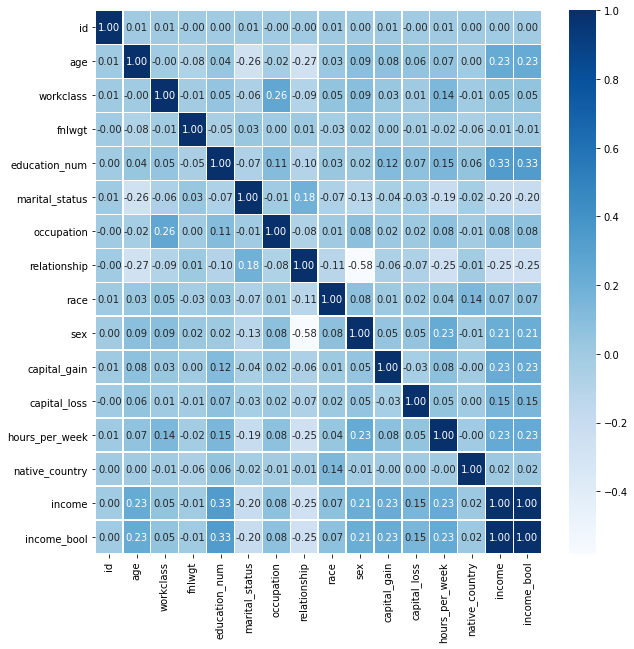

In [10]:
# 상관관계 heatmap

plt.figure(figsize=(10,10))
sns.heatmap(data = df_num.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

# age, education_num, marital_status, relationship, sex, capital_gain, capital_loss, hours_per_week 가 연관있어 보인다.

# EDA 1차

* 상관관계가 높은 아래 컬럼들을 살펴보겠습니다.

  1. age, 
  2. education_num, 
  3. marital_status, 
  4. relationship, 
  5. sex, 
  6. capital_gain, 
  7. capital_loss, 
  8. hours_per_week

## 1. age

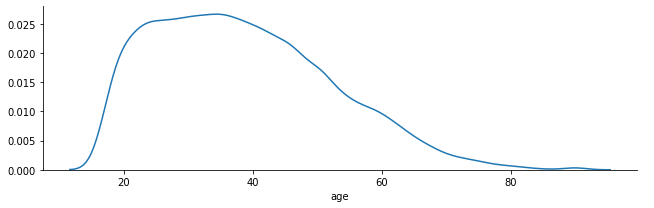

In [11]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'age')
fa.add_legend()
# 코끼리를 삼킨 보아뱀 모양 그래프, 아직 코끼리가 식도에 있어서 위장쪽으로 옮겨줘야합니다.

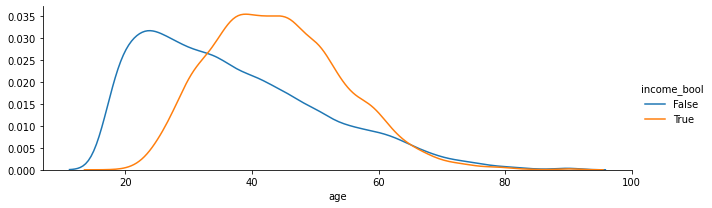

In [12]:
# income을 기준으로 나눠보기
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'age')
fa.add_legend()

# 대략 구분해보면 40~50대에 돈이 많고, 20대에는 돈이 없습니다. 늙어서는 다 똑같습니다..

<AxesSubplot:xlabel='age', ylabel='count'>

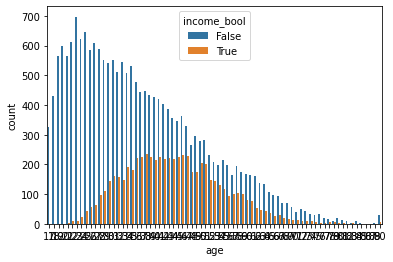

In [13]:
sns.countplot(data = df_num, x = 'age', hue = 'income_bool')

## 2. education_num

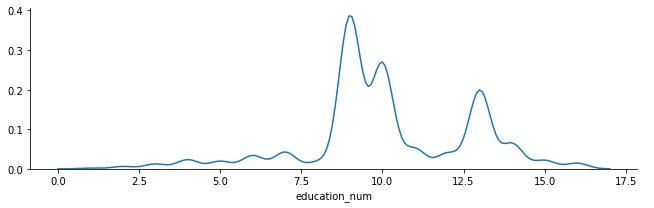

In [14]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'education_num')
fa.add_legend()
# 들쭉 날쭉합니다. 대충 중졸, 고졸, 대졸, 대학원졸 그룹으로 나눌 수 있을 것 같습니다.

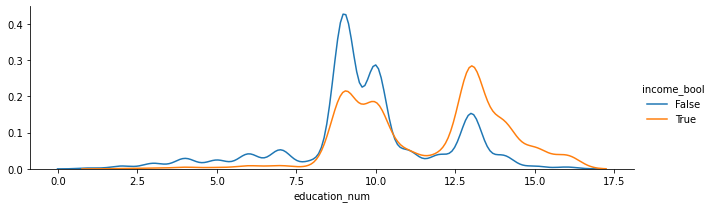

In [15]:
# income 기준으로 나눠보기
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'education_num')
fa.add_legend()

<AxesSubplot:xlabel='education_num', ylabel='count'>

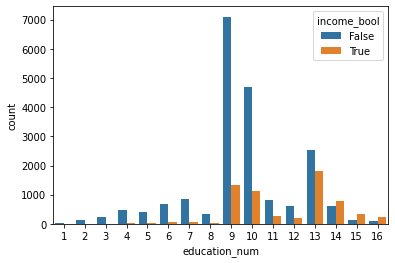

In [16]:
sns.countplot(data = df_num, x = 'education_num', hue = 'income_bool')

In [17]:
pd.pivot_table(data = df_num, index = 'education_num', values = 'income_bool', aggfunc = [np.mean, np.sum])
# 공부 많이 하면 돈도 많이 법니다.

mean         sum
              income_bool income_bool
education_num                        
1                0.000000           0
2                0.037313           5
3                0.049057          13
4                0.057426          29
5                0.052632          22
6                0.072503          53
7                0.059653          55
8                0.072423          26
9                0.158544        1337
10               0.192586        1117
11               0.255474         280
12               0.255344         215
13               0.415516        1805
14               0.561684         774
15               0.733906         342
16               0.734177         232

## 3. marital_status

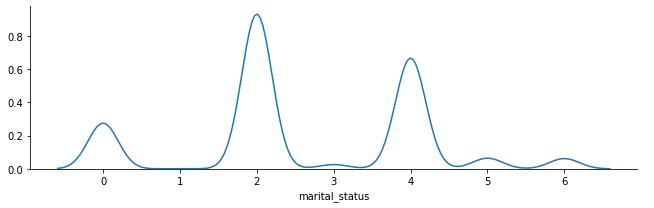

In [18]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'marital_status')
fa.add_legend()
# 결혼 상태 입니다. 0, 2, 4의 상태가 두드러집니다. 인코딩이 되어 있어 어떤 상태인지 알 수 없습니다.

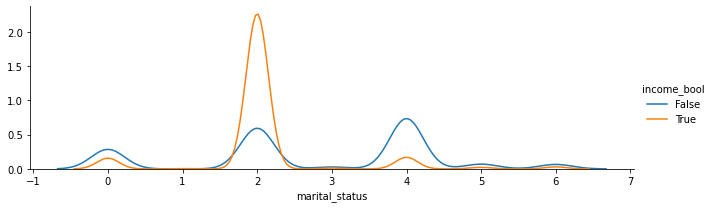

In [19]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'marital_status')
fa.add_legend()
# 2는 어떤 상태일까요?

<AxesSubplot:xlabel='marital_status', ylabel='count'>

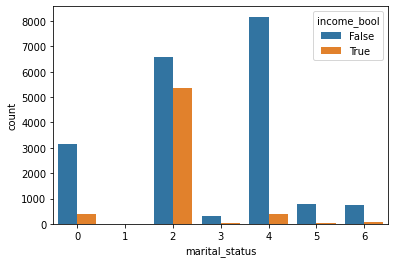

In [20]:
sns.countplot(data = df_num, x = 'marital_status', hue = 'income_bool')

In [21]:
pd.pivot_table(data = df_num, index = 'marital_status', values = 'income_bool', aggfunc = np.sum)

income_bool
marital_status             
0                       371
1                        10
2                      5372
3                        27
4                       401
5                        54
6                        70

In [22]:
pd.pivot_table(data = df, index = 'marital_status', values = 'income_bool', aggfunc = [np.mean,np.sum])
# 소득이 높은 사람은 결혼했을 확률이 높습니다.

mean         sum
                      income_bool income_bool
marital_status                               
Divorced                 0.104921         371
Married-AF-spouse        0.526316          10
Married-civ-spouse       0.448789        5372
Married-spouse-absent    0.080838          27
Never-married            0.046802         401
Separated                0.065375          54
Widowed                  0.087940          70

## 4. relationship

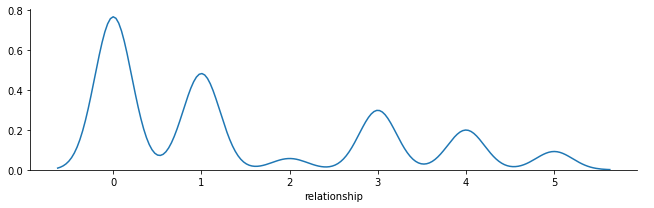

In [23]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'relationship')
fa.add_legend()
# 가족관계는 0,1,3 순서로 표본이 많습니다.

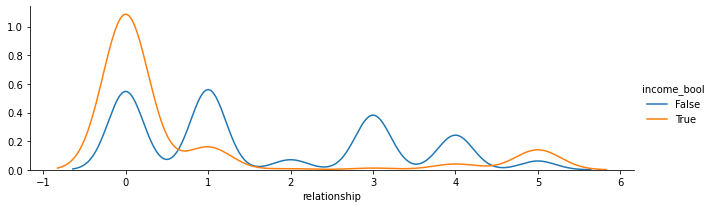

In [24]:
fa = sns.FacetGrid(df_num, hue = 'income_bool',aspect = 3)
fa.map(sns.kdeplot, 'relationship')
fa.add_legend()
# 가족관계가 0, 5이면 돈을 많이 버는 사람일 수 있습니다.

In [25]:
pd.pivot_table(data = df_num, index = 'relationship',values = 'income_bool', aggfunc = np.sum)

income_bool
relationship             
0                    4740
1                     695
2                      33
3                      52
4                     176
5                     609

<AxesSubplot:xlabel='relationship', ylabel='count'>

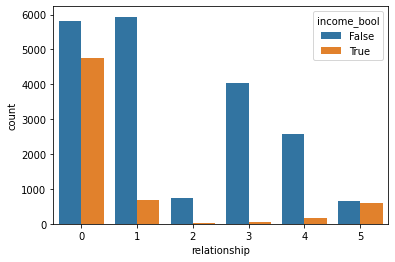

In [26]:
sns.countplot(data = df_num, x = 'relationship', hue = 'income_bool')

In [27]:
pd.pivot_table(data = df, index = 'relationship',values = 'income_bool', aggfunc = [np.mean, np.sum])
# 돈을 많이 버는 사람은 남편이거나 독신일 확률이 높습니다.

mean         sum
               income_bool income_bool
relationship                          
Husband           0.449673        4740
Not-in-family     0.104795         695
Other-relative    0.042471          33
Own-child         0.012686          52
Unmarried         0.064234         176
Wife              0.483333         609

## 5.sex

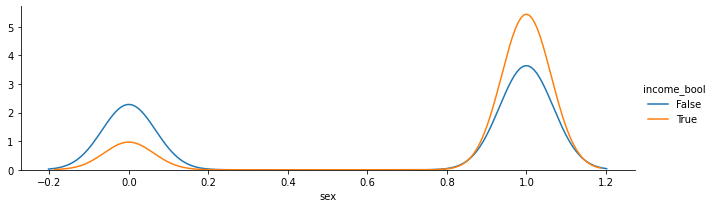

In [28]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'sex')
fa.add_legend()
# 돈을 많이 버는 사람은 남자일 확률이 높습니다.

## 6. capital_gain,

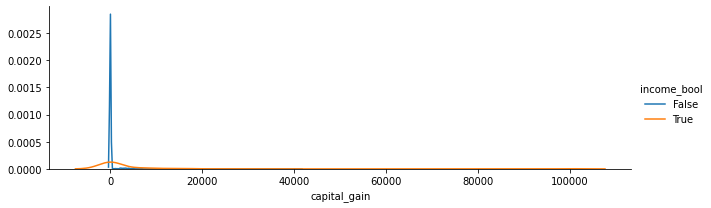

In [29]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'capital_gain')
fa.add_legend()
# 이렇게만 봐서는 잘 모르겠습니다. 자본 소득이 있고 없고를 확인해보겠습니다.

In [30]:
df_num['capital_gain_bool'] = df_num['capital_gain'] > 0
print(df_num.shape)
df_num[['capital_gain', 'capital_gain_bool']].head()

(26049, 17)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [31]:
# test data
df_num_t['capital_gain_bool'] = df_num_t['capital_gain'] > 0
print(df_num_t.shape)
df_num_t[['capital_gain', 'capital_gain_bool']].head()

(6512, 16)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

<AxesSubplot:xlabel='capital_gain_bool', ylabel='count'>

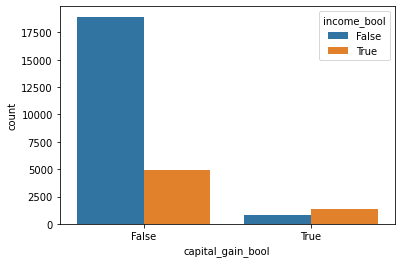

In [32]:
sns.countplot(data = df_num, x= 'capital_gain_bool', hue = 'income_bool')

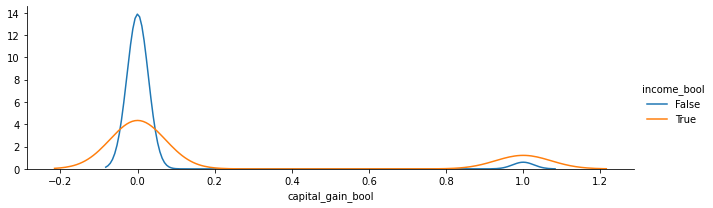

In [33]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'capital_gain_bool')
fa.add_legend()
# 대부분은 자본소득이 없지만, 있다면 부자일 확률이 높습니다.

## 7. capital_loss

In [34]:
# capital_gain과 마찬가지로 유무 여부로 확인해보겠습니다.
df_num['capital_loss_bool'] = df_num['capital_loss'] > 0
print(df_num.shape)
df_num[['capital_loss', 'capital_loss_bool']].head()

(26049, 18)


capital_loss  capital_loss_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [35]:
# test data
df_num_t['capital_loss_bool'] = df_num_t['capital_loss'] > 0
print(df_num_t.shape)
df_num_t[['capital_loss', 'capital_loss_bool']].head()

(6512, 17)


capital_loss  capital_loss_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

<AxesSubplot:xlabel='capital_loss_bool', ylabel='count'>

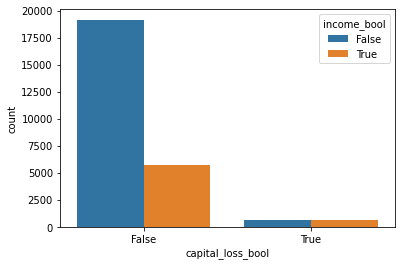

In [36]:
sns.countplot(data = df_num, x= 'capital_loss_bool', hue = 'income_bool')

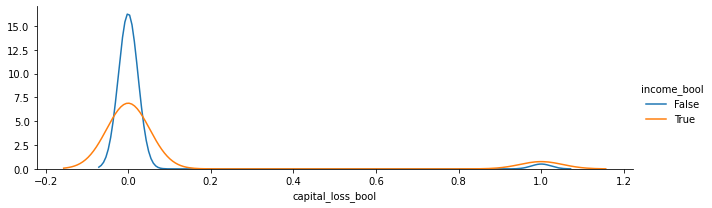

In [37]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'capital_loss_bool')
fa.add_legend()
# 대부분은 자본손실이 없지만 있으면 부자일 확률이 절반정도입니다.

## 8. hours_per_week

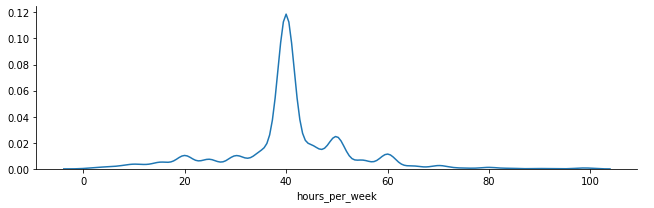

In [38]:
fa = sns.FacetGrid(df_num, aspect = 3)
fa.map(sns.kdeplot, 'hours_per_week')
fa.add_legend()
# 주 40시간, 50시간, 60시간 순으로 분포되어 있습니다, 그룹별로 만들어야겠습니다.

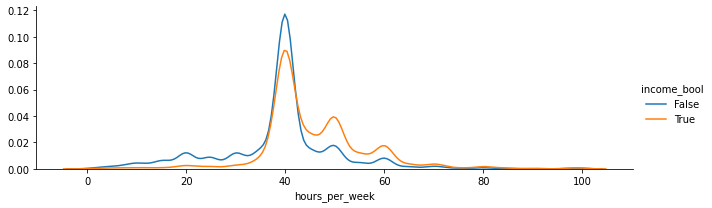

In [39]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'hours_per_week')
fa.add_legend()
# 주 50, 60시간 일 한다면 부자일 확률이 높습니다.

## EDA 1차 결론
 * EDA 결과를 바탕으로 아래와 같이 PREPROCESSING을 진행하겠습니다.
  1. age: 40~50대에 돈이 많고, 20대에는 돈이 없습니다. / 나이가 넓게 분포되어 있는데, 두 그룹으로 나눠보겠습니다.
  2. marital_status: 기혼, 독신 두 그룹으로 나눠보겠습니다.
  3. relationship:기혼 그룹에서 돈을 많이 벌었듯이, 남편과 아내일 경우 소득이 높습니다. / 남편 or 아내 bool 값으로 바꿔보겠습니다.
  4. hours_per_week: 정규화 해보겠습니다.
 ---
  5. education_num: 추가 작업이 필요없습니다.
  6. sex: 추가 작업이 필요 없습니다.
  7. capital_gain, bool 컬럼을 그대로 사용하겠습니다.
  8. capital_loss, bool 컬럼을 그대로 사용하겠습니다.

# EDA 2차

* workclass
* occupation
* race
* native_country

In [40]:
# 추가로 EDA를 진행해서 예측 결과를 높여봅시다.

In [41]:
print(df.shape)
df.head()

(26049, 16)


id  age workclass  fnlwgt  education_num      marital_status  \
0   0   40   Private  168538              9  Married-civ-spouse   
1   1   17   Private  101626              5       Never-married   
2   2   18   Private  353358             10       Never-married   
3   3   21   Private  151158             10       Never-married   
4   4   24   Private  122234             10       Never-married   

          occupation   relationship   race     sex  capital_gain  \
0              Sales        Husband  White    Male             0   
1  Machine-op-inspct      Own-child  White    Male             0   
2      Other-service      Own-child  White    Male             0   
3     Prof-specialty      Own-child  White  Female             0   
4       Adm-clerical  Not-in-family  Black  Female             0   

   capital_loss  hours_per_week native_country income  income_bool  
0             0              60  United-States   >50K         True  
1             0              20  United-States  <=50K        False  
2             0              16  United-States  <=50K        False  
3             0              25  United-States  <=50K        False  
4             0              20              ?  <=50K        False

## 1. workclass

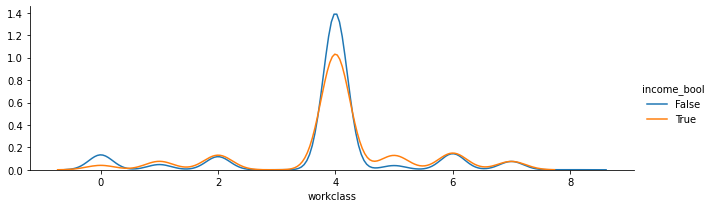

In [42]:
# 고용 형태를 알아봅시다.
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'workclass')
fa.add_legend()

<AxesSubplot:xlabel='workclass', ylabel='count'>

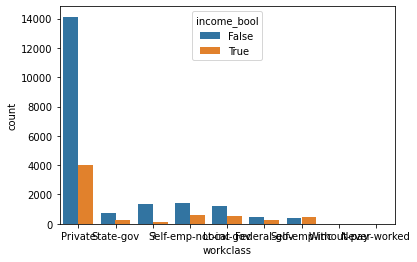

In [43]:
sns.countplot(data = df, x = 'workclass', hue = 'income_bool')

In [44]:
pd.pivot_table(data = df_num, index = 'workclass', values = 'income_bool', aggfunc = [np.sum,np.mean] )

sum        mean
          income_bool income_bool
workclass                        
0                 153    0.101864
1                 292    0.381699
2                 505    0.298463
3                   0    0.000000
4                3993    0.220328
5                 496    0.565564
6                 577    0.284236
7                 289    0.277085
8                   0    0.000000

In [45]:
pd.pivot_table(data = df, index = 'workclass', values = 'income_bool', aggfunc = [np.sum,np.mean] )

sum        mean
                 income_bool income_bool
workclass                               
?                        153    0.101864
Federal-gov              292    0.381699
Local-gov                505    0.298463
Never-worked               0    0.000000
Private                 3993    0.220328
Self-emp-inc             496    0.565564
Self-emp-not-inc         577    0.284236
State-gov                289    0.277085
Without-pay                0    0.000000

In [46]:
# 고용형태가 '?' 사람들이 연 5만 달러를 초과하여 버는 것은 10% 밖에 되지 않습니다.
# 그 10%는 어떤 사람들일까요?
df[(df['workclass'] == '?') & (df['income_bool'] == True)].head(150)
# 어느정도 나이가 있고, 자본 소득이나 손실이 있습니다. 은퇴 후 주식을 하시는 분들인 것 같습니다!

id  age workclass  fnlwgt  education_num      marital_status  \
189      189   72         ?  108796             15  Married-civ-spouse   
227      227   24         ?  151153             10       Never-married   
352      352   61         ?  232618             15  Married-civ-spouse   
647      647   64         ?  178556              6  Married-civ-spouse   
904      904   28         ?  123147             10  Married-civ-spouse   
1223    1223   67         ?   45537             14  Married-civ-spouse   
1927    1927   38         ?   94559             13  Married-civ-spouse   
2157    2157   72         ?  118902             16  Married-civ-spouse   
2166    2166   65         ?  240857             13  Married-civ-spouse   
2176    2176   65         ?  224472             15       Never-married   
2230    2230   56         ?  132930             14       Never-married   
2409    2409   69         ?  164102              9            Divorced   
2514    2514   39         ?  361838             13  Married-civ-spouse   
2580    2580   62         ?  191118             10  Married-civ-spouse   
2693    2693   53         ?  123011              9  Married-civ-spouse   
2704    2704   64         ?  168340              9  Married-civ-spouse   
2786    2786   35         ?  139770             11  Married-civ-spouse   
3183    3183   52         ?  318351             10  Married-civ-spouse   
3391    3391   59         ?  154236              9  Married-civ-spouse   
3437    3437   65         ?   36039              9  Married-civ-spouse   
3578    3578   26         ?  370727             13  Married-civ-spouse   
3646    3646   56         ?  154537             10            Divorced   
3650    3650   65         ?  117162             11  Married-civ-spouse   
4161    4161   61         ?  202106              9  Married-civ-spouse   
4242    4242   66         ?  177351             13  Married-civ-spouse   
4411    4411   62         ?   55621             10  Married-civ-spouse   
4455    4455   59         ?  372020             13  Married-civ-spouse   
4619    4619   70         ?   54849             16  Married-civ-spouse   
4904    4904   59         ?  424468             13  Married-civ-spouse   
5000    5000   57         ?  208311             13  Married-civ-spouse   
5088    5088   60         ?  204486             13  Married-civ-spouse   
5140    5140   80         ?   29020             15  Married-civ-spouse   
5643    5643   43         ?  116632             10  Married-civ-spouse   
5704    5704   52         ?  159755             11  Married-civ-spouse   
5769    5769   66         ?  213149             10  Married-civ-spouse   
6029    6029   63         ?  186809             13  Married-civ-spouse   
6223    6223   63         ?  222289             13  Married-civ-spouse   
6346    6346   61         ?   71467              9  Married-civ-spouse   
6523    6523   27         ?  174163             10  Married-civ-spouse   
6796    6796   53         ?  199665             13  Married-civ-spouse   
7066    7066   67         ?  182378             13  Married-civ-spouse   
7170    7170   34         ?  353881             11  Married-civ-spouse   
7442    7442   57         ?  300104              3  Married-civ-spouse   
7467    7467   47         ?  149700             13  Married-civ-spouse   
7498    7498   31         ?   85077             13  Married-civ-spouse   
7581    7581   62         ?   81578              9  Married-civ-spouse   
7761    7761   58         ?  353244             13             Widowed   
7808    7808   63         ?  150389             13             Widowed   
7829    7829   90         ?  313986              9  Married-civ-spouse   
8513    8513   41         ?  277390             13  Married-civ-spouse   
8826    8826   61         ?  198686             12  Married-civ-spouse   
8858    8858   60         ?  131852              3  Married-civ-spouse   
8869    8869   77         ?   28678             14  Married-civ-spouse   
8945    8945  

In [47]:
# 무급, 일하지 않음은 17명입니다.
df[(df['workclass'] == 'Without-pay') | (df['workclass'] == 'Never-worked')].shape

(17, 16)

In [48]:
# Self-emp-inc, 법인이 있는 개인 사업자 분들 중 연 소득 5만 달러 초과하시는 분들
df[(df['workclass'] == 'Self-emp-inc') & (df['income_bool'] == True)].head(150)
# occupation의 Exec-managerial, 임원이 눈에 띕니다!

id  age     workclass  fnlwgt  education_num      marital_status  \
50      50   47  Self-emp-inc  120131             13  Married-civ-spouse   
385    385   74  Self-emp-inc  231002              9  Married-civ-spouse   
388    388   64  Self-emp-inc  179436             13  Married-civ-spouse   
389    389   84  Self-emp-inc  172907             10  Married-civ-spouse   
413    413   50  Self-emp-inc  283676             16  Married-civ-spouse   
480    480   32  Self-emp-inc  124919             13  Married-civ-spouse   
584    584   45  Self-emp-inc  117605              9  Married-civ-spouse   
762    762   54  Self-emp-inc  298215             13  Married-civ-spouse   
809    809   41  Self-emp-inc  253060             13  Married-civ-spouse   
909    909   49  Self-emp-inc  362654             10  Married-civ-spouse   
971    971   60  Self-emp-inc  210827             13  Married-civ-spouse   
1042  1042   39  Self-emp-inc  543042              9  Married-civ-spouse   
1118  1118   50  Self-emp-inc  100029             13             Widowed   
1161  1161   31  Self-emp-inc  203488             13  Married-civ-spouse   
1172  1172   30  Self-emp-inc  173858             10  Married-civ-spouse   
1203  1203   58  Self-emp-inc  130454             10  Married-civ-spouse   
1213  1213   43  Self-emp-inc  150533              9  Married-civ-spouse   
1235  1235   42  Self-emp-inc  152071             15  Married-civ-spouse   
1278  1278   59  Self-emp-inc  122390             10  Married-civ-spouse   
1308  1308   40  Self-emp-inc   49249             13  Married-civ-spouse   
1310  1310   56  Self-emp-inc   98418             15  Married-civ-spouse   
1313  1313   35  Self-emp-inc   65624             13  Married-civ-spouse   
1392  1392   51  Self-emp-inc  100029             16  Married-civ-spouse   
1499  1499   45  Self-emp-inc  271901              9  Married-civ-spouse   
1519  1519   70  Self-emp-inc  225780             10  Married-civ-spouse   
1592  1592   43  Self-emp-inc  117158             13  Married-civ-spouse   
1646  1646   57  Self-emp-inc   51016              9  Married-civ-spouse   
1678  1678   60  Self-emp-inc  181196             10  Married-civ-spouse   
1736  1736   52  Self-emp-inc   49069             10  Married-civ-spouse   
1795  1795   39  Self-emp-inc  135500              9  Married-civ-spouse   
1812  1812   43  Self-emp-inc  304906             13  Married-civ-spouse   
1841  1841   44  Self-emp-inc  187720             10  Married-civ-spouse   
1896  1896   57  Self-emp-inc  172654             15  Married-civ-spouse   
1925  1925   41  Self-emp-inc  194636             13  Married-civ-spouse   
1932  1932   39  Self-emp-inc  283338             13  Married-civ-spouse   
1998  1998   42  Self-emp-inc   23510             14            Divorced   
2143  2143   33  Self-emp-inc  201763             13  Married-civ-spouse   
2306  2306   57  Self-emp-inc  146103             13  Married-civ-spouse   
2374  2374   63  Self-emp-inc  110890             14            Divorced   
2376  2376   54  Self-emp-inc   96460              9  Married-civ-spouse   
2446  2446   52  Self-emp-inc  260938             10  Married-civ-spouse   
2497  2497   40  Self-emp-inc  157240             14  Married-civ-spouse   
2501  2501   51  Self-emp-inc  162943             15  Married-civ-spouse   
2583  2583   45  Self-emp-inc  181307             15  Married-civ-spouse   
2592  2592   56  Self-emp-inc   24127             11  Married-civ-spouse   
2663  2663   55  Self-emp-inc  141807             13  Married-civ-spouse   
2695  2695   47  Self-emp-inc  173783             13  Married-civ-spouse   
2718  2718   45  Self-emp-inc  120131              9  Married-civ-spouse   
2815  2815   39  Self-emp-inc  336226              9  Married-civ-spouse   
2832  2832   44  Self-emp-inc  104892             10  Married-civ-spouse   
2927  2927   42  Self-emp-inc  443508             16  Married-civ-spouse   
2994  2994   46  Self-emp-inc  125892             14  Ma

## 2. occupation

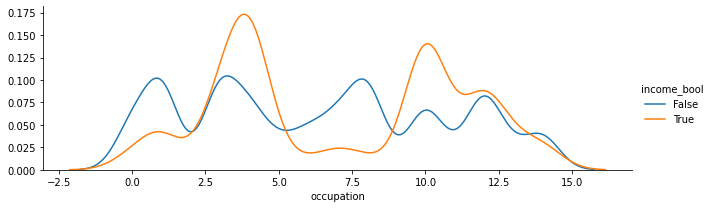

In [37]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'occupation')
fa.add_legend()

In [50]:
pd.pivot_table(data = df, index = 'occupation', values = 'income_bool', aggfunc = [np.sum,np.mean])

sum        mean
                  income_bool income_bool
occupation                               
?                         153    0.101459
Adm-clerical              402    0.134764
Armed-Forces                0    0.000000
Craft-repair              738    0.226242
Exec-managerial          1593    0.490758
Farming-fishing            91    0.116071
Handlers-cleaners          71    0.065018
Machine-op-inspct         200    0.126422
Other-service             110    0.041889
Priv-house-serv             1    0.008130
Prof-specialty           1491    0.451271
Protective-serv           167    0.319923
Sales                     811    0.270514
Tech-support              224    0.301887
Transport-moving          253    0.199213

In [51]:
pd.pivot_table(data = df_num, index = 'occupation', values = 'income_bool', aggfunc = [np.sum,np.mean])

sum        mean
           income_bool income_bool
occupation                        
0                  153    0.101459
1                  402    0.134764
2                    0    0.000000
3                  738    0.226242
4                 1593    0.490758
5                   91    0.116071
6                   71    0.065018
7                  200    0.126422
8                  110    0.041889
9                    1    0.008130
10                1491    0.451271
11                 167    0.319923
12                 811    0.270514
13                 224    0.301887
14                 253    0.199213

In [52]:
# 직업이 임원인 분들을 알아봅시다
df_ceo = df[(df['occupation'] == 'Exec-managerial')]
print(df_ceo.shape)
df_ceo.head()

(3246, 16)


id  age     workclass  fnlwgt  education_num      marital_status  \
16  16   32       Private  195000             13  Married-civ-spouse   
21  21   39       Private  280570             13  Married-civ-spouse   
28  28   46       Private  428405             13  Married-civ-spouse   
48  48   41     Local-gov  144995             14  Married-civ-spouse   
50  50   47  Self-emp-inc  120131             13  Married-civ-spouse   

         occupation relationship   race   sex  capital_gain  capital_loss  \
16  Exec-managerial      Husband  White  Male          7298             0   
21  Exec-managerial      Husband  White  Male          3103             0   
28  Exec-managerial      Husband  White  Male             0             0   
48  Exec-managerial      Husband  White  Male             0             0   
50  Exec-managerial      Husband  White  Male             0             0   

    hours_per_week native_country income  income_bool  
16              45  United-States   >50K         True  
21              50  United-States   >50K         True  
28              40  United-States   >50K         True  
48              55  United-States  <=50K        False  
50              50           Cuba   >50K         True

<AxesSubplot:xlabel='workclass', ylabel='count'>

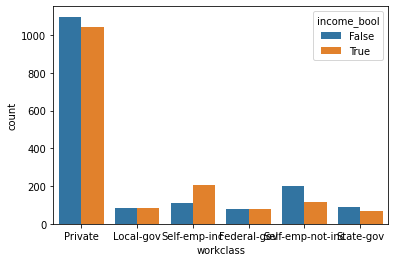

In [53]:
# 개인 사업 대표면 연 5만 달러 초과 수익일 확률이 높습니다.
sns.countplot(data = df_ceo, x = 'workclass', hue = 'income_bool')

In [54]:
# 직업이 Prof-specialty인 분들을 봅시다. 교수님인 것 같습abs니다.
df_prof = df[(df['occupation'] == 'Prof-specialty')]
print(df_prof.shape)
df_prof.head()

(3304, 16)


id  age         workclass  fnlwgt  education_num      marital_status  \
3    3   21           Private  151158             10       Never-married   
23  23   29           Private  204862             12            Divorced   
26  26   50         State-gov  297551              9  Married-civ-spouse   
39  39   51         Local-gov  123325             15             Widowed   
53  53   64  Self-emp-not-inc  149698             15  Married-civ-spouse   

        occupation   relationship   race     sex  capital_gain  capital_loss  \
3   Prof-specialty      Own-child  White  Female             0             0   
23  Prof-specialty  Not-in-family  White  Female             0             0   
26  Prof-specialty        Husband  White    Male             0             0   
39  Prof-specialty  Not-in-family  White  Female             0             0   
53  Prof-specialty        Husband  White    Male             0             0   

    hours_per_week native_country income  income_bool  
3               25  United-States  <=50K        False  
23              36  United-States  <=50K        False  
26              52  United-States  <=50K        False  
39              40  United-States  <=50K        False  
53              40  United-States   >50K         True

<AxesSubplot:xlabel='workclass', ylabel='count'>

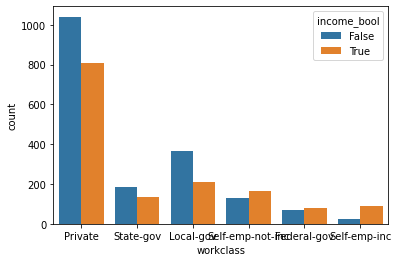

In [55]:
# 법인이 있는 개인 사업가인 경우 연 5만 초과일 확률이 높습니다.
sns.countplot(data = df_prof, x = 'workclass', hue = 'income_bool')

## 3. race

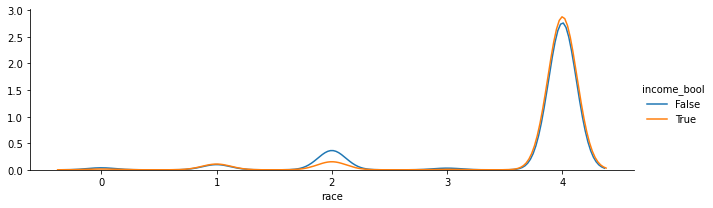

In [56]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'race')
fa.add_legend()

<AxesSubplot:xlabel='race', ylabel='count'>

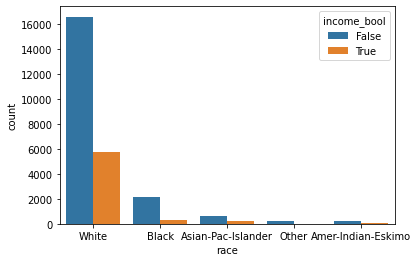

In [57]:
sns.countplot(data = df, x = 'race', hue = 'income_bool')

## 4. native_country

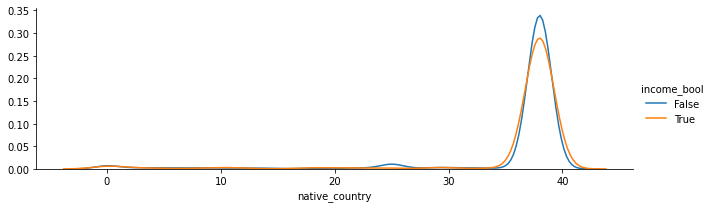

In [58]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'native_country')
fa.add_legend()

In [59]:
pd.pivot_table(data = df, index = 'native_country', values = 'income_bool', aggfunc = [np.sum,np.mean])

sum        mean
                           income_bool income_bool
native_country                                    
?                                  107    0.234649
Cambodia                             6    0.428571
Canada                              29    0.315217
China                               13    0.228070
Columbia                             2    0.038462
Cuba                                20    0.263158
Dominican-Republic                   2    0.041667
Ecuador                              4    0.166667
El-Salvador                          7    0.088608
England                             23    0.343284
France                              10    0.416667
Germany                             35    0.346535
Greece                               6    0.250000
Guatemala                            3    0.057692
Haiti                                4    0.114286
Honduras                             0    0.000000
Hong                                 4    0.285714
Hungary                              3    0.272727
India                               31    0.402597
Iran                                17    0.485714
Ireland                              4    0.222222
Italy                               19    0.380000
Jamaica                              7    0.109375
Japan                               19    0.404255
Laos                                 2    0.133333
Mexico                              26    0.048689
Nicaragua                            2    0.071429
Outlying-US(Guam-USVI-etc)           0    0.000000
Peru                                 2    0.076923
Philippines                         49    0.300613
Poland                              10    0.212766
Portugal                             2    0.066667
Puerto-Rico                         11    0.115789
Scotland                             2    0.250000
South                               14    0.222222
Taiwan                              18    0.461538
Thailand                             2    0.153846
Trinadad&Tobago                      1    0.071429
United-States                     5780    0.247315
Vietnam                              4    0.080000
Yugoslavia                           5    0.416667

## EDA 2차 결론
 * EDA 결과를 바탕으로 아래와 같이 PREPROCESSING을 진행하겠습니다.
  1. age: 10개 그룹으로 구간화해보겠습니다. 
  2. hours_per_week: 정규화 해보겠습니다.
 ---
  3. relationship: 추가 작업이 필요없습니다.
  4. marital_status: 추가 작업이 필요없습니다.
  5. education_num: 추가 작업이 필요없습니다.
  6. sex: 추가 작업이 필요 없습니다.
  7. capital_gain, bool 컬럼을 그대로 사용하겠습니다.
  8. workclass: 추가 작업이 필요없습니다.
  9. occupation: 추가 작업이 필요없습니다.

# EDA 3차

#### 궁금증: 연 5만 달러 이상 버는 사람들의 공통적인 특성은?

In [101]:
print(df.shape)
df.head(150)

(26049, 16)


id  age         workclass  fnlwgt  education_num         marital_status  \
0      0   40           Private  168538              9     Married-civ-spouse   
1      1   17           Private  101626              5          Never-married   
2      2   18           Private  353358             10          Never-married   
3      3   21           Private  151158             10          Never-married   
4      4   24           Private  122234             10          Never-married   
5      5   43           Private  236985              9     Married-civ-spouse   
6      6   43         State-gov  206139             13     Married-civ-spouse   
7      7   37           Private  340599              7              Separated   
8      8   47           Private  230136              9     Married-civ-spouse   
9      9   41           Private  153031             10     Married-civ-spouse   
10    10   34           Private  238376              2     Married-civ-spouse   
11    11   21                 ?  204226             10          Never-married   
12    12   44           Private  157236             10  Married-spouse-absent   
13    13   18           Private  266681              7          Never-married   
14    14   50           Private   71898              3     Married-civ-spouse   
15    15   39  Self-emp-not-inc  188335              9     Married-civ-spouse   
16    16   32           Private  195000             13     Married-civ-spouse   
17    17   54           Private  315804              9               Divorced   
18    18   50           Private   72351             13               Divorced   
19    19   39           Private  138192             13     Married-civ-spouse   
20    20   21           Private  132243             12          Never-married   
21    21   39           Private  280570             13     Married-civ-spouse   
22    22   26  Self-emp-not-inc  258306              6     Married-civ-spouse   
23    23   29           Private  204862             12               Divorced   
24    24   53  Self-emp-not-inc  240138              9     Married-civ-spouse   
25    25   31           Private  117028              9     Married-civ-spouse   
26    26   50         State-gov  297551              9     Married-civ-spouse   
27    27   21           Private  213015              9          Never-married   
28    28   46           Private  428405             13     Married-civ-spouse   
29    29   23           Private  224424             13          Never-married   
30    30   20                 ?  202994             10          Never-married   
31    31   26           Private  345405              9     Married-civ-spouse   
32    32   26           Private  337940              3          Never-married   
33    33   37         Local-gov  128054             10               Divorced   
34    34   31                 ?  505438              9     Married-civ-spouse   
35    35   39           Private  299828              3              Separated   
36    36   41  Self-emp-not-inc  251305             10     Married-civ-spouse   
37    37   22           Private  385540              6          Never-married   
38    38   27           Private  211032              2          Never-married   
39    39   51         Local-gov  123325             15                Widowed   
40    40   18           Private  138917              7          Never-married   
41    41   57         Local-gov  190747              5     Married-civ-spouse   
42    42   25           Private  139012             13          Never-married   
43    43   76           Private   70697              4                Widowed   
44    44   38       Federal-gov  248919              9     Married-civ-spouse   
45    45   51           Private  257485             10     Married-civ-spouse   
46    46   25           Private  187653              9          Never-married   
47    47   47       Federal-gov   34845             13     Married-civ-spouse   
48    48   41         Local-gov  1449

<AxesSubplot:xlabel='income_bool', ylabel='count'>

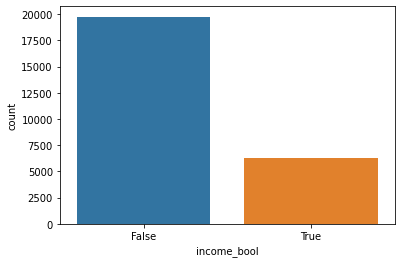

In [77]:
sns.countplot(data = df_num, x = 'income_bool')

In [82]:
# 연 소득이 5만 달러 이상인 사람들은 24% 정도 입니다.
df_num['income_bool'].value_counts()

False    19744
True      6305
Name: income_bool, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

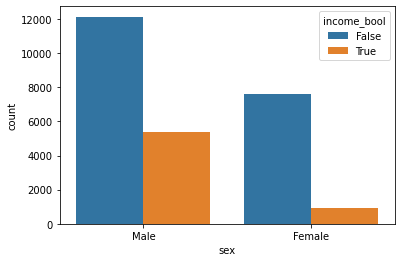

In [95]:
# 남성이 여성보다 많습니다.
sns.countplot(data = df, x = 'sex', hue = 'income_bool')

<AxesSubplot:xlabel='marital_status', ylabel='count'>

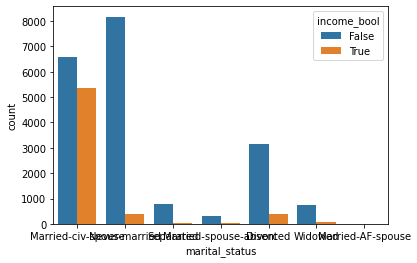

In [96]:
# 기혼자의 수가 압도적입니다.
sns.countplot(data = df, x = 'marital_status', hue = 'income_bool')

<AxesSubplot:xlabel='education_num', ylabel='count'>

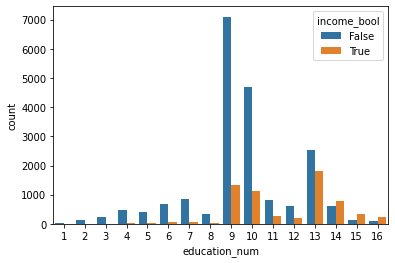

In [102]:
# 14년 이상 공부했을 경우 연 소득이 5만 달러 넘을 비율이 높습니다.
sns.countplot(data = df, x = 'education_num', hue = 'income_bool'  )

<AxesSubplot:xlabel='education_num', ylabel='count'>

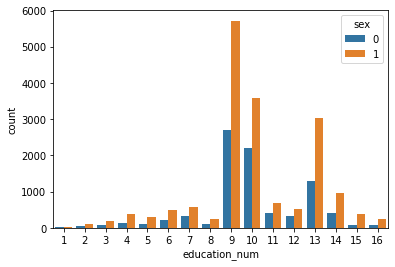

In [103]:
# 13년 이상 공부한 사람들은 남성의 비율이 여성보다 높습니다.
sns.countplot(data = df_num, x = 'education_num', hue = 'sex')

In [317]:
# 남성이면서, 기혼자면서, 14년 이상 공부한 사람들이 연 소득 5만 달러 이상인 사람들의 비율은?
df_m_m_14 = df[(df['sex'] == 'Male') & (df['marital_status'] == 'Married-civ-spouse') & (df['education_num'] >= 14)]
print(df_m_m_14.shape)
df_m_m_14.head()

(1235, 21)


id  age         workclass  fnlwgt  education_num      marital_status  \
48    48   41         Local-gov  144995             14  Married-civ-spouse   
53    53   64  Self-emp-not-inc  149698             15  Married-civ-spouse   
56    56   50  Self-emp-not-inc  167728             16  Married-civ-spouse   
65    65   41           Private  116825             14  Married-civ-spouse   
102  102   62  Self-emp-not-inc  226546             15  Married-civ-spouse   

          occupation relationship   race   sex  ...  capital_loss  \
48   Exec-managerial      Husband  White  Male  ...             0   
53    Prof-specialty      Husband  White  Male  ...             0   
56    Prof-specialty      Husband  White  Male  ...             0   
65    Prof-specialty      Husband  White  Male  ...             0   
102   Prof-specialty      Husband  White  Male  ...             0   

     hours_per_week  native_country income income_bool  age_bool  \
48               55   United-States  <=50K       False      True   
53               40   United-States   >50K        True      True   
56               60   United-States   >50K        True      True   
65               55   United-States   >50K        True      True   
102              16   United-States  <=50K       False      True   

     hours_per_week_bool  capital_gain_bool  Male_married_13y_edu  \
48                  True              False                  True   
53                  True              False                  True   
56                  True              False                  True   
65                  True              False                  True   
102                False              False                  True   

     native_country_bool  
48                  True  
53                  True  
56                  True  
65                  True  
102                 True  

[5 rows x 21 columns]

In [319]:
# 1,235 명 중 968명이 연 소득 5만 달러 이상입니다.
df_m_m_14['income_bool'].value_counts()

True     968
False    267
Name: income_bool, dtype: int64

<AxesSubplot:xlabel='income_bool', ylabel='count'>

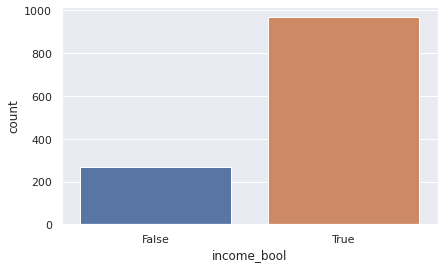

In [320]:
sns.countplot(data = df_m_m_14, x = 'income_bool')

## EDA 3차 결론
 * EDA 결과를 바탕으로 아래와 같이 PREPROCESSING을 진행하겠습니다.
  1. age: 25세 이하 bool
  2. hours_per_week: 30시간 이하 bool
  3. capital_gain: bool
  4. 남성이면서, 기혼자면서, 14년 이상 공부한 사람들
  5. native_country: 미국인 bool
  6. relationship
  7. education_num
  8. workclass
  9. occupation

# EDA 4차

In [10]:
# occupation
df_ceo_prof = df[(df['occupation'] == 'Exec-managerial') | (df['occupation'] == 'Prof-specialty')]
print(df_ceo_prof.shape)
df_ceo_prof.head()

(6550, 16)


id  age  workclass  fnlwgt  education_num      marital_status  \
3    3   21    Private  151158             10       Never-married   
16  16   32    Private  195000             13  Married-civ-spouse   
21  21   39    Private  280570             13  Married-civ-spouse   
23  23   29    Private  204862             12            Divorced   
26  26   50  State-gov  297551              9  Married-civ-spouse   

         occupation   relationship   race     sex  capital_gain  capital_loss  \
3    Prof-specialty      Own-child  White  Female             0             0   
16  Exec-managerial        Husband  White    Male          7298             0   
21  Exec-managerial        Husband  White    Male          3103             0   
23   Prof-specialty  Not-in-family  White  Female             0             0   
26   Prof-specialty        Husband  White    Male             0             0   

    hours_per_week native_country income  income_bool  
3               25  United-States  <=50K        False  
16              45  United-States   >50K         True  
21              50  United-States   >50K         True  
23              36  United-States  <=50K        False  
26              52  United-States  <=50K        False

In [17]:
df_ceo_prof[df_ceo_prof['marital_status'] == 'Married-civ-spouse']['income_bool'].value_counts()

True     2542
False    1106
Name: income_bool, dtype: int64

In [18]:
# 직업이 임원, 교수이면서 결혼을 했으면 연 소득 5만 달러 이상인 비율이 높다.
pd.pivot_table(data = df_ceo_prof, index = ['workclass', 'marital_status'], values = 'income_bool', aggfunc = [np.sum, np.mean])

sum        mean
                                       income_bool income_bool
workclass        marital_status                               
Federal-gov      Divorced                       16    0.313725
                 Married-AF-spouse               1    1.000000
                 Married-civ-spouse            118    0.791946
                 Married-spouse-absent           2    0.500000
                 Never-married                  12    0.155844
                 Separated                       3    0.500000
                 Widowed                         2    0.181818
Local-gov        Divorced                       20    0.151515
                 Married-civ-spouse            247    0.682320
                 Married-spouse-absent           0    0.000000
                 Never-married                  24    0.121827
                 Separated                       3    0.136364
                 Widowed                         4    0.137931
Private          Divorced                      129    0.242481
                 Married-AF-spouse               2    1.000000
                 Married-civ-spouse           1503    0.707960
                 Married-spouse-absent          10    0.250000
                 Never-married                 166    0.149955
                 Separated                      22    0.205607
                 Widowed                        20    0.253165
Self-emp-inc     Divorced                       16    0.457143
                 Married-civ-spouse            268    0.774566
                 Never-married                   6    0.200000
                 Separated                       4    0.363636
                 Widowed                         2    0.250000
Self-emp-not-inc Divorced                       19    0.243590
                 Married-AF-spouse               1    1.000000
                 Married-civ-spouse            229    0.549161
                 Married-spouse-absent           3    0.333333
                 Never-married                  23    0.280488
                 Separated                       0    0.000000
                 Widowed                         5    0.333333
State-gov        Divorced                       12    0.179104
                 Married-civ-spouse            177    0.705179
                 Married-spouse-absent           2    0.400000
                 Never-married                  12    0.090226
                 Separated                       1    0.100000
                 Widowed                         0    0.000000

In [39]:
# age
pd.pivot_table(data = df, index = 'age', values = 'income_bool', aggfunc = [np.mean, np.sum])

mean         sum
    income_bool income_bool
age                        
17     0.000000           0
18     0.000000           0
19     0.001764           1
20     0.000000           0
21     0.003527           2
22     0.016051          10
23     0.012748           9
24     0.037094          24
25     0.063953          44
26     0.088647          57
27     0.095238          64
28     0.141399          97
29     0.165152         109
30     0.209064         143
31     0.224719         160
32     0.235821         158
33     0.214697         149
34     0.272597         190
35     0.253521         180
36     0.317143         222
37     0.336811         226
38     0.346041         236
39     0.343465         226
40     0.336449         216
41     0.348297         225
42     0.351047         218
43     0.365574         223
44     0.378049         217
45     0.392982         224
46     0.389916         232
47     0.409660         229
48     0.399093         176
49     0.369658         173
50     0.424431         205
51     0.414938         200
52     0.388889         147
53     0.409605         145
54     0.400000         132
55     0.353293         118
56     0.323129          95
57     0.379699         101
58     0.348993         104
59     0.367273         101
60     0.326613          81
61     0.316667          76
62     0.252336          54
63     0.254054          47
64     0.238636          42
65     0.248227          35
66     0.219512          27
67     0.241935          30
68     0.230769          21
69     0.176471          15
70     0.176471          12
71     0.245283          13
72     0.152542           9
73     0.156863           8
74     0.244444          11
75     0.138889           5
76     0.081081           3
77     0.130435           3
78     0.238095           5
79     0.388889           7
80     0.100000           2
81     0.125000           2
82     0.000000           0
83     0.400000           2
84     0.111111           1
85     0.000000           0
86     0.000000           0
87     0.000000           0
88     0.000000           0
90     0.166667           6

## EDA 4차 결론
 * EDA 결과를 바탕으로 아래와 같이 PREPROCESSING을 진행하겠습니다.
  1. age: 15개 그룹으로 바인딩 / 나이에 따라 연봉이 달라지는 경향이 있습니다.
  2. hours_per_week: 정규화
  3. 남성이면서, 기혼자면서, 14년 이상 공부한 사람들
  4. 직업이 임원, 교수이면서 결혼을 한 사람들
  5. education_num
  6. sex
  7. race

# PREPROCESSING 4차

In [92]:
# 1 age
# 나이를 구간화(Binning) 합니다.
df['age_bin'] = pd.qcut(df['age'], 10, labels = False)
df['age_log'] = np.log(df['age'] + 1)

print(df_num.shape)
df[['age', 'age_bin']]

(26049, 21)


age  age_bin
0       40        5
1       17        0
2       18        0
3       21        0
4       24        1
...    ...      ...
26044   57        8
26045   23        1
26046   78        9
26047   26        1
26048   20        0

[26049 rows x 2 columns]

In [93]:
# test
df_t['age_bin'] = pd.qcut(df_t['age'], 10, labels = False)
df_t['age_log'] = np.log(df_t['age'] + 1)
print(df_num_t.shape)
df_t[['age', 'age_bin']]

(6512, 20)


age  age_bin
0      28        2
1      40        5
2      20        0
3      40        5
4      37        4
...   ...      ...
6507   35        4
6508   41        5
6509   39        5
6510   35        4
6511   28        2

[6512 rows x 2 columns]

In [94]:
# 2. hours_per_week:
# 정규화
df['hours_per_week_log'] = np.log(df['hours_per_week'] + 1)

# test
df_t['hours_per_week_log'] = np.log(df_t['hours_per_week'] + 1)

/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_per_week_log', ylabel='Density'>

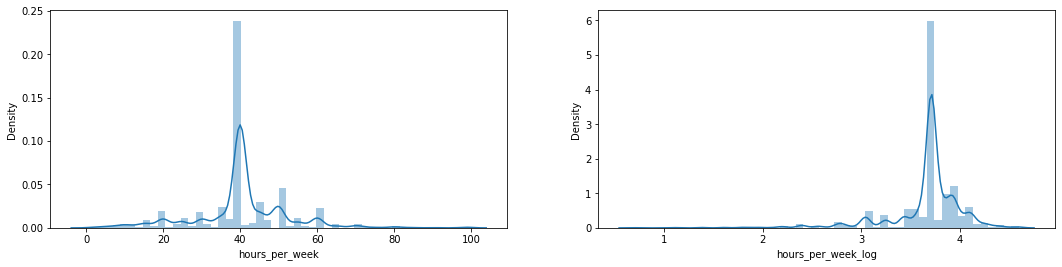

In [95]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)


sns.distplot(df["hours_per_week"], ax=ax1)
sns.distplot(df["hours_per_week_log"], ax=ax2)

In [96]:
# 3. 남성이면서, 기혼자면서, 14년 이상 공부한 사람들
df['Male_married_14y_edu'] =  (df['sex'] == 'Male') & (df['marital_status'] == 'Married-civ-spouse') & (df['education_num'] >= 14)
print(df.shape)
df[['sex', 'marital_status','education_num','Male_married_14y_edu']].head()

(26049, 21)


sex      marital_status  education_num  Male_married_14y_edu
0    Male  Married-civ-spouse              9                 False
1    Male       Never-married              5                 False
2    Male       Never-married             10                 False
3  Female       Never-married             10                 False
4  Female       Never-married             10                 False

In [97]:
# test
df_t['Male_married_14y_edu'] =  (df_t['sex'] == 'Male') & (df_t['marital_status'] == 'Married-civ-spouse') & (df_t['education_num'] >= 14)
print(df.shape)
df_t[['sex', 'marital_status','education_num','Male_married_14y_edu']].head()

(26049, 21)


sex      marital_status  education_num  Male_married_14y_edu
0  Female       Never-married             10                 False
1    Male  Married-civ-spouse              9                 False
2    Male       Never-married             10                 False
3    Male  Married-civ-spouse             11                 False
4    Male  Married-civ-spouse             16                  True

In [98]:
# 4. 직업이 임원, 교수이면서 결혼을 한 사람들
df['ceo_prof_m'] = ((df['occupation'] == 'Exec-managerial') | (df['occupation'] == 'Prof-specialty')) & (df['marital_status'] == 'Married-civ-spouse')
print(df.shape)
df[['occupation', 'marital_status', 'ceo_prof_m']].head()

(26049, 21)


occupation      marital_status  ceo_prof_m
0              Sales  Married-civ-spouse       False
1  Machine-op-inspct       Never-married       False
2      Other-service       Never-married       False
3     Prof-specialty       Never-married       False
4       Adm-clerical       Never-married       False

In [99]:
# 4. 직업이 임원, 교수이면서 결혼을 한 사람들
df_t['ceo_prof_m'] = ((df_t['occupation'] == 'Exec-managerial') | (df_t['occupation'] == 'Prof-specialty')) & (df_t['marital_status'] == 'Married-civ-spouse')
print(df_t.shape)
df_t[['occupation', 'marital_status', 'ceo_prof_m']].head()

(6512, 20)


occupation      marital_status  ceo_prof_m
0       Adm-clerical       Never-married       False
1    Exec-managerial  Married-civ-spouse        True
2  Handlers-cleaners       Never-married       False
3    Exec-managerial  Married-civ-spouse        True
4     Prof-specialty  Married-civ-spouse        True

In [128]:
# 5. capital_gain: bool
df['capital_gain_bool'] = df['capital_gain'] > 0
print(df.shape)
df[['capital_gain','capital_gain_bool']].head()

(26049, 22)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [129]:
# test
df_t['capital_gain_bool'] = df_t['capital_gain'] > 0
print(df_t.shape)
df_t[['capital_gain','capital_gain_bool']].head()

(6512, 21)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# one hot 인코딩

dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
df_num = df.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
print(df_num.shape)
df_num.tail(10)

(26049, 22)


id  age  workclass  fnlwgt  education_num  marital_status  \
26039  26039   52          1  129177              9               0   
26040  26040   39          4   30269             11               0   
26041  26041   44          4  103233             13               4   
26042  26042   48          6  191389             10               5   
26043  26043   34          6  234960             13               2   
26044  26044   57          4  250201              7               2   
26045  26045   23          4  238092             13               4   
26046  26046   78          0  165694             14               6   
26047  26047   26          6  151626              9               4   
26048  26048   20          0   99891             10               4   

       occupation  relationship  race  sex  ...  hours_per_week  \
26039           1             1     4    0  ...              40   
26040          12             4     4    0  ...              40   
26041           1             4     2    0  ...              40   
26042          12             4     4    0  ...              50   
26043          10             0     2    1  ...              48   
26044           8             0     4    1  ...              52   
26045          10             3     4    1  ...              40   
26046           0             1     4    0  ...              15   
26047          10             3     2    0  ...              40   
26048           0             3     4    0  ...              30   

       native_country  income  income_bool  age_bin  hours_per_week_log  \
26039              38       0        False        8            3.713572   
26040              38       0        False        5            3.713572   
26041              38       0        False        6            3.713572   
26042              38       0        False        7            3.931826   
26043              38       1         True        4            3.891820   
26044              38       0        False        8            3.970292   
26045              38       0        False        1            3.713572   
26046              38       0        False        9            2.772589   
26047              38       0        False        1            3.713572   
26048              38       0        False        0            3.433987   

       Male_married_14y_edu  ceo_prof_m   age_log  capital_gain_bool  
26039                 False       False  3.970292              False  
26040                 False       False  3.688879              False  
26041                 False       False  3.806662              False  
26042                 False       False  3.891820              False  
26043                 False        True  3.555348              False  
26044                 False       False  4.060443              False  
26045                 False       False  3.178054              False  
26046                 False       False  4.369448              False  
26047                 False       False  3.295837              False  
26048                 False       False  3.044522              False  

[10 rows x 22 columns]

In [131]:
# test one hot 인코딩

dtypes = df_t.dtypes
encoders = {}
for column in df_t.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_t[column])
        encoders[column] = encoder
df_num_t = df_t.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num_t[column] = encoder.transform(df_t[column])
    
print(df_num_t.shape)
df_num_t.tail(10)

(6512, 21)


id  age  workclass  fnlwgt  education  education_num  marital_status  \
6502  6502   25          4  198587         15             10               4   
6503  6503   70          6  124449         12             14               2   
6504  6504   41          4  163322          1              7               0   
6505  6505   55          4  171015         15             10               4   
6506  6506   56          4  112840         11              9               2   
6507  6507   35          4   61343          9             13               2   
6508  6508   41          5   32185          9             13               2   
6509  6509   39          4  409189          4              3               2   
6510  6510   35          4  180342         11              9               2   
6511  6511   28          4  156819         11              9               0   

      occupation  relationship  race  ...  capital_gain  capital_loss  \
6502          13             1     2  ...          2174             0   
6503           4             0     4  ...             0          2246   
6504           4             4     4  ...             0             0   
6505           1             3     4  ...             0             0   
6506           4             0     4  ...             0             0   
6507          12             0     4  ...             0             0   
6508          13             0     4  ...             0             0   
6509           8             0     4  ...             0             0   
6510           3             0     4  ...             0             0   
6511           6             4     4  ...             0             0   

      hours_per_week  native_country  age_bin  hours_per_week_log  \
6502              50              39        1            3.931826   
6503               8              39        9            2.197225   
6504              36              39        5            3.610918   
6505              36              39        8            3.610918   
6506              55              39        8            4.025352   
6507              40              39        4            3.713572   
6508              40              39        5            3.713572   
6509              40              26        5            3.713572   
6510              40              39        4            3.713572   
6511              36              39        2            3.610918   

      Male_married_14y_edu  ceo_prof_m   age_log  capital_gain_bool  
6502                 False       False  3.258097               True  
6503                  True        True  4.262680              False  
6504                 False       False  3.737670              False  
6505                 False       False  4.025352              False  
6506                 False        True  4.043051              False  
6507                 False       False  3.583519              False  
6508                 False       False  3.737670              False  
6509                 False       False  3.688879              False  
6510                 False       False  3.583519              False  
6511                 False       False  3.367296              False  

[10 rows x 21 columns]

# PREPROCESSING 2차

In [148]:
# 1. age: 25세 이하 bool
df['age_bool'] = df['age'] >= 25
print(df.shape)
df[['age', 'age_bool']].head()

(26049, 17)


age  age_bool
0   40      True
1   17     False
2   18     False
3   21     False
4   24     False

In [149]:
# test
df_t['age_bool'] = df_t['age'] >= 25
print(df_t.shape)
df_t[['age', 'age_bool']].head()

(6512, 16)


age  age_bool
0   28      True
1   40      True
2   20     False
3   40      True
4   37      True

In [150]:
# 2. hours_per_week: 30시간 이하 bool
df['hours_per_week_bool'] = df['hours_per_week'] >= 30
print(df.shape)
df[['hours_per_week','hours_per_week_bool']].head()

(26049, 18)


hours_per_week  hours_per_week_bool
0              60                 True
1              20                False
2              16                False
3              25                False
4              20                False

In [151]:
# test
df_t['hours_per_week_bool'] = df_t['hours_per_week'] >= 30
print(df_t.shape)
df_t[['hours_per_week','hours_per_week_bool']].head()

(6512, 17)


hours_per_week  hours_per_week_bool
0              40                 True
1              50                 True
2              25                False
3              50                 True
4              99                 True

In [152]:
# 3. capital_gain: bool
df['capital_gain_bool'] = df['capital_gain'] > 0
print(df.shape)
df[['capital_gain','capital_gain_bool']].head()

(26049, 19)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [153]:
# test
df_t['capital_gain_bool'] = df_t['capital_gain'] > 0
print(df_t.shape)
df_t[['capital_gain','capital_gain_bool']].head()

(6512, 18)


capital_gain  capital_gain_bool
0             0              False
1             0              False
2             0              False
3             0              False
4             0              False

In [154]:
# 4. 남성이면서, 기혼자면서, 14년 이상 공부한 사람들
df['Male_married_14y_edu'] =  (df['sex'] == 'Male') & (df['marital_status'] == 'Married-civ-spouse') & (df['education_num'] >= 14)
print(df.shape)
df[['sex', 'marital_status','education_num','Male_married_14y_edu']].head()

(26049, 20)


sex      marital_status  education_num  Male_married_13y_edu
0    Male  Married-civ-spouse              9                 False
1    Male       Never-married              5                 False
2    Male       Never-married             10                 False
3  Female       Never-married             10                 False
4  Female       Never-married             10                 False

In [155]:
# test
df_t['Male_married_13y_edu'] =  (df_t['sex'] == 'Male') & (df_t['marital_status'] == 'Married-civ-spouse') & (df_t['education_num'] >= 13)
print(df_t.shape)
df_t[['sex', 'marital_status','education_num','Male_married_13y_edu']].head()

(6512, 19)


sex      marital_status  education_num  Male_married_13y_edu
0  Female       Never-married             10                 False
1    Male  Married-civ-spouse              9                 False
2    Male       Never-married             10                 False
3    Male  Married-civ-spouse             11                 False
4    Male  Married-civ-spouse             16                  True

In [156]:
# 5. native_country: 미국인 bool
df['native_country_bool'] = df['native_country'] == 'United-States'
print(df.shape)
df[['native_country','native_country_bool']].head()

(26049, 21)


native_country  native_country_bool
0  United-States                 True
1  United-States                 True
2  United-States                 True
3  United-States                 True
4              ?                False

In [157]:
# test
df_t['native_country_bool'] = df_t['native_country'] == 'United-States'
print(df_t.shape)
df_t[['native_country','native_country_bool']].head()

(6512, 20)


native_country  native_country_bool
0  United-States                 True
1  United-States                 True
2  United-States                 True
3  United-States                 True
4         France                False

In [158]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# one hot 인코딩

dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
df_num = df.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])
    
print(df_num.shape)
df_num.head(10)

(26049, 21)


id  age  workclass  fnlwgt  education_num  marital_status  occupation  \
0   0   40          4  168538              9               2          12   
1   1   17          4  101626              5               4           7   
2   2   18          4  353358             10               4           8   
3   3   21          4  151158             10               4          10   
4   4   24          4  122234             10               4           1   
5   5   43          4  236985              9               2           3   
6   6   43          7  206139             13               2           1   
7   7   37          4  340599              7               5           8   
8   8   47          4  230136              9               2           8   
9   9   41          4  153031             10               2          12   

   relationship  race  sex  ...  capital_loss  hours_per_week  native_country  \
0             0     4    1  ...             0              60              38   
1             3     4    1  ...             0              20              38   
2             3     4    1  ...             0              16              38   
3             3     4    0  ...             0              25              38   
4             1     2    0  ...             0              20               0   
5             0     2    1  ...             0              40              38   
6             0     4    1  ...             0              50              38   
7             4     2    0  ...             0              40              38   
8             0     2    1  ...             0              60              38   
9             0     4    1  ...             0              65              38   

   income  income_bool  age_bool  hours_per_week_bool  capital_gain_bool  \
0       1         True      True                 True              False   
1       0        False     False                False              False   
2       0        False     False                False              False   
3       0        False     False                False              False   
4       0        False     False                False              False   
5       0        False      True                 True              False   
6       1         True      True                 True              False   
7       0        False      True                 True              False   
8       1         True      True                 True              False   
9       1         True      True                 True              False   

   Male_married_13y_edu  native_country_bool  
0                 False                 True  
1                 False                 True  
2                 False                 True  
3                 False                 True  
4                 False                False  
5                 False                 True  
6                  True                 True  
7                 False                 True  
8                 False                 True  
9                 False                 True  

[10 rows x 21 columns]

In [159]:
# test
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
# one hot 인코딩

dtypes = df_t.dtypes
encoders = {}
for column in df_t.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df_t[column])
        encoders[column] = encoder
df_num_t = df_t.copy()

for column in encoders.keys():
    encoder = encoders[column]
    df_num_t[column] = encoder.transform(df_t[column])
    
print(df_num_t.shape)
df_num_t.head(10)

(6512, 20)


id  age  workclass  fnlwgt  education  education_num  marital_status  \
0   0   28          4   67661         15             10               4   
1   1   40          5   37869         11              9               2   
2   2   20          4  109952         15             10               4   
3   3   40          4  114537          8             11               2   
4   4   37          4   51264         10             16               2   
5   5   36          4  279615          9             13               0   
6   6   49          4   87928         11              9               2   
7   7   26          4  130620          7             12               3   
8   8   45          4   28119         11              9               2   
9   9   39          4  236136          8             11               0   

   occupation  relationship  race  sex  capital_gain  capital_loss  \
0           1             2     4    0             0             0   
1           4             0     4    1             0             0   
2           6             3     4    1             0             0   
3           4             0     4    1             0             0   
4          10             0     4    1             0             0   
5          12             3     4    0             0             0   
6           1             0     4    1             0             0   
7           3             2     1    0             0             0   
8           1             0     4    1             0             0   
9           1             4     2    0             0             0   

   hours_per_week  native_country  age_bool  hours_per_week_bool  \
0              40              39      True                 True   
1              50              39      True                 True   
2              25              39     False                False   
3              50              39      True                 True   
4              99              10      True                 True   
5              40              39      True                 True   
6              40              39      True                 True   
7              40               0      True                 True   
8               7              39      True                False   
9              40              39      True                 True   

   capital_gain_bool  Male_married_13y_edu  native_country_bool  
0              False                 False                 True  
1              False                 False                 True  
2              False                 False                 True  
3              False                 False                 True  
4              False                  True                False  
5              False                 False                 True  
6              False                 False                 True  
7              False                 False                False  
8              False                 False                 True  
9              False                 False                 True

# PREPROCESSING 1차

## 1. age

In [128]:
# 나이를 구간화(Binning) 합니다.
df_num['age_bin'] = pd.qcut(df_num['age'], 10, labels = False)
print(df_num.shape)
df_num[['age', 'age_bin']]

(26049, 21)


age  age_bin
0       40        5
1       17        0
2       18        0
3       21        0
4       24        1
...    ...      ...
26044   57        8
26045   23        1
26046   78        9
26047   26        1
26048   20        0

[26049 rows x 2 columns]

/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age_bin', ylabel='Density'>

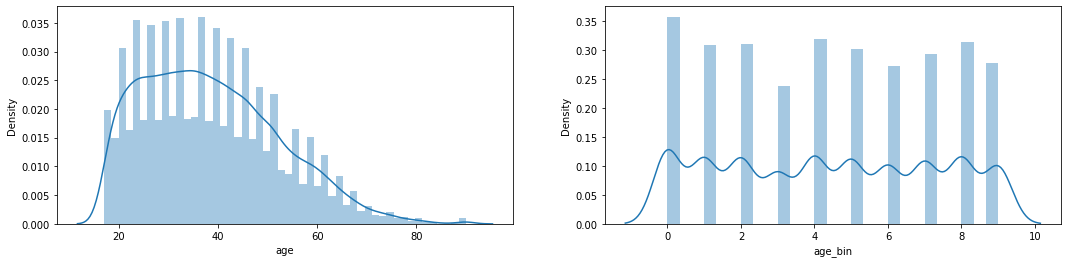

In [129]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)


sns.distplot(df_num["age"], ax=ax1)
sns.distplot(df_num["age_bin"], ax=ax2)

<AxesSubplot:xlabel='age_bin', ylabel='count'>

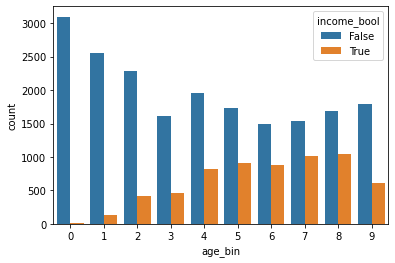

In [130]:
sns.countplot(data = df_num, x = 'age_bin', hue = 'income_bool')

In [131]:
# test data
df_num_t['age_bin'] = pd.qcut(df_num_t['age'], 10, labels = False)
print(df_num_t.shape)
df_num_t[['age', 'age_bin']]

(6512, 18)


age  age_bin
0      28        2
1      40        5
2      20        0
3      40        5
4      37        4
...   ...      ...
6507   35        4
6508   41        5
6509   39        5
6510   35        4
6511   28        2

[6512 rows x 2 columns]

In [146]:
# test data
df_num_t['relationship_bool'] = (df_num_t['relationship'] == 0) | (df_num_t['relationship'] == 5)
print(df_num_t.shape)
df_num_t[['relationship', 'relationship_bool']].head()

(6512, 20)


relationship  relationship_bool
0             2              False
1             0               True
2             3              False
3             0               True
4             0               True

## 2. hours_per_week

In [132]:
pd.pivot_table(data = df_num, index = 'hours_per_week', values = 'income_bool', aggfunc = np.mean)

income_bool
hours_per_week             
1                  0.062500
2                  0.280000
3                  0.029412
4                  0.052632
5                  0.137255
6                  0.130435
7                  0.166667
8                  0.050420
9                  0.000000
10                 0.065502
11                 0.000000
12                 0.071429
13                 0.086957
14                 0.086957
15                 0.027778
16                 0.056604
17                 0.041667
18                 0.098361
19                 0.000000
20                 0.066667
21                 0.000000
22                 0.108108
23                 0.000000
24                 0.099502
25                 0.051948
26                 0.181818
27                 0.040000
28                 0.058824
29                 0.166667
30                 0.067329
31                 0.000000
32                 0.105023
33                 0.107143
34                 0.086957
35                 0.145873
36                 0.198830
37                 0.142857
38                 0.174026
39                 0.120000
40                 0.213592
41                 0.250000
42                 0.347305
43                 0.283333
44                 0.321637
45                 0.384088
46                 0.366667
47                 0.305556
48                 0.285036
49                 0.200000
50                 0.456353
51                 0.200000
52                 0.376238
53                 0.222222
54                 0.379310
55                 0.465364
56                 0.402597
57                 0.500000
58                 0.320000
59                 0.400000
60                 0.432990
61                 1.000000
62                 0.230769
63                 0.428571
64                 0.454545
65                 0.420000
66                 0.133333
67                 0.750000
68                 0.454545
70                 0.388186
72                 0.377358
73                 0.500000
74                 0.000000
75                 0.297872
76                 0.666667
77                 0.000000
78                 0.285714
80                 0.426087
81                 0.000000
82                 0.000000
84                 0.444444
85                 0.333333
86                 0.000000
88                 0.000000
89                 0.000000
90                 0.320000
91                 0.000000
92                 0.000000
94                 0.000000
95                 0.000000
96                 0.200000
97                 0.000000
98                 0.333333
99                 0.307692

In [133]:
df_num['hours_per_week_log'] = np.log(df_num['hours_per_week'] + 1)

In [134]:
#test data
df_num_t['hours_per_week_log'] = np.log(df_num_t['hours_per_week'] + 1)

/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/theo/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours_per_week_log', ylabel='Density'>

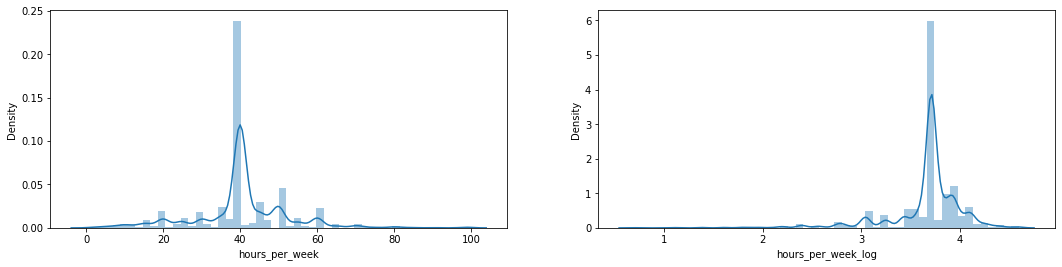

In [135]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)


sns.distplot(df_num["hours_per_week"], ax=ax1)
sns.distplot(df_num["hours_per_week_log"], ax=ax2)

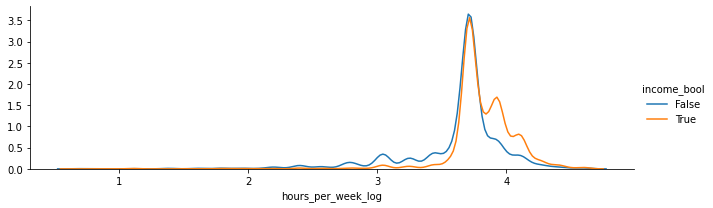

In [136]:
fa = sns.FacetGrid(df_num, hue = 'income_bool', aspect = 3)
fa.map(sns.kdeplot, 'hours_per_week_log')
fa.add_legend()

## 3. Occupation

In [191]:
df_num['work_ceo_prof'] = (df_num['occupation'] == 4) | (df_num['occupation'] == 10) & (df_num['workclass'] == 5)
print(df_num.shape)
df_num[['occupation','workclass','work_ceo_prof']].head()

(26049, 23)


occupation  workclass  work_ceo_prof
0          12          4          False
1           7          4          False
2           8          4          False
3          10          4          False
4           1          4          False

In [192]:
# test
df_num_t['work_ceo_prof'] = (df_num_t['occupation'] == 4) | (df_num_t['occupation'] == 10) & (df_num_t['workclass'] == 5)
print(df_num_t.shape)
df_num_t[['occupation','workclass','work_ceo_prof']].head()

(6512, 20)


occupation  workclass  work_ceo_prof
0           1          4          False
1           4          5           True
2           6          4          False
3           4          4           True
4          10          4          False

# Feature Engineering

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
df_num.columns

Index(['id', 'age', 'workclass', 'fnlwgt', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'income_bool', 'age_bin', 'hours_per_week_log', 'Male_married_14y_edu',
       'ceo_prof_m', 'age_log'],
      dtype='object')

In [185]:
# features = ['education_num', 'marital_status', 'capital_gain_bool', 'capital_loss_bool', 
#            'major_age', 'married_bool', 'relationship_bool', 'hours_per_week_log'] eda 1차
# features = ['workclass', 'education_num', 'marital_status', 'occupation', 'capital_gain_bool', 'age_bin', 
#            'hours_per_week_log', 'sex', 'relationship'] # eda 2차
# features = ['education_num', 'capital_gain_bool', 'capital_loss_bool', 'sex', 'relationship' ] # eda 2.5차
# features = ['age_bool', 'hours_per_week_bool', 'Male_married_13y_edu', 'native_country_bool',
#            'education_num', 'capital_gain_bool','workclass','occupation', 'relationship', 'race', 'sex'] # eda 3차

features = ['age_bin', 'hours_per_week_log', 'Male_married_14y_edu','ceo_prof_m',
            'education_num','relationship', 'workclass', 'occupation', 'capital_gain_bool', 'sex', 'race']
target = 'income_bool'

In [186]:
X = df_num[features]
print(X.shape)
X.head()

(26049, 11)


age_bin  hours_per_week_log  Male_married_14y_edu  ceo_prof_m  \
0        5            4.110874                 False       False   
1        0            3.044522                 False       False   
2        0            2.833213                 False       False   
3        0            3.258097                 False       False   
4        1            3.044522                 False       False   

   education_num  relationship  workclass  occupation  capital_gain_bool  sex  \
0              9             0          4          12              False    1   
1              5             3          4           7              False    1   
2             10             3          4           8              False    1   
3             10             3          4          10              False    0   
4             10             1          4           1              False    0   

   race  
0     4  
1     4  
2     4  
3     4  
4     2

In [187]:
y = df_num[target]
print(y.shape)
y.head()

(26049,)


0     True
1    False
2    False
3    False
4    False
Name: income_bool, dtype: bool

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(20839, 11) (20839,)
(5210, 11) (5210,)


# Model Tuning & Evaluation

In [189]:

# 모듈 import
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix


# 0. 쓰고싶은 모델을 Import 한다.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# 1. 모델들과 결과들의 Dictionary를 만들어준다.
models_list = {'DecisionTreeClassifier': DecisionTreeClassifier(),
              'RandomForestClassifier': RandomForestClassifier(),
              'svm':svm.SVC(),
              'SGDClassifier':SGDClassifier(),
              'LogisticRegression':LogisticRegression()}



# 2. 함수로 만들어 보기
def run():

    for model_name, model in models_list.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(model_name)
        print(accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
        print('------------------------------'*2)

In [190]:
run()

DecisionTreeClassifier
0.799616122840691
              precision    recall  f1-score   support

       False       0.86      0.87      0.87      3978
        True       0.58      0.56      0.57      1232

    accuracy                           0.80      5210
   macro avg       0.72      0.72      0.72      5210
weighted avg       0.80      0.80      0.80      5210

[[3480  498]
 [ 546  686]]
------------------------------------------------------------
RandomForestClassifier
0.8251439539347409
              precision    recall  f1-score   support

       False       0.88      0.90      0.89      3978
        True       0.64      0.59      0.62      1232

    accuracy                           0.83      5210
   macro avg       0.76      0.75      0.75      5210
weighted avg       0.82      0.83      0.82      5210

[[3568  410]
 [ 501  731]]
------------------------------------------------------------
svm
0.8401151631477927
              precision    recall  f1-score   support

       Fa

In [191]:
from sklearn.model_selection import KFold, GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, roc_auc_score
lgbm = LGBMClassifier(n_estimators=200)

params = {'max_depth': [10, 15, 20],
          'min_child_samples': [20, 40, 60],
          'subsample': [0.8, 1]}

In [192]:
grid = GridSearchCV(lgbm, param_grid = params)
grid.fit(X_train, y_train, early_stopping_rounds = 100,
        eval_metric = 'auc',
        eval_set = [(X_train, y_train), (X_test, y_test)])
print('최적 파라미터: ', grid.best_params_)
lgbm_roc_score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878646	valid_0's binary_logloss: 0.518858	valid_1's auc: 0.888065	valid_1's binary_logloss: 0.509486
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884712	valid_0's binary_logloss: 0.491108	valid_1's auc: 0.895143	valid_1's binary_logloss: 0.480363
[3]	valid_0's auc: 0.8883	valid_0's binary_logloss: 0.46843	valid_1's auc: 0.898328	valid_1's binary_logloss: 0.457098
[4]	valid_0's auc: 0.889352	valid_0's binary_logloss: 0.449986	valid_1's auc: 0.898947	valid_1's binary_logloss: 0.438231
[5]	valid_0's auc: 0.890141	valid_0's binary_logloss: 0.434473	valid_1's auc: 0.898931	valid_1's binary_logloss: 0.422535
[6]	valid_0's auc: 0.892826	valid_0's binary_logloss: 0.421589	valid_1's auc: 0.901238	valid_1's binary_logloss: 0.409586
[7]	valid_0's auc: 0.893781	valid_0's binary_logloss: 0.410293	valid_1's auc: 0.901973	valid_1's binary_log

[89]	valid_0's auc: 0.920872	valid_0's binary_logloss: 0.30057	valid_1's auc: 0.907653	valid_1's binary_logloss: 0.317041
[90]	valid_0's auc: 0.92104	valid_0's binary_logloss: 0.300329	valid_1's auc: 0.907668	valid_1's binary_logloss: 0.317018
[91]	valid_0's auc: 0.921223	valid_0's binary_logloss: 0.300012	valid_1's auc: 0.907624	valid_1's binary_logloss: 0.317075
[92]	valid_0's auc: 0.921399	valid_0's binary_logloss: 0.299722	valid_1's auc: 0.907689	valid_1's binary_logloss: 0.316982
[93]	valid_0's auc: 0.921477	valid_0's binary_logloss: 0.299557	valid_1's auc: 0.907606	valid_1's binary_logloss: 0.317113
[94]	valid_0's auc: 0.921683	valid_0's binary_logloss: 0.29923	valid_1's auc: 0.907493	valid_1's binary_logloss: 0.317305
[95]	valid_0's auc: 0.921801	valid_0's binary_logloss: 0.298982	valid_1's auc: 0.90743	valid_1's binary_logloss: 0.317375
[96]	valid_0's auc: 0.921988	valid_0's binary_logloss: 0.29865	valid_1's auc: 0.90739	valid_1's binary_logloss: 0.317409
[97]	valid_0's auc: 0.

[24]	valid_0's auc: 0.905771	valid_0's binary_logloss: 0.335103	valid_1's auc: 0.90742	valid_1's binary_logloss: 0.327188
[25]	valid_0's auc: 0.906193	valid_0's binary_logloss: 0.333538	valid_1's auc: 0.907555	valid_1's binary_logloss: 0.325914
[26]	valid_0's auc: 0.906525	valid_0's binary_logloss: 0.332044	valid_1's auc: 0.907754	valid_1's binary_logloss: 0.324694
[27]	valid_0's auc: 0.906928	valid_0's binary_logloss: 0.330708	valid_1's auc: 0.908007	valid_1's binary_logloss: 0.323599
[28]	valid_0's auc: 0.907348	valid_0's binary_logloss: 0.329488	valid_1's auc: 0.908123	valid_1's binary_logloss: 0.322757
[29]	valid_0's auc: 0.907689	valid_0's binary_logloss: 0.328183	valid_1's auc: 0.908308	valid_1's binary_logloss: 0.321749
[30]	valid_0's auc: 0.908027	valid_0's binary_logloss: 0.327194	valid_1's auc: 0.908314	valid_1's binary_logloss: 0.321256
[31]	valid_0's auc: 0.908416	valid_0's binary_logloss: 0.326076	valid_1's auc: 0.908232	valid_1's binary_logloss: 0.32071
[32]	valid_0's auc

[109]	valid_0's auc: 0.922856	valid_0's binary_logloss: 0.296982	valid_1's auc: 0.907493	valid_1's binary_logloss: 0.317132
[110]	valid_0's auc: 0.922942	valid_0's binary_logloss: 0.296843	valid_1's auc: 0.907432	valid_1's binary_logloss: 0.317259
[111]	valid_0's auc: 0.923105	valid_0's binary_logloss: 0.296576	valid_1's auc: 0.907331	valid_1's binary_logloss: 0.317434
[112]	valid_0's auc: 0.923228	valid_0's binary_logloss: 0.296394	valid_1's auc: 0.907263	valid_1's binary_logloss: 0.317558
[113]	valid_0's auc: 0.923343	valid_0's binary_logloss: 0.296202	valid_1's auc: 0.90729	valid_1's binary_logloss: 0.317518
[114]	valid_0's auc: 0.923493	valid_0's binary_logloss: 0.295947	valid_1's auc: 0.907272	valid_1's binary_logloss: 0.31757
[115]	valid_0's auc: 0.923641	valid_0's binary_logloss: 0.295702	valid_1's auc: 0.907231	valid_1's binary_logloss: 0.317647
[116]	valid_0's auc: 0.923721	valid_0's binary_logloss: 0.295532	valid_1's auc: 0.907163	valid_1's binary_logloss: 0.317789
[117]	vali

[35]	valid_0's auc: 0.909026	valid_0's binary_logloss: 0.322911	valid_1's auc: 0.908433	valid_1's binary_logloss: 0.319094
[36]	valid_0's auc: 0.909319	valid_0's binary_logloss: 0.322158	valid_1's auc: 0.908566	valid_1's binary_logloss: 0.318581
[37]	valid_0's auc: 0.909632	valid_0's binary_logloss: 0.321394	valid_1's auc: 0.90859	valid_1's binary_logloss: 0.318291
[38]	valid_0's auc: 0.909909	valid_0's binary_logloss: 0.320667	valid_1's auc: 0.908652	valid_1's binary_logloss: 0.317878
[39]	valid_0's auc: 0.91022	valid_0's binary_logloss: 0.320004	valid_1's auc: 0.908641	valid_1's binary_logloss: 0.317719
[40]	valid_0's auc: 0.910443	valid_0's binary_logloss: 0.319418	valid_1's auc: 0.908642	valid_1's binary_logloss: 0.317528
[41]	valid_0's auc: 0.91089	valid_0's binary_logloss: 0.318632	valid_1's auc: 0.908679	valid_1's binary_logloss: 0.317267
[42]	valid_0's auc: 0.911188	valid_0's binary_logloss: 0.318011	valid_1's auc: 0.90868	valid_1's binary_logloss: 0.317136
[43]	valid_0's auc: 

[117]	valid_0's auc: 0.924086	valid_0's binary_logloss: 0.29465	valid_1's auc: 0.907081	valid_1's binary_logloss: 0.318287
[118]	valid_0's auc: 0.9242	valid_0's binary_logloss: 0.294464	valid_1's auc: 0.906952	valid_1's binary_logloss: 0.318457
[119]	valid_0's auc: 0.924267	valid_0's binary_logloss: 0.294354	valid_1's auc: 0.906889	valid_1's binary_logloss: 0.318601
[120]	valid_0's auc: 0.924419	valid_0's binary_logloss: 0.294099	valid_1's auc: 0.906939	valid_1's binary_logloss: 0.318532
[121]	valid_0's auc: 0.924555	valid_0's binary_logloss: 0.293892	valid_1's auc: 0.906947	valid_1's binary_logloss: 0.318524
[122]	valid_0's auc: 0.924633	valid_0's binary_logloss: 0.293761	valid_1's auc: 0.906804	valid_1's binary_logloss: 0.318769
[123]	valid_0's auc: 0.924779	valid_0's binary_logloss: 0.293551	valid_1's auc: 0.906717	valid_1's binary_logloss: 0.31892
[124]	valid_0's auc: 0.924867	valid_0's binary_logloss: 0.293398	valid_1's auc: 0.906736	valid_1's binary_logloss: 0.318881
[125]	valid_

[38]	valid_0's auc: 0.90993	valid_0's binary_logloss: 0.320987	valid_1's auc: 0.907843	valid_1's binary_logloss: 0.319209
[39]	valid_0's auc: 0.91026	valid_0's binary_logloss: 0.320273	valid_1's auc: 0.907988	valid_1's binary_logloss: 0.318773
[40]	valid_0's auc: 0.910522	valid_0's binary_logloss: 0.319618	valid_1's auc: 0.907985	valid_1's binary_logloss: 0.3185
[41]	valid_0's auc: 0.910904	valid_0's binary_logloss: 0.318857	valid_1's auc: 0.90801	valid_1's binary_logloss: 0.318229
[42]	valid_0's auc: 0.911218	valid_0's binary_logloss: 0.318272	valid_1's auc: 0.908175	valid_1's binary_logloss: 0.317922
[43]	valid_0's auc: 0.91151	valid_0's binary_logloss: 0.317627	valid_1's auc: 0.908296	valid_1's binary_logloss: 0.317649
[44]	valid_0's auc: 0.911804	valid_0's binary_logloss: 0.316981	valid_1's auc: 0.908338	valid_1's binary_logloss: 0.317455
[45]	valid_0's auc: 0.912019	valid_0's binary_logloss: 0.316424	valid_1's auc: 0.908458	valid_1's binary_logloss: 0.317189
[46]	valid_0's auc: 0.

[133]	valid_0's auc: 0.926293	valid_0's binary_logloss: 0.291418	valid_1's auc: 0.9045	valid_1's binary_logloss: 0.322424
[134]	valid_0's auc: 0.926391	valid_0's binary_logloss: 0.291219	valid_1's auc: 0.904543	valid_1's binary_logloss: 0.322376
[135]	valid_0's auc: 0.926555	valid_0's binary_logloss: 0.290962	valid_1's auc: 0.90453	valid_1's binary_logloss: 0.322367
[136]	valid_0's auc: 0.926713	valid_0's binary_logloss: 0.290673	valid_1's auc: 0.904557	valid_1's binary_logloss: 0.322379
[137]	valid_0's auc: 0.926835	valid_0's binary_logloss: 0.290451	valid_1's auc: 0.904492	valid_1's binary_logloss: 0.32251
[138]	valid_0's auc: 0.926964	valid_0's binary_logloss: 0.290239	valid_1's auc: 0.904509	valid_1's binary_logloss: 0.322485
[139]	valid_0's auc: 0.927042	valid_0's binary_logloss: 0.290085	valid_1's auc: 0.904543	valid_1's binary_logloss: 0.322489
[140]	valid_0's auc: 0.92715	valid_0's binary_logloss: 0.289886	valid_1's auc: 0.904484	valid_1's binary_logloss: 0.322597
[141]	valid_0

[68]	valid_0's auc: 0.91679	valid_0's binary_logloss: 0.30745	valid_1's auc: 0.907623	valid_1's binary_logloss: 0.317041
[69]	valid_0's auc: 0.916994	valid_0's binary_logloss: 0.307078	valid_1's auc: 0.907542	valid_1's binary_logloss: 0.317147
[70]	valid_0's auc: 0.917139	valid_0's binary_logloss: 0.306838	valid_1's auc: 0.907392	valid_1's binary_logloss: 0.317363
[71]	valid_0's auc: 0.917259	valid_0's binary_logloss: 0.306611	valid_1's auc: 0.907458	valid_1's binary_logloss: 0.317221
[72]	valid_0's auc: 0.917491	valid_0's binary_logloss: 0.306238	valid_1's auc: 0.907461	valid_1's binary_logloss: 0.317225
[73]	valid_0's auc: 0.917735	valid_0's binary_logloss: 0.305817	valid_1's auc: 0.90747	valid_1's binary_logloss: 0.317178
[74]	valid_0's auc: 0.917875	valid_0's binary_logloss: 0.305579	valid_1's auc: 0.907333	valid_1's binary_logloss: 0.31737
[75]	valid_0's auc: 0.918033	valid_0's binary_logloss: 0.305281	valid_1's auc: 0.907277	valid_1's binary_logloss: 0.31751
[76]	valid_0's auc: 0

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878646	valid_0's binary_logloss: 0.518858	valid_1's auc: 0.888065	valid_1's binary_logloss: 0.509486
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884712	valid_0's binary_logloss: 0.491108	valid_1's auc: 0.895143	valid_1's binary_logloss: 0.480363
[3]	valid_0's auc: 0.8883	valid_0's binary_logloss: 0.46843	valid_1's auc: 0.898328	valid_1's binary_logloss: 0.457098
[4]	valid_0's auc: 0.889352	valid_0's binary_logloss: 0.449986	valid_1's auc: 0.898947	valid_1's binary_logloss: 0.438231
[5]	valid_0's auc: 0.890141	valid_0's binary_logloss: 0.434473	valid_1's auc: 0.898931	valid_1's binary_logloss: 0.422535
[6]	valid_0's auc: 0.892826	valid_0's binary_logloss: 0.421589	valid_1's auc: 0.901238	valid_1's binary_logloss: 0.409586
[7]	valid_0's auc: 0.893781	valid_0's binary_logloss: 0.410293	valid_1's auc: 0.901973	valid_1's binary_log

[82]	valid_0's auc: 0.919891	valid_0's binary_logloss: 0.302276	valid_1's auc: 0.908143	valid_1's binary_logloss: 0.316349
[83]	valid_0's auc: 0.920042	valid_0's binary_logloss: 0.302026	valid_1's auc: 0.9081	valid_1's binary_logloss: 0.316415
[84]	valid_0's auc: 0.920157	valid_0's binary_logloss: 0.301805	valid_1's auc: 0.908079	valid_1's binary_logloss: 0.316451
[85]	valid_0's auc: 0.920357	valid_0's binary_logloss: 0.301484	valid_1's auc: 0.907975	valid_1's binary_logloss: 0.316583
[86]	valid_0's auc: 0.920503	valid_0's binary_logloss: 0.301252	valid_1's auc: 0.907818	valid_1's binary_logloss: 0.316838
[87]	valid_0's auc: 0.920623	valid_0's binary_logloss: 0.301037	valid_1's auc: 0.907764	valid_1's binary_logloss: 0.316948
[88]	valid_0's auc: 0.920815	valid_0's binary_logloss: 0.300707	valid_1's auc: 0.907661	valid_1's binary_logloss: 0.317036
[89]	valid_0's auc: 0.920872	valid_0's binary_logloss: 0.30057	valid_1's auc: 0.907653	valid_1's binary_logloss: 0.317041
[90]	valid_0's auc:

[1]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.519208	valid_1's auc: 0.888876	valid_1's binary_logloss: 0.509348
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881248	valid_0's binary_logloss: 0.491498	valid_1's auc: 0.891306	valid_1's binary_logloss: 0.480681
[3]	valid_0's auc: 0.884475	valid_0's binary_logloss: 0.468773	valid_1's auc: 0.893712	valid_1's binary_logloss: 0.457126
[4]	valid_0's auc: 0.889174	valid_0's binary_logloss: 0.450111	valid_1's auc: 0.898361	valid_1's binary_logloss: 0.43804
[5]	valid_0's auc: 0.892478	valid_0's binary_logloss: 0.434696	valid_1's auc: 0.899784	valid_1's binary_logloss: 0.422648
[6]	valid_0's auc: 0.893488	valid_0's binary_logloss: 0.421487	valid_1's auc: 0.900493	valid_1's binary_logloss: 0.409256
[7]	valid_0's auc: 0.894912	valid_0's binary_logloss: 0.410129	valid_1's auc: 0.901622	valid_1's binary_logloss: 0.397908
[8]	valid_0's auc: 0.895452	valid_0's binary_logloss: 0.400491	valid_1's auc: 0.90197

[85]	valid_0's auc: 0.91959	valid_0's binary_logloss: 0.302589	valid_1's auc: 0.908618	valid_1's binary_logloss: 0.315416
[86]	valid_0's auc: 0.91977	valid_0's binary_logloss: 0.302303	valid_1's auc: 0.908604	valid_1's binary_logloss: 0.315405
[87]	valid_0's auc: 0.919896	valid_0's binary_logloss: 0.30207	valid_1's auc: 0.908546	valid_1's binary_logloss: 0.315492
[88]	valid_0's auc: 0.920052	valid_0's binary_logloss: 0.301787	valid_1's auc: 0.908621	valid_1's binary_logloss: 0.3154
[89]	valid_0's auc: 0.920151	valid_0's binary_logloss: 0.30161	valid_1's auc: 0.908599	valid_1's binary_logloss: 0.315455
[90]	valid_0's auc: 0.920267	valid_0's binary_logloss: 0.3014	valid_1's auc: 0.908427	valid_1's binary_logloss: 0.315669
[91]	valid_0's auc: 0.920451	valid_0's binary_logloss: 0.301101	valid_1's auc: 0.908297	valid_1's binary_logloss: 0.315795
[92]	valid_0's auc: 0.920582	valid_0's binary_logloss: 0.300896	valid_1's auc: 0.908221	valid_1's binary_logloss: 0.315861
[93]	valid_0's auc: 0.92

[32]	valid_0's auc: 0.908162	valid_0's binary_logloss: 0.325439	valid_1's auc: 0.908212	valid_1's binary_logloss: 0.320492
[33]	valid_0's auc: 0.90849	valid_0's binary_logloss: 0.324463	valid_1's auc: 0.908236	valid_1's binary_logloss: 0.319968
[34]	valid_0's auc: 0.908826	valid_0's binary_logloss: 0.323601	valid_1's auc: 0.908303	valid_1's binary_logloss: 0.319578
[35]	valid_0's auc: 0.909026	valid_0's binary_logloss: 0.322911	valid_1's auc: 0.908433	valid_1's binary_logloss: 0.319094
[36]	valid_0's auc: 0.909319	valid_0's binary_logloss: 0.322158	valid_1's auc: 0.908566	valid_1's binary_logloss: 0.318581
[37]	valid_0's auc: 0.909632	valid_0's binary_logloss: 0.321394	valid_1's auc: 0.90859	valid_1's binary_logloss: 0.318291
[38]	valid_0's auc: 0.909909	valid_0's binary_logloss: 0.320667	valid_1's auc: 0.908652	valid_1's binary_logloss: 0.317878
[39]	valid_0's auc: 0.91022	valid_0's binary_logloss: 0.320004	valid_1's auc: 0.908641	valid_1's binary_logloss: 0.317719
[40]	valid_0's auc:

[104]	valid_0's auc: 0.922581	valid_0's binary_logloss: 0.297244	valid_1's auc: 0.907381	valid_1's binary_logloss: 0.317764
[105]	valid_0's auc: 0.922695	valid_0's binary_logloss: 0.297017	valid_1's auc: 0.90739	valid_1's binary_logloss: 0.317775
[106]	valid_0's auc: 0.922809	valid_0's binary_logloss: 0.296819	valid_1's auc: 0.907528	valid_1's binary_logloss: 0.317557
[107]	valid_0's auc: 0.922948	valid_0's binary_logloss: 0.29658	valid_1's auc: 0.907475	valid_1's binary_logloss: 0.317644
[108]	valid_0's auc: 0.923073	valid_0's binary_logloss: 0.296372	valid_1's auc: 0.907431	valid_1's binary_logloss: 0.317734
[109]	valid_0's auc: 0.923152	valid_0's binary_logloss: 0.296233	valid_1's auc: 0.907319	valid_1's binary_logloss: 0.317895
[110]	valid_0's auc: 0.923291	valid_0's binary_logloss: 0.296003	valid_1's auc: 0.907288	valid_1's binary_logloss: 0.317939
[111]	valid_0's auc: 0.923388	valid_0's binary_logloss: 0.295823	valid_1's auc: 0.907252	valid_1's binary_logloss: 0.318007
[112]	vali

[27]	valid_0's auc: 0.906583	valid_0's binary_logloss: 0.330987	valid_1's auc: 0.907141	valid_1's binary_logloss: 0.324951
[28]	valid_0's auc: 0.906931	valid_0's binary_logloss: 0.32971	valid_1's auc: 0.90722	valid_1's binary_logloss: 0.324137
[29]	valid_0's auc: 0.907253	valid_0's binary_logloss: 0.328493	valid_1's auc: 0.90714	valid_1's binary_logloss: 0.323459
[30]	valid_0's auc: 0.907626	valid_0's binary_logloss: 0.327326	valid_1's auc: 0.907282	valid_1's binary_logloss: 0.322659
[31]	valid_0's auc: 0.907929	valid_0's binary_logloss: 0.326438	valid_1's auc: 0.907512	valid_1's binary_logloss: 0.321981
[32]	valid_0's auc: 0.908131	valid_0's binary_logloss: 0.325542	valid_1's auc: 0.907558	valid_1's binary_logloss: 0.321347
[33]	valid_0's auc: 0.908385	valid_0's binary_logloss: 0.324691	valid_1's auc: 0.907559	valid_1's binary_logloss: 0.320848
[34]	valid_0's auc: 0.908661	valid_0's binary_logloss: 0.323821	valid_1's auc: 0.907708	valid_1's binary_logloss: 0.320272
[35]	valid_0's auc:

[106]	valid_0's auc: 0.923053	valid_0's binary_logloss: 0.296932	valid_1's auc: 0.90606	valid_1's binary_logloss: 0.31973
[107]	valid_0's auc: 0.923217	valid_0's binary_logloss: 0.29667	valid_1's auc: 0.906052	valid_1's binary_logloss: 0.319742
[108]	valid_0's auc: 0.923344	valid_0's binary_logloss: 0.296488	valid_1's auc: 0.905929	valid_1's binary_logloss: 0.319935
[109]	valid_0's auc: 0.923549	valid_0's binary_logloss: 0.296173	valid_1's auc: 0.905826	valid_1's binary_logloss: 0.320106
[110]	valid_0's auc: 0.923647	valid_0's binary_logloss: 0.296025	valid_1's auc: 0.905743	valid_1's binary_logloss: 0.320228
[111]	valid_0's auc: 0.923748	valid_0's binary_logloss: 0.295848	valid_1's auc: 0.905654	valid_1's binary_logloss: 0.320354
[112]	valid_0's auc: 0.923819	valid_0's binary_logloss: 0.29571	valid_1's auc: 0.905663	valid_1's binary_logloss: 0.320375
[113]	valid_0's auc: 0.923973	valid_0's binary_logloss: 0.295446	valid_1's auc: 0.905618	valid_1's binary_logloss: 0.320451
[114]	valid_

[24]	valid_0's auc: 0.905504	valid_0's binary_logloss: 0.335456	valid_1's auc: 0.906692	valid_1's binary_logloss: 0.328098
[25]	valid_0's auc: 0.906126	valid_0's binary_logloss: 0.333705	valid_1's auc: 0.907098	valid_1's binary_logloss: 0.326592
[26]	valid_0's auc: 0.906509	valid_0's binary_logloss: 0.332286	valid_1's auc: 0.907258	valid_1's binary_logloss: 0.325512
[27]	valid_0's auc: 0.906969	valid_0's binary_logloss: 0.330794	valid_1's auc: 0.90739	valid_1's binary_logloss: 0.324346
[28]	valid_0's auc: 0.907278	valid_0's binary_logloss: 0.329656	valid_1's auc: 0.90757	valid_1's binary_logloss: 0.323527
[29]	valid_0's auc: 0.907532	valid_0's binary_logloss: 0.328657	valid_1's auc: 0.907418	valid_1's binary_logloss: 0.322992
[30]	valid_0's auc: 0.907913	valid_0's binary_logloss: 0.32746	valid_1's auc: 0.907478	valid_1's binary_logloss: 0.32227
[31]	valid_0's auc: 0.908216	valid_0's binary_logloss: 0.326501	valid_1's auc: 0.907637	valid_1's binary_logloss: 0.321634
[32]	valid_0's auc: 

[101]	valid_0's auc: 0.921996	valid_0's binary_logloss: 0.29866	valid_1's auc: 0.907026	valid_1's binary_logloss: 0.317919
[102]	valid_0's auc: 0.922122	valid_0's binary_logloss: 0.29841	valid_1's auc: 0.90702	valid_1's binary_logloss: 0.31791
[103]	valid_0's auc: 0.922263	valid_0's binary_logloss: 0.298189	valid_1's auc: 0.907006	valid_1's binary_logloss: 0.317926
[104]	valid_0's auc: 0.922449	valid_0's binary_logloss: 0.297911	valid_1's auc: 0.906951	valid_1's binary_logloss: 0.318
[105]	valid_0's auc: 0.922572	valid_0's binary_logloss: 0.297694	valid_1's auc: 0.906923	valid_1's binary_logloss: 0.318061
[106]	valid_0's auc: 0.922681	valid_0's binary_logloss: 0.297518	valid_1's auc: 0.906843	valid_1's binary_logloss: 0.31819
[107]	valid_0's auc: 0.92285	valid_0's binary_logloss: 0.297271	valid_1's auc: 0.906874	valid_1's binary_logloss: 0.318152
[108]	valid_0's auc: 0.92305	valid_0's binary_logloss: 0.296934	valid_1's auc: 0.906745	valid_1's binary_logloss: 0.31836
[109]	valid_0's auc

[36]	valid_0's auc: 0.909283	valid_0's binary_logloss: 0.322543	valid_1's auc: 0.90814	valid_1's binary_logloss: 0.318916
[37]	valid_0's auc: 0.909551	valid_0's binary_logloss: 0.321872	valid_1's auc: 0.908223	valid_1's binary_logloss: 0.318557
[38]	valid_0's auc: 0.909836	valid_0's binary_logloss: 0.321179	valid_1's auc: 0.908347	valid_1's binary_logloss: 0.318137
[39]	valid_0's auc: 0.910044	valid_0's binary_logloss: 0.320561	valid_1's auc: 0.908386	valid_1's binary_logloss: 0.317823
[40]	valid_0's auc: 0.91034	valid_0's binary_logloss: 0.319875	valid_1's auc: 0.908443	valid_1's binary_logloss: 0.317478
[41]	valid_0's auc: 0.91064	valid_0's binary_logloss: 0.319195	valid_1's auc: 0.908499	valid_1's binary_logloss: 0.317253
[42]	valid_0's auc: 0.910856	valid_0's binary_logloss: 0.318716	valid_1's auc: 0.908524	valid_1's binary_logloss: 0.317081
[43]	valid_0's auc: 0.911196	valid_0's binary_logloss: 0.318039	valid_1's auc: 0.908681	valid_1's binary_logloss: 0.316652
[44]	valid_0's auc:

[137]	valid_0's auc: 0.92483	valid_0's binary_logloss: 0.293391	valid_1's auc: 0.905791	valid_1's binary_logloss: 0.31983
[138]	valid_0's auc: 0.92489	valid_0's binary_logloss: 0.293274	valid_1's auc: 0.905733	valid_1's binary_logloss: 0.319909
[139]	valid_0's auc: 0.924994	valid_0's binary_logloss: 0.293093	valid_1's auc: 0.905706	valid_1's binary_logloss: 0.319941
[140]	valid_0's auc: 0.925125	valid_0's binary_logloss: 0.292872	valid_1's auc: 0.905638	valid_1's binary_logloss: 0.320059
[141]	valid_0's auc: 0.925176	valid_0's binary_logloss: 0.292739	valid_1's auc: 0.905617	valid_1's binary_logloss: 0.320111
[142]	valid_0's auc: 0.925295	valid_0's binary_logloss: 0.292548	valid_1's auc: 0.905535	valid_1's binary_logloss: 0.320194
[143]	valid_0's auc: 0.925448	valid_0's binary_logloss: 0.292323	valid_1's auc: 0.905554	valid_1's binary_logloss: 0.320168
[144]	valid_0's auc: 0.925558	valid_0's binary_logloss: 0.292141	valid_1's auc: 0.905434	valid_1's binary_logloss: 0.320364
[145]	valid

[54]	valid_0's auc: 0.913643	valid_0's binary_logloss: 0.31293	valid_1's auc: 0.908846	valid_1's binary_logloss: 0.315399
[55]	valid_0's auc: 0.913839	valid_0's binary_logloss: 0.31256	valid_1's auc: 0.908789	valid_1's binary_logloss: 0.315418
[56]	valid_0's auc: 0.914038	valid_0's binary_logloss: 0.312192	valid_1's auc: 0.908805	valid_1's binary_logloss: 0.315463
[57]	valid_0's auc: 0.914176	valid_0's binary_logloss: 0.311899	valid_1's auc: 0.908709	valid_1's binary_logloss: 0.315567
[58]	valid_0's auc: 0.914345	valid_0's binary_logloss: 0.311588	valid_1's auc: 0.908715	valid_1's binary_logloss: 0.315556
[59]	valid_0's auc: 0.914497	valid_0's binary_logloss: 0.311279	valid_1's auc: 0.908627	valid_1's binary_logloss: 0.315626
[60]	valid_0's auc: 0.914631	valid_0's binary_logloss: 0.311027	valid_1's auc: 0.908598	valid_1's binary_logloss: 0.315674
[61]	valid_0's auc: 0.914808	valid_0's binary_logloss: 0.310658	valid_1's auc: 0.908534	valid_1's binary_logloss: 0.31569
[62]	valid_0's auc:

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877611	valid_0's binary_logloss: 0.518791	valid_1's auc: 0.888843	valid_1's binary_logloss: 0.509032
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.880162	valid_0's binary_logloss: 0.491167	valid_1's auc: 0.891014	valid_1's binary_logloss: 0.48011
[3]	valid_0's auc: 0.886966	valid_0's binary_logloss: 0.46822	valid_1's auc: 0.898742	valid_1's binary_logloss: 0.456287
[4]	valid_0's auc: 0.889161	valid_0's binary_logloss: 0.449628	valid_1's auc: 0.900066	valid_1's binary_logloss: 0.437121
[5]	valid_0's auc: 0.889684	valid_0's binary_logloss: 0.433993	valid_1's auc: 0.900416	valid_1's binary_logloss: 0.421008
[6]	valid_0's auc: 0.890957	valid_0's binary_logloss: 0.420788	valid_1's auc: 0.90112	valid_1's binary_logloss: 0.407621
[7]	valid_0's auc: 0.891794	valid_0's binary_logloss: 0.409517	valid_1's auc: 0.901387	valid_1's binary_log

[82]	valid_0's auc: 0.917776	valid_0's binary_logloss: 0.305315	valid_1's auc: 0.908355	valid_1's binary_logloss: 0.316145
[83]	valid_0's auc: 0.917912	valid_0's binary_logloss: 0.305066	valid_1's auc: 0.908295	valid_1's binary_logloss: 0.316226
[84]	valid_0's auc: 0.918039	valid_0's binary_logloss: 0.304859	valid_1's auc: 0.908322	valid_1's binary_logloss: 0.316216
[85]	valid_0's auc: 0.918207	valid_0's binary_logloss: 0.304612	valid_1's auc: 0.908204	valid_1's binary_logloss: 0.316415
[86]	valid_0's auc: 0.91835	valid_0's binary_logloss: 0.304382	valid_1's auc: 0.908169	valid_1's binary_logloss: 0.316478
[87]	valid_0's auc: 0.918496	valid_0's binary_logloss: 0.304107	valid_1's auc: 0.908171	valid_1's binary_logloss: 0.316548
[88]	valid_0's auc: 0.918652	valid_0's binary_logloss: 0.303861	valid_1's auc: 0.908038	valid_1's binary_logloss: 0.316743
[89]	valid_0's auc: 0.918809	valid_0's binary_logloss: 0.303585	valid_1's auc: 0.90803	valid_1's binary_logloss: 0.31674
[90]	valid_0's auc:

[1]	valid_0's auc: 0.877926	valid_0's binary_logloss: 0.518978	valid_1's auc: 0.886616	valid_1's binary_logloss: 0.509605
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.88464	valid_0's binary_logloss: 0.491186	valid_1's auc: 0.893436	valid_1's binary_logloss: 0.48068
[3]	valid_0's auc: 0.887774	valid_0's binary_logloss: 0.468241	valid_1's auc: 0.89688	valid_1's binary_logloss: 0.456739
[4]	valid_0's auc: 0.889011	valid_0's binary_logloss: 0.449591	valid_1's auc: 0.898074	valid_1's binary_logloss: 0.437478
[5]	valid_0's auc: 0.890297	valid_0's binary_logloss: 0.434014	valid_1's auc: 0.898967	valid_1's binary_logloss: 0.421555
[6]	valid_0's auc: 0.890735	valid_0's binary_logloss: 0.42091	valid_1's auc: 0.899977	valid_1's binary_logloss: 0.408458
[7]	valid_0's auc: 0.894444	valid_0's binary_logloss: 0.409572	valid_1's auc: 0.901864	valid_1's binary_logloss: 0.397144
[8]	valid_0's auc: 0.895661	valid_0's binary_logloss: 0.399918	valid_1's auc: 0.902583	v

[82]	valid_0's auc: 0.918454	valid_0's binary_logloss: 0.304509	valid_1's auc: 0.907738	valid_1's binary_logloss: 0.317181
[83]	valid_0's auc: 0.918599	valid_0's binary_logloss: 0.304291	valid_1's auc: 0.907641	valid_1's binary_logloss: 0.317341
[84]	valid_0's auc: 0.918734	valid_0's binary_logloss: 0.304054	valid_1's auc: 0.907524	valid_1's binary_logloss: 0.317503
[85]	valid_0's auc: 0.918895	valid_0's binary_logloss: 0.303804	valid_1's auc: 0.90752	valid_1's binary_logloss: 0.317494
[86]	valid_0's auc: 0.919012	valid_0's binary_logloss: 0.303584	valid_1's auc: 0.907467	valid_1's binary_logloss: 0.317554
[87]	valid_0's auc: 0.919112	valid_0's binary_logloss: 0.303366	valid_1's auc: 0.907406	valid_1's binary_logloss: 0.317653
[88]	valid_0's auc: 0.919319	valid_0's binary_logloss: 0.303067	valid_1's auc: 0.90746	valid_1's binary_logloss: 0.317557
[89]	valid_0's auc: 0.919454	valid_0's binary_logloss: 0.30282	valid_1's auc: 0.907408	valid_1's binary_logloss: 0.317638
[90]	valid_0's auc:

[14]	valid_0's auc: 0.899871	valid_0's binary_logloss: 0.362331	valid_1's auc: 0.904763	valid_1's binary_logloss: 0.351031
[15]	valid_0's auc: 0.900565	valid_0's binary_logloss: 0.358176	valid_1's auc: 0.904994	valid_1's binary_logloss: 0.347332
[16]	valid_0's auc: 0.901509	valid_0's binary_logloss: 0.354352	valid_1's auc: 0.905264	valid_1's binary_logloss: 0.343893
[17]	valid_0's auc: 0.90194	valid_0's binary_logloss: 0.351108	valid_1's auc: 0.905455	valid_1's binary_logloss: 0.341142
[18]	valid_0's auc: 0.902374	valid_0's binary_logloss: 0.348246	valid_1's auc: 0.905708	valid_1's binary_logloss: 0.338651
[19]	valid_0's auc: 0.902836	valid_0's binary_logloss: 0.345583	valid_1's auc: 0.905699	valid_1's binary_logloss: 0.336409
[20]	valid_0's auc: 0.903177	valid_0's binary_logloss: 0.343305	valid_1's auc: 0.905775	valid_1's binary_logloss: 0.334452
[21]	valid_0's auc: 0.903698	valid_0's binary_logloss: 0.341187	valid_1's auc: 0.905649	valid_1's binary_logloss: 0.332862
[22]	valid_0's au

[89]	valid_0's auc: 0.918707	valid_0's binary_logloss: 0.303751	valid_1's auc: 0.907186	valid_1's binary_logloss: 0.317642
[90]	valid_0's auc: 0.918792	valid_0's binary_logloss: 0.30362	valid_1's auc: 0.907069	valid_1's binary_logloss: 0.317795
[91]	valid_0's auc: 0.918895	valid_0's binary_logloss: 0.303422	valid_1's auc: 0.907027	valid_1's binary_logloss: 0.317799
[92]	valid_0's auc: 0.919059	valid_0's binary_logloss: 0.303138	valid_1's auc: 0.907069	valid_1's binary_logloss: 0.317762
[93]	valid_0's auc: 0.919202	valid_0's binary_logloss: 0.302914	valid_1's auc: 0.907073	valid_1's binary_logloss: 0.317769
[94]	valid_0's auc: 0.919317	valid_0's binary_logloss: 0.302715	valid_1's auc: 0.906983	valid_1's binary_logloss: 0.317922
[95]	valid_0's auc: 0.919488	valid_0's binary_logloss: 0.302424	valid_1's auc: 0.906964	valid_1's binary_logloss: 0.317938
[96]	valid_0's auc: 0.919581	valid_0's binary_logloss: 0.302277	valid_1's auc: 0.906966	valid_1's binary_logloss: 0.317966
[97]	valid_0's au

[29]	valid_0's auc: 0.90707	valid_0's binary_logloss: 0.328912	valid_1's auc: 0.907831	valid_1's binary_logloss: 0.322448
[30]	valid_0's auc: 0.907388	valid_0's binary_logloss: 0.32786	valid_1's auc: 0.907813	valid_1's binary_logloss: 0.321781
[31]	valid_0's auc: 0.907771	valid_0's binary_logloss: 0.326897	valid_1's auc: 0.907905	valid_1's binary_logloss: 0.321263
[32]	valid_0's auc: 0.908177	valid_0's binary_logloss: 0.325791	valid_1's auc: 0.907931	valid_1's binary_logloss: 0.320784
[33]	valid_0's auc: 0.908468	valid_0's binary_logloss: 0.324807	valid_1's auc: 0.908053	valid_1's binary_logloss: 0.320074
[34]	valid_0's auc: 0.908817	valid_0's binary_logloss: 0.323972	valid_1's auc: 0.908125	valid_1's binary_logloss: 0.319641
[35]	valid_0's auc: 0.909034	valid_0's binary_logloss: 0.323189	valid_1's auc: 0.908232	valid_1's binary_logloss: 0.31908
[36]	valid_0's auc: 0.909283	valid_0's binary_logloss: 0.322543	valid_1's auc: 0.90814	valid_1's binary_logloss: 0.318916
[37]	valid_0's auc: 

[113]	valid_0's auc: 0.922301	valid_0's binary_logloss: 0.297693	valid_1's auc: 0.906453	valid_1's binary_logloss: 0.318626
[114]	valid_0's auc: 0.922407	valid_0's binary_logloss: 0.297467	valid_1's auc: 0.906448	valid_1's binary_logloss: 0.318681
[115]	valid_0's auc: 0.922545	valid_0's binary_logloss: 0.297247	valid_1's auc: 0.906339	valid_1's binary_logloss: 0.318831
[116]	valid_0's auc: 0.922699	valid_0's binary_logloss: 0.297001	valid_1's auc: 0.906318	valid_1's binary_logloss: 0.318867
[117]	valid_0's auc: 0.922855	valid_0's binary_logloss: 0.29678	valid_1's auc: 0.906257	valid_1's binary_logloss: 0.318967
[118]	valid_0's auc: 0.922954	valid_0's binary_logloss: 0.29661	valid_1's auc: 0.906237	valid_1's binary_logloss: 0.319037
[119]	valid_0's auc: 0.923046	valid_0's binary_logloss: 0.296463	valid_1's auc: 0.906141	valid_1's binary_logloss: 0.319184
[120]	valid_0's auc: 0.923143	valid_0's binary_logloss: 0.296302	valid_1's auc: 0.906117	valid_1's binary_logloss: 0.3192
[121]	valid_

[40]	valid_0's auc: 0.910344	valid_0's binary_logloss: 0.319927	valid_1's auc: 0.908604	valid_1's binary_logloss: 0.317212
[41]	valid_0's auc: 0.910549	valid_0's binary_logloss: 0.319402	valid_1's auc: 0.908721	valid_1's binary_logloss: 0.316882
[42]	valid_0's auc: 0.91082	valid_0's binary_logloss: 0.31881	valid_1's auc: 0.908753	valid_1's binary_logloss: 0.316665
[43]	valid_0's auc: 0.911091	valid_0's binary_logloss: 0.318201	valid_1's auc: 0.908667	valid_1's binary_logloss: 0.316646
[44]	valid_0's auc: 0.911298	valid_0's binary_logloss: 0.317658	valid_1's auc: 0.90871	valid_1's binary_logloss: 0.316427
[45]	valid_0's auc: 0.911555	valid_0's binary_logloss: 0.317141	valid_1's auc: 0.9087	valid_1's binary_logloss: 0.316293
[46]	valid_0's auc: 0.911837	valid_0's binary_logloss: 0.316629	valid_1's auc: 0.908634	valid_1's binary_logloss: 0.316283
[47]	valid_0's auc: 0.911945	valid_0's binary_logloss: 0.316256	valid_1's auc: 0.908691	valid_1's binary_logloss: 0.316056
[48]	valid_0's auc: 0

[111]	valid_0's auc: 0.921789	valid_0's binary_logloss: 0.298592	valid_1's auc: 0.906428	valid_1's binary_logloss: 0.318664
[112]	valid_0's auc: 0.921928	valid_0's binary_logloss: 0.298359	valid_1's auc: 0.90651	valid_1's binary_logloss: 0.318508
[113]	valid_0's auc: 0.92204	valid_0's binary_logloss: 0.298175	valid_1's auc: 0.906572	valid_1's binary_logloss: 0.318397
[114]	valid_0's auc: 0.922134	valid_0's binary_logloss: 0.298008	valid_1's auc: 0.90653	valid_1's binary_logloss: 0.318472
[115]	valid_0's auc: 0.922258	valid_0's binary_logloss: 0.297782	valid_1's auc: 0.906522	valid_1's binary_logloss: 0.318491
[116]	valid_0's auc: 0.9224	valid_0's binary_logloss: 0.297548	valid_1's auc: 0.906573	valid_1's binary_logloss: 0.318411
[117]	valid_0's auc: 0.922457	valid_0's binary_logloss: 0.29743	valid_1's auc: 0.906533	valid_1's binary_logloss: 0.318533
[118]	valid_0's auc: 0.922561	valid_0's binary_logloss: 0.297262	valid_1's auc: 0.906514	valid_1's binary_logloss: 0.318578
[119]	valid_0'

[52]	valid_0's auc: 0.912721	valid_0's binary_logloss: 0.314204	valid_1's auc: 0.909228	valid_1's binary_logloss: 0.31513
[53]	valid_0's auc: 0.912914	valid_0's binary_logloss: 0.313848	valid_1's auc: 0.909221	valid_1's binary_logloss: 0.315097
[54]	valid_0's auc: 0.913154	valid_0's binary_logloss: 0.313409	valid_1's auc: 0.909196	valid_1's binary_logloss: 0.315059
[55]	valid_0's auc: 0.913462	valid_0's binary_logloss: 0.312922	valid_1's auc: 0.909039	valid_1's binary_logloss: 0.315266
[56]	valid_0's auc: 0.913714	valid_0's binary_logloss: 0.31248	valid_1's auc: 0.90904	valid_1's binary_logloss: 0.31525
[57]	valid_0's auc: 0.913892	valid_0's binary_logloss: 0.312119	valid_1's auc: 0.909176	valid_1's binary_logloss: 0.315041
[58]	valid_0's auc: 0.914122	valid_0's binary_logloss: 0.311736	valid_1's auc: 0.909081	valid_1's binary_logloss: 0.315141
[59]	valid_0's auc: 0.914285	valid_0's binary_logloss: 0.311438	valid_1's auc: 0.909039	valid_1's binary_logloss: 0.315162
[60]	valid_0's auc: 

[146]	valid_0's auc: 0.924857	valid_0's binary_logloss: 0.293402	valid_1's auc: 0.906569	valid_1's binary_logloss: 0.319469
[147]	valid_0's auc: 0.924927	valid_0's binary_logloss: 0.293282	valid_1's auc: 0.906578	valid_1's binary_logloss: 0.319472
[148]	valid_0's auc: 0.924991	valid_0's binary_logloss: 0.293175	valid_1's auc: 0.906558	valid_1's binary_logloss: 0.319545
[149]	valid_0's auc: 0.925056	valid_0's binary_logloss: 0.293061	valid_1's auc: 0.906505	valid_1's binary_logloss: 0.319637
Early stopping, best iteration is:
[49]	valid_0's auc: 0.912029	valid_0's binary_logloss: 0.315536	valid_1's auc: 0.909435	valid_1's binary_logloss: 0.315048
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877926	valid_0's binary_logloss: 0.518978	valid_1's auc: 0.886616	valid_1's binary_logloss: 0.509605
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.88464	valid_0's binary_logloss: 0.49118

[69]	valid_0's auc: 0.916383	valid_0's binary_logloss: 0.308009	valid_1's auc: 0.907958	valid_1's binary_logloss: 0.316813
[70]	valid_0's auc: 0.916499	valid_0's binary_logloss: 0.30782	valid_1's auc: 0.907987	valid_1's binary_logloss: 0.316796
[71]	valid_0's auc: 0.916638	valid_0's binary_logloss: 0.307569	valid_1's auc: 0.907976	valid_1's binary_logloss: 0.31686
[72]	valid_0's auc: 0.916806	valid_0's binary_logloss: 0.307268	valid_1's auc: 0.907928	valid_1's binary_logloss: 0.31691
[73]	valid_0's auc: 0.916987	valid_0's binary_logloss: 0.306941	valid_1's auc: 0.908068	valid_1's binary_logloss: 0.316679
[74]	valid_0's auc: 0.917143	valid_0's binary_logloss: 0.306691	valid_1's auc: 0.908054	valid_1's binary_logloss: 0.316676
[75]	valid_0's auc: 0.91728	valid_0's binary_logloss: 0.306466	valid_1's auc: 0.908021	valid_1's binary_logloss: 0.316782
[76]	valid_0's auc: 0.917405	valid_0's binary_logloss: 0.306257	valid_1's auc: 0.907924	valid_1's binary_logloss: 0.316925
[77]	valid_0's auc: 

[136]	valid_0's auc: 0.924972	valid_0's binary_logloss: 0.293453	valid_1's auc: 0.90537	valid_1's binary_logloss: 0.321054
[137]	valid_0's auc: 0.925052	valid_0's binary_logloss: 0.293324	valid_1's auc: 0.905379	valid_1's binary_logloss: 0.32107
[138]	valid_0's auc: 0.925116	valid_0's binary_logloss: 0.293205	valid_1's auc: 0.905307	valid_1's binary_logloss: 0.321191
[139]	valid_0's auc: 0.925201	valid_0's binary_logloss: 0.293069	valid_1's auc: 0.905334	valid_1's binary_logloss: 0.321174
[140]	valid_0's auc: 0.92528	valid_0's binary_logloss: 0.292933	valid_1's auc: 0.905393	valid_1's binary_logloss: 0.321097
[141]	valid_0's auc: 0.925405	valid_0's binary_logloss: 0.292731	valid_1's auc: 0.905362	valid_1's binary_logloss: 0.321153
Early stopping, best iteration is:
[41]	valid_0's auc: 0.910515	valid_0's binary_logloss: 0.319145	valid_1's auc: 0.908439	valid_1's binary_logloss: 0.317566
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves

[65]	valid_0's auc: 0.915339	valid_0's binary_logloss: 0.309557	valid_1's auc: 0.907795	valid_1's binary_logloss: 0.316687
[66]	valid_0's auc: 0.915553	valid_0's binary_logloss: 0.309197	valid_1's auc: 0.907692	valid_1's binary_logloss: 0.316784
[67]	valid_0's auc: 0.915697	valid_0's binary_logloss: 0.308939	valid_1's auc: 0.907717	valid_1's binary_logloss: 0.316759
[68]	valid_0's auc: 0.915821	valid_0's binary_logloss: 0.308721	valid_1's auc: 0.907696	valid_1's binary_logloss: 0.31675
[69]	valid_0's auc: 0.915949	valid_0's binary_logloss: 0.308466	valid_1's auc: 0.907693	valid_1's binary_logloss: 0.316729
[70]	valid_0's auc: 0.916133	valid_0's binary_logloss: 0.308126	valid_1's auc: 0.907654	valid_1's binary_logloss: 0.316816
[71]	valid_0's auc: 0.916228	valid_0's binary_logloss: 0.307905	valid_1's auc: 0.907673	valid_1's binary_logloss: 0.316772
[72]	valid_0's auc: 0.916435	valid_0's binary_logloss: 0.307607	valid_1's auc: 0.907757	valid_1's binary_logloss: 0.316684
[73]	valid_0's au

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878364	valid_0's binary_logloss: 0.518951	valid_1's auc: 0.888264	valid_1's binary_logloss: 0.509442
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884087	valid_0's binary_logloss: 0.491327	valid_1's auc: 0.8951	valid_1's binary_logloss: 0.480648
[3]	valid_0's auc: 0.887455	valid_0's binary_logloss: 0.468464	valid_1's auc: 0.898269	valid_1's binary_logloss: 0.456872
[4]	valid_0's auc: 0.889174	valid_0's binary_logloss: 0.450022	valid_1's auc: 0.89924	valid_1's binary_logloss: 0.437975
[5]	valid_0's auc: 0.891815	valid_0's binary_logloss: 0.434789	valid_1's auc: 0.901606	valid_1's binary_logloss: 0.422205
[6]	valid_0's auc: 0.89266	valid_0's binary_logloss: 0.421764	valid_1's auc: 0.901772	valid_1's binary_logloss: 0.40905
[7]	valid_0's auc: 0.893967	valid_0's binary_logloss: 0.410557	valid_1's auc: 0.902872	valid_1's binary_loglo

[94]	valid_0's auc: 0.918735	valid_0's binary_logloss: 0.303502	valid_1's auc: 0.907938	valid_1's binary_logloss: 0.316464
[95]	valid_0's auc: 0.91889	valid_0's binary_logloss: 0.303261	valid_1's auc: 0.907877	valid_1's binary_logloss: 0.316586
[96]	valid_0's auc: 0.919081	valid_0's binary_logloss: 0.302933	valid_1's auc: 0.907801	valid_1's binary_logloss: 0.316716
[97]	valid_0's auc: 0.919209	valid_0's binary_logloss: 0.302718	valid_1's auc: 0.907699	valid_1's binary_logloss: 0.316886
[98]	valid_0's auc: 0.919303	valid_0's binary_logloss: 0.302561	valid_1's auc: 0.907695	valid_1's binary_logloss: 0.316894
[99]	valid_0's auc: 0.919389	valid_0's binary_logloss: 0.302394	valid_1's auc: 0.907617	valid_1's binary_logloss: 0.317012
[100]	valid_0's auc: 0.919465	valid_0's binary_logloss: 0.302229	valid_1's auc: 0.907475	valid_1's binary_logloss: 0.31721
[101]	valid_0's auc: 0.919549	valid_0's binary_logloss: 0.302061	valid_1's auc: 0.907395	valid_1's binary_logloss: 0.31734
[102]	valid_0's a

[25]	valid_0's auc: 0.905213	valid_0's binary_logloss: 0.334269	valid_1's auc: 0.907509	valid_1's binary_logloss: 0.325623
[26]	valid_0's auc: 0.905558	valid_0's binary_logloss: 0.332748	valid_1's auc: 0.907473	valid_1's binary_logloss: 0.324601
[27]	valid_0's auc: 0.905979	valid_0's binary_logloss: 0.331363	valid_1's auc: 0.907711	valid_1's binary_logloss: 0.323438
[28]	valid_0's auc: 0.906407	valid_0's binary_logloss: 0.330131	valid_1's auc: 0.908143	valid_1's binary_logloss: 0.322301
[29]	valid_0's auc: 0.906694	valid_0's binary_logloss: 0.329082	valid_1's auc: 0.908248	valid_1's binary_logloss: 0.321499
[30]	valid_0's auc: 0.906933	valid_0's binary_logloss: 0.328023	valid_1's auc: 0.908289	valid_1's binary_logloss: 0.320737
[31]	valid_0's auc: 0.907159	valid_0's binary_logloss: 0.327085	valid_1's auc: 0.908425	valid_1's binary_logloss: 0.319959
[32]	valid_0's auc: 0.907397	valid_0's binary_logloss: 0.326255	valid_1's auc: 0.908495	valid_1's binary_logloss: 0.31944
[33]	valid_0's au

[135]	valid_0's auc: 0.922778	valid_0's binary_logloss: 0.296681	valid_1's auc: 0.907524	valid_1's binary_logloss: 0.317182
[136]	valid_0's auc: 0.922881	valid_0's binary_logloss: 0.296488	valid_1's auc: 0.9075	valid_1's binary_logloss: 0.317231
[137]	valid_0's auc: 0.922969	valid_0's binary_logloss: 0.296328	valid_1's auc: 0.907482	valid_1's binary_logloss: 0.317294
[138]	valid_0's auc: 0.923056	valid_0's binary_logloss: 0.296178	valid_1's auc: 0.907437	valid_1's binary_logloss: 0.317368
[139]	valid_0's auc: 0.92313	valid_0's binary_logloss: 0.296045	valid_1's auc: 0.907365	valid_1's binary_logloss: 0.317453
[140]	valid_0's auc: 0.923216	valid_0's binary_logloss: 0.295909	valid_1's auc: 0.907293	valid_1's binary_logloss: 0.317565
[141]	valid_0's auc: 0.923281	valid_0's binary_logloss: 0.295778	valid_1's auc: 0.90727	valid_1's binary_logloss: 0.31761
[142]	valid_0's auc: 0.923338	valid_0's binary_logloss: 0.295673	valid_1's auc: 0.907226	valid_1's binary_logloss: 0.317693
[143]	valid_0

[60]	valid_0's auc: 0.913548	valid_0's binary_logloss: 0.31239	valid_1's auc: 0.908965	valid_1's binary_logloss: 0.315466
[61]	valid_0's auc: 0.913733	valid_0's binary_logloss: 0.312046	valid_1's auc: 0.908895	valid_1's binary_logloss: 0.315577
[62]	valid_0's auc: 0.913889	valid_0's binary_logloss: 0.311734	valid_1's auc: 0.908865	valid_1's binary_logloss: 0.315648
[63]	valid_0's auc: 0.914017	valid_0's binary_logloss: 0.311491	valid_1's auc: 0.908934	valid_1's binary_logloss: 0.315537
[64]	valid_0's auc: 0.914173	valid_0's binary_logloss: 0.311221	valid_1's auc: 0.908879	valid_1's binary_logloss: 0.31559
[65]	valid_0's auc: 0.914314	valid_0's binary_logloss: 0.310959	valid_1's auc: 0.908749	valid_1's binary_logloss: 0.315821
[66]	valid_0's auc: 0.914496	valid_0's binary_logloss: 0.310618	valid_1's auc: 0.908696	valid_1's binary_logloss: 0.315865
[67]	valid_0's auc: 0.914627	valid_0's binary_logloss: 0.310393	valid_1's auc: 0.908632	valid_1's binary_logloss: 0.315972
[68]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877905	valid_0's binary_logloss: 0.519007	valid_1's auc: 0.886971	valid_1's binary_logloss: 0.509599
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884664	valid_0's binary_logloss: 0.49129	valid_1's auc: 0.893533	valid_1's binary_logloss: 0.480791
[3]	valid_0's auc: 0.887847	valid_0's binary_logloss: 0.468335	valid_1's auc: 0.896797	valid_1's binary_logloss: 0.456887
[4]	valid_0's auc: 0.889286	valid_0's binary_logloss: 0.44966	valid_1's auc: 0.897967	valid_1's binary_logloss: 0.437598
[5]	valid_0's auc: 0.890035	valid_0's binary_logloss: 0.434158	valid_1's auc: 0.898654	valid_1's binary_logloss: 0.421573
[6]	valid_0's auc: 0.890938	valid_0's binary_logloss: 0.421087	valid_1's auc: 0.900537	valid_1's binary_logloss: 0.408509
[7]	valid_0's auc: 0.893981	valid_0's binary_logloss: 0.4099	valid_1's auc: 0.902439	valid_1's binary_logl

[87]	valid_0's auc: 0.917739	valid_0's binary_logloss: 0.305359	valid_1's auc: 0.907539	valid_1's binary_logloss: 0.317528
[88]	valid_0's auc: 0.917864	valid_0's binary_logloss: 0.305158	valid_1's auc: 0.907529	valid_1's binary_logloss: 0.317561
[89]	valid_0's auc: 0.917986	valid_0's binary_logloss: 0.304931	valid_1's auc: 0.907426	valid_1's binary_logloss: 0.317714
[90]	valid_0's auc: 0.918099	valid_0's binary_logloss: 0.304725	valid_1's auc: 0.907392	valid_1's binary_logloss: 0.317758
[91]	valid_0's auc: 0.918223	valid_0's binary_logloss: 0.3045	valid_1's auc: 0.907392	valid_1's binary_logloss: 0.317757
[92]	valid_0's auc: 0.918328	valid_0's binary_logloss: 0.304307	valid_1's auc: 0.907393	valid_1's binary_logloss: 0.317739
[93]	valid_0's auc: 0.918397	valid_0's binary_logloss: 0.304169	valid_1's auc: 0.907426	valid_1's binary_logloss: 0.317723
[94]	valid_0's auc: 0.918516	valid_0's binary_logloss: 0.303954	valid_1's auc: 0.907399	valid_1's binary_logloss: 0.317809
[95]	valid_0's auc

[20]	valid_0's auc: 0.902805	valid_0's binary_logloss: 0.343889	valid_1's auc: 0.90634	valid_1's binary_logloss: 0.33374
[21]	valid_0's auc: 0.903224	valid_0's binary_logloss: 0.341746	valid_1's auc: 0.906318	valid_1's binary_logloss: 0.332084
[22]	valid_0's auc: 0.903744	valid_0's binary_logloss: 0.339722	valid_1's auc: 0.906597	valid_1's binary_logloss: 0.330367
[23]	valid_0's auc: 0.904335	valid_0's binary_logloss: 0.337821	valid_1's auc: 0.906987	valid_1's binary_logloss: 0.328636
[24]	valid_0's auc: 0.904603	valid_0's binary_logloss: 0.336242	valid_1's auc: 0.906947	valid_1's binary_logloss: 0.327438
[25]	valid_0's auc: 0.90508	valid_0's binary_logloss: 0.334599	valid_1's auc: 0.907117	valid_1's binary_logloss: 0.326147
[26]	valid_0's auc: 0.905427	valid_0's binary_logloss: 0.333134	valid_1's auc: 0.907311	valid_1's binary_logloss: 0.325029
[27]	valid_0's auc: 0.905725	valid_0's binary_logloss: 0.331902	valid_1's auc: 0.907388	valid_1's binary_logloss: 0.324091
[28]	valid_0's auc:

[96]	valid_0's auc: 0.918535	valid_0's binary_logloss: 0.30385	valid_1's auc: 0.907362	valid_1's binary_logloss: 0.317446
[97]	valid_0's auc: 0.918685	valid_0's binary_logloss: 0.303594	valid_1's auc: 0.907291	valid_1's binary_logloss: 0.317592
[98]	valid_0's auc: 0.918798	valid_0's binary_logloss: 0.30342	valid_1's auc: 0.907256	valid_1's binary_logloss: 0.317665
[99]	valid_0's auc: 0.918956	valid_0's binary_logloss: 0.303134	valid_1's auc: 0.907314	valid_1's binary_logloss: 0.31756
[100]	valid_0's auc: 0.919079	valid_0's binary_logloss: 0.302919	valid_1's auc: 0.907295	valid_1's binary_logloss: 0.317581
[101]	valid_0's auc: 0.919177	valid_0's binary_logloss: 0.30275	valid_1's auc: 0.907248	valid_1's binary_logloss: 0.317638
[102]	valid_0's auc: 0.919262	valid_0's binary_logloss: 0.302609	valid_1's auc: 0.907288	valid_1's binary_logloss: 0.317599
[103]	valid_0's auc: 0.919374	valid_0's binary_logloss: 0.302408	valid_1's auc: 0.907327	valid_1's binary_logloss: 0.317557
[104]	valid_0's 

[37]	valid_0's auc: 0.909105	valid_0's binary_logloss: 0.322264	valid_1's auc: 0.908714	valid_1's binary_logloss: 0.317808
[38]	valid_0's auc: 0.909346	valid_0's binary_logloss: 0.321667	valid_1's auc: 0.908663	valid_1's binary_logloss: 0.31759
[39]	valid_0's auc: 0.909584	valid_0's binary_logloss: 0.320999	valid_1's auc: 0.908663	valid_1's binary_logloss: 0.317416
[40]	valid_0's auc: 0.909806	valid_0's binary_logloss: 0.320449	valid_1's auc: 0.908686	valid_1's binary_logloss: 0.317228
[41]	valid_0's auc: 0.90998	valid_0's binary_logloss: 0.319958	valid_1's auc: 0.908735	valid_1's binary_logloss: 0.316954
[42]	valid_0's auc: 0.910225	valid_0's binary_logloss: 0.319468	valid_1's auc: 0.908667	valid_1's binary_logloss: 0.316885
[43]	valid_0's auc: 0.910458	valid_0's binary_logloss: 0.3189	valid_1's auc: 0.908799	valid_1's binary_logloss: 0.316563
[44]	valid_0's auc: 0.91068	valid_0's binary_logloss: 0.318418	valid_1's auc: 0.908805	valid_1's binary_logloss: 0.31645
[45]	valid_0's auc: 0.

[138]	valid_0's auc: 0.923597	valid_0's binary_logloss: 0.295372	valid_1's auc: 0.90564	valid_1's binary_logloss: 0.320428
[139]	valid_0's auc: 0.923658	valid_0's binary_logloss: 0.295245	valid_1's auc: 0.905633	valid_1's binary_logloss: 0.320407
[140]	valid_0's auc: 0.923716	valid_0's binary_logloss: 0.295147	valid_1's auc: 0.905607	valid_1's binary_logloss: 0.320495
[141]	valid_0's auc: 0.923802	valid_0's binary_logloss: 0.295001	valid_1's auc: 0.905515	valid_1's binary_logloss: 0.320648
[142]	valid_0's auc: 0.923889	valid_0's binary_logloss: 0.294859	valid_1's auc: 0.905496	valid_1's binary_logloss: 0.320692
[143]	valid_0's auc: 0.923956	valid_0's binary_logloss: 0.294758	valid_1's auc: 0.90546	valid_1's binary_logloss: 0.320755
[144]	valid_0's auc: 0.92402	valid_0's binary_logloss: 0.294641	valid_1's auc: 0.905384	valid_1's binary_logloss: 0.320907
[145]	valid_0's auc: 0.924103	valid_0's binary_logloss: 0.294497	valid_1's auc: 0.905378	valid_1's binary_logloss: 0.320913
[146]	valid

[58]	valid_0's auc: 0.913348	valid_0's binary_logloss: 0.312848	valid_1's auc: 0.9099	valid_1's binary_logloss: 0.313495
[59]	valid_0's auc: 0.913545	valid_0's binary_logloss: 0.312499	valid_1's auc: 0.909747	valid_1's binary_logloss: 0.31368
[60]	valid_0's auc: 0.913653	valid_0's binary_logloss: 0.312243	valid_1's auc: 0.90975	valid_1's binary_logloss: 0.313614
[61]	valid_0's auc: 0.91387	valid_0's binary_logloss: 0.311849	valid_1's auc: 0.909844	valid_1's binary_logloss: 0.313473
[62]	valid_0's auc: 0.914021	valid_0's binary_logloss: 0.311587	valid_1's auc: 0.909804	valid_1's binary_logloss: 0.313579
[63]	valid_0's auc: 0.914133	valid_0's binary_logloss: 0.311318	valid_1's auc: 0.909762	valid_1's binary_logloss: 0.313642
[64]	valid_0's auc: 0.914301	valid_0's binary_logloss: 0.311026	valid_1's auc: 0.909767	valid_1's binary_logloss: 0.313593
[65]	valid_0's auc: 0.914442	valid_0's binary_logloss: 0.310781	valid_1's auc: 0.909676	valid_1's binary_logloss: 0.313709
[66]	valid_0's auc: 0

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877504	valid_0's binary_logloss: 0.518826	valid_1's auc: 0.888806	valid_1's binary_logloss: 0.509007
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.879575	valid_0's binary_logloss: 0.491282	valid_1's auc: 0.890217	valid_1's binary_logloss: 0.480339
[3]	valid_0's auc: 0.886492	valid_0's binary_logloss: 0.468331	valid_1's auc: 0.897775	valid_1's binary_logloss: 0.456552
[4]	valid_0's auc: 0.88886	valid_0's binary_logloss: 0.449685	valid_1's auc: 0.899197	valid_1's binary_logloss: 0.437326
[5]	valid_0's auc: 0.889731	valid_0's binary_logloss: 0.434	valid_1's auc: 0.899631	valid_1's binary_logloss: 0.421255
[6]	valid_0's auc: 0.890777	valid_0's binary_logloss: 0.420895	valid_1's auc: 0.900153	valid_1's binary_logloss: 0.40804
[7]	valid_0's auc: 0.891565	valid_0's binary_logloss: 0.409651	valid_1's auc: 0.900449	valid_1's binary_loglo

[67]	valid_0's auc: 0.914627	valid_0's binary_logloss: 0.310393	valid_1's auc: 0.908632	valid_1's binary_logloss: 0.315972
[68]	valid_0's auc: 0.914793	valid_0's binary_logloss: 0.310079	valid_1's auc: 0.908633	valid_1's binary_logloss: 0.315946
[69]	valid_0's auc: 0.914917	valid_0's binary_logloss: 0.309817	valid_1's auc: 0.908622	valid_1's binary_logloss: 0.315942
[70]	valid_0's auc: 0.915031	valid_0's binary_logloss: 0.309624	valid_1's auc: 0.908675	valid_1's binary_logloss: 0.315864
[71]	valid_0's auc: 0.915134	valid_0's binary_logloss: 0.309427	valid_1's auc: 0.908654	valid_1's binary_logloss: 0.315895
[72]	valid_0's auc: 0.915274	valid_0's binary_logloss: 0.309206	valid_1's auc: 0.908637	valid_1's binary_logloss: 0.315924
[73]	valid_0's auc: 0.915475	valid_0's binary_logloss: 0.308888	valid_1's auc: 0.908609	valid_1's binary_logloss: 0.315975
[74]	valid_0's auc: 0.915576	valid_0's binary_logloss: 0.308682	valid_1's auc: 0.908621	valid_1's binary_logloss: 0.315923
[75]	valid_0's a

[142]	valid_0's auc: 0.923287	valid_0's binary_logloss: 0.295878	valid_1's auc: 0.906349	valid_1's binary_logloss: 0.319637
[143]	valid_0's auc: 0.92335	valid_0's binary_logloss: 0.295759	valid_1's auc: 0.906297	valid_1's binary_logloss: 0.319716
[144]	valid_0's auc: 0.92343	valid_0's binary_logloss: 0.295614	valid_1's auc: 0.906267	valid_1's binary_logloss: 0.319756
[145]	valid_0's auc: 0.923544	valid_0's binary_logloss: 0.295408	valid_1's auc: 0.906295	valid_1's binary_logloss: 0.319738
[146]	valid_0's auc: 0.92365	valid_0's binary_logloss: 0.295254	valid_1's auc: 0.906244	valid_1's binary_logloss: 0.31983
[147]	valid_0's auc: 0.923717	valid_0's binary_logloss: 0.295133	valid_1's auc: 0.906207	valid_1's binary_logloss: 0.319905
[148]	valid_0's auc: 0.923776	valid_0's binary_logloss: 0.295031	valid_1's auc: 0.906183	valid_1's binary_logloss: 0.319931
[149]	valid_0's auc: 0.923854	valid_0's binary_logloss: 0.294896	valid_1's auc: 0.906137	valid_1's binary_logloss: 0.31999
[150]	valid_0

[59]	valid_0's auc: 0.913387	valid_0's binary_logloss: 0.312843	valid_1's auc: 0.908792	valid_1's binary_logloss: 0.315608
[60]	valid_0's auc: 0.913608	valid_0's binary_logloss: 0.312454	valid_1's auc: 0.908719	valid_1's binary_logloss: 0.315726
[61]	valid_0's auc: 0.913785	valid_0's binary_logloss: 0.312106	valid_1's auc: 0.908633	valid_1's binary_logloss: 0.31581
[62]	valid_0's auc: 0.91398	valid_0's binary_logloss: 0.31179	valid_1's auc: 0.908541	valid_1's binary_logloss: 0.315949
[63]	valid_0's auc: 0.914153	valid_0's binary_logloss: 0.311498	valid_1's auc: 0.908446	valid_1's binary_logloss: 0.316066
[64]	valid_0's auc: 0.914363	valid_0's binary_logloss: 0.311112	valid_1's auc: 0.9085	valid_1's binary_logloss: 0.315943
[65]	valid_0's auc: 0.914555	valid_0's binary_logloss: 0.310782	valid_1's auc: 0.908525	valid_1's binary_logloss: 0.315917
[66]	valid_0's auc: 0.914761	valid_0's binary_logloss: 0.310455	valid_1's auc: 0.908438	valid_1's binary_logloss: 0.31602
[67]	valid_0's auc: 0.

[140]	valid_0's auc: 0.923323	valid_0's binary_logloss: 0.295877	valid_1's auc: 0.90546	valid_1's binary_logloss: 0.321088
[141]	valid_0's auc: 0.923395	valid_0's binary_logloss: 0.295747	valid_1's auc: 0.90539	valid_1's binary_logloss: 0.321214
[142]	valid_0's auc: 0.92351	valid_0's binary_logloss: 0.295542	valid_1's auc: 0.905378	valid_1's binary_logloss: 0.321291
[143]	valid_0's auc: 0.923651	valid_0's binary_logloss: 0.295311	valid_1's auc: 0.905381	valid_1's binary_logloss: 0.321278
[144]	valid_0's auc: 0.923719	valid_0's binary_logloss: 0.295185	valid_1's auc: 0.905346	valid_1's binary_logloss: 0.32132
[145]	valid_0's auc: 0.923816	valid_0's binary_logloss: 0.295024	valid_1's auc: 0.905325	valid_1's binary_logloss: 0.32138
[146]	valid_0's auc: 0.923918	valid_0's binary_logloss: 0.294871	valid_1's auc: 0.905265	valid_1's binary_logloss: 0.32148
[147]	valid_0's auc: 0.923987	valid_0's binary_logloss: 0.294751	valid_1's auc: 0.905188	valid_1's binary_logloss: 0.321634
[148]	valid_0'

[67]	valid_0's auc: 0.91467	valid_0's binary_logloss: 0.310407	valid_1's auc: 0.908228	valid_1's binary_logloss: 0.31601
[68]	valid_0's auc: 0.914835	valid_0's binary_logloss: 0.310143	valid_1's auc: 0.908114	valid_1's binary_logloss: 0.316153
[69]	valid_0's auc: 0.914943	valid_0's binary_logloss: 0.309956	valid_1's auc: 0.908031	valid_1's binary_logloss: 0.316257
[70]	valid_0's auc: 0.915093	valid_0's binary_logloss: 0.309691	valid_1's auc: 0.908083	valid_1's binary_logloss: 0.316199
[71]	valid_0's auc: 0.91522	valid_0's binary_logloss: 0.309488	valid_1's auc: 0.908032	valid_1's binary_logloss: 0.316292
[72]	valid_0's auc: 0.915341	valid_0's binary_logloss: 0.309285	valid_1's auc: 0.907956	valid_1's binary_logloss: 0.316376
[73]	valid_0's auc: 0.915477	valid_0's binary_logloss: 0.309024	valid_1's auc: 0.908027	valid_1's binary_logloss: 0.316277
[74]	valid_0's auc: 0.915641	valid_0's binary_logloss: 0.308728	valid_1's auc: 0.907971	valid_1's binary_logloss: 0.316387
[75]	valid_0's auc:

[1]	valid_0's auc: 0.878646	valid_0's binary_logloss: 0.518858	valid_1's auc: 0.888065	valid_1's binary_logloss: 0.509486
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884712	valid_0's binary_logloss: 0.491108	valid_1's auc: 0.895143	valid_1's binary_logloss: 0.480363
[3]	valid_0's auc: 0.8883	valid_0's binary_logloss: 0.46843	valid_1's auc: 0.898328	valid_1's binary_logloss: 0.457098
[4]	valid_0's auc: 0.889352	valid_0's binary_logloss: 0.449986	valid_1's auc: 0.898947	valid_1's binary_logloss: 0.438231
[5]	valid_0's auc: 0.890141	valid_0's binary_logloss: 0.434473	valid_1's auc: 0.898931	valid_1's binary_logloss: 0.422535
[6]	valid_0's auc: 0.892826	valid_0's binary_logloss: 0.421589	valid_1's auc: 0.901238	valid_1's binary_logloss: 0.409586
[7]	valid_0's auc: 0.893781	valid_0's binary_logloss: 0.410293	valid_1's auc: 0.901973	valid_1's binary_logloss: 0.398157
[8]	valid_0's auc: 0.894451	valid_0's binary_logloss: 0.400685	valid_1's auc: 0.90171	v

[80]	valid_0's auc: 0.919478	valid_0's binary_logloss: 0.303071	valid_1's auc: 0.908608	valid_1's binary_logloss: 0.315509
[81]	valid_0's auc: 0.919665	valid_0's binary_logloss: 0.302755	valid_1's auc: 0.908627	valid_1's binary_logloss: 0.315419
[82]	valid_0's auc: 0.919922	valid_0's binary_logloss: 0.30233	valid_1's auc: 0.908626	valid_1's binary_logloss: 0.315447
[83]	valid_0's auc: 0.920082	valid_0's binary_logloss: 0.302073	valid_1's auc: 0.908572	valid_1's binary_logloss: 0.315485
[84]	valid_0's auc: 0.920163	valid_0's binary_logloss: 0.301902	valid_1's auc: 0.908489	valid_1's binary_logloss: 0.315586
[85]	valid_0's auc: 0.920291	valid_0's binary_logloss: 0.301691	valid_1's auc: 0.908389	valid_1's binary_logloss: 0.315734
[86]	valid_0's auc: 0.920467	valid_0's binary_logloss: 0.301368	valid_1's auc: 0.908331	valid_1's binary_logloss: 0.315819
[87]	valid_0's auc: 0.920621	valid_0's binary_logloss: 0.301066	valid_1's auc: 0.908229	valid_1's binary_logloss: 0.315971
[88]	valid_0's au

[4]	valid_0's auc: 0.889174	valid_0's binary_logloss: 0.450111	valid_1's auc: 0.898361	valid_1's binary_logloss: 0.43804
[5]	valid_0's auc: 0.892478	valid_0's binary_logloss: 0.434696	valid_1's auc: 0.899784	valid_1's binary_logloss: 0.422648
[6]	valid_0's auc: 0.893451	valid_0's binary_logloss: 0.4215	valid_1's auc: 0.900535	valid_1's binary_logloss: 0.409313
[7]	valid_0's auc: 0.894834	valid_0's binary_logloss: 0.410151	valid_1's auc: 0.901572	valid_1's binary_logloss: 0.397966
[8]	valid_0's auc: 0.895343	valid_0's binary_logloss: 0.400486	valid_1's auc: 0.901688	valid_1's binary_logloss: 0.388393
[9]	valid_0's auc: 0.895983	valid_0's binary_logloss: 0.392121	valid_1's auc: 0.902198	valid_1's binary_logloss: 0.379939
[10]	valid_0's auc: 0.89705	valid_0's binary_logloss: 0.384478	valid_1's auc: 0.903213	valid_1's binary_logloss: 0.372461
[11]	valid_0's auc: 0.897883	valid_0's binary_logloss: 0.378065	valid_1's auc: 0.903782	valid_1's binary_logloss: 0.366104
[12]	valid_0's auc: 0.8985

[101]	valid_0's auc: 0.922021	valid_0's binary_logloss: 0.298553	valid_1's auc: 0.908018	valid_1's binary_logloss: 0.316138
[102]	valid_0's auc: 0.922147	valid_0's binary_logloss: 0.298336	valid_1's auc: 0.907932	valid_1's binary_logloss: 0.316259
[103]	valid_0's auc: 0.922315	valid_0's binary_logloss: 0.298049	valid_1's auc: 0.907929	valid_1's binary_logloss: 0.316272
[104]	valid_0's auc: 0.922479	valid_0's binary_logloss: 0.297786	valid_1's auc: 0.907842	valid_1's binary_logloss: 0.316403
[105]	valid_0's auc: 0.922664	valid_0's binary_logloss: 0.297465	valid_1's auc: 0.90792	valid_1's binary_logloss: 0.316297
[106]	valid_0's auc: 0.922748	valid_0's binary_logloss: 0.297312	valid_1's auc: 0.907876	valid_1's binary_logloss: 0.316426
[107]	valid_0's auc: 0.922895	valid_0's binary_logloss: 0.297062	valid_1's auc: 0.907796	valid_1's binary_logloss: 0.316549
[108]	valid_0's auc: 0.923016	valid_0's binary_logloss: 0.296844	valid_1's auc: 0.907657	valid_1's binary_logloss: 0.316774
[109]	val

[23]	valid_0's auc: 0.904955	valid_0's binary_logloss: 0.336713	valid_1's auc: 0.906979	valid_1's binary_logloss: 0.32869
[24]	valid_0's auc: 0.905412	valid_0's binary_logloss: 0.335128	valid_1's auc: 0.907249	valid_1's binary_logloss: 0.327424
[25]	valid_0's auc: 0.9059	valid_0's binary_logloss: 0.333519	valid_1's auc: 0.907336	valid_1's binary_logloss: 0.326302
[26]	valid_0's auc: 0.906229	valid_0's binary_logloss: 0.33211	valid_1's auc: 0.907348	valid_1's binary_logloss: 0.325314
[27]	valid_0's auc: 0.906594	valid_0's binary_logloss: 0.330799	valid_1's auc: 0.907455	valid_1's binary_logloss: 0.324409
[28]	valid_0's auc: 0.906968	valid_0's binary_logloss: 0.329618	valid_1's auc: 0.907522	valid_1's binary_logloss: 0.323665
[29]	valid_0's auc: 0.907377	valid_0's binary_logloss: 0.32839	valid_1's auc: 0.907717	valid_1's binary_logloss: 0.322712
[30]	valid_0's auc: 0.907789	valid_0's binary_logloss: 0.327194	valid_1's auc: 0.907729	valid_1's binary_logloss: 0.322091
[31]	valid_0's auc: 0

[123]	valid_0's auc: 0.925145	valid_0's binary_logloss: 0.293235	valid_1's auc: 0.906293	valid_1's binary_logloss: 0.319716
[124]	valid_0's auc: 0.925275	valid_0's binary_logloss: 0.293036	valid_1's auc: 0.906253	valid_1's binary_logloss: 0.319761
[125]	valid_0's auc: 0.925415	valid_0's binary_logloss: 0.292798	valid_1's auc: 0.906118	valid_1's binary_logloss: 0.319984
[126]	valid_0's auc: 0.925506	valid_0's binary_logloss: 0.29266	valid_1's auc: 0.906122	valid_1's binary_logloss: 0.319949
[127]	valid_0's auc: 0.9256	valid_0's binary_logloss: 0.292507	valid_1's auc: 0.906083	valid_1's binary_logloss: 0.319995
[128]	valid_0's auc: 0.925721	valid_0's binary_logloss: 0.292286	valid_1's auc: 0.906141	valid_1's binary_logloss: 0.319917
[129]	valid_0's auc: 0.925811	valid_0's binary_logloss: 0.292133	valid_1's auc: 0.906062	valid_1's binary_logloss: 0.320074
[130]	valid_0's auc: 0.925953	valid_0's binary_logloss: 0.291911	valid_1's auc: 0.90604	valid_1's binary_logloss: 0.320102
[131]	valid_

[54]	valid_0's auc: 0.914572	valid_0's binary_logloss: 0.311842	valid_1's auc: 0.907848	valid_1's binary_logloss: 0.317232
[55]	valid_0's auc: 0.914757	valid_0's binary_logloss: 0.311422	valid_1's auc: 0.907761	valid_1's binary_logloss: 0.317296
[56]	valid_0's auc: 0.915006	valid_0's binary_logloss: 0.310949	valid_1's auc: 0.907737	valid_1's binary_logloss: 0.317322
[57]	valid_0's auc: 0.91518	valid_0's binary_logloss: 0.310627	valid_1's auc: 0.907712	valid_1's binary_logloss: 0.317282
[58]	valid_0's auc: 0.915377	valid_0's binary_logloss: 0.310198	valid_1's auc: 0.907693	valid_1's binary_logloss: 0.317255
[59]	valid_0's auc: 0.915614	valid_0's binary_logloss: 0.309786	valid_1's auc: 0.907722	valid_1's binary_logloss: 0.317217
[60]	valid_0's auc: 0.915793	valid_0's binary_logloss: 0.309434	valid_1's auc: 0.907612	valid_1's binary_logloss: 0.317328
[61]	valid_0's auc: 0.916037	valid_0's binary_logloss: 0.309057	valid_1's auc: 0.907656	valid_1's binary_logloss: 0.31729
[62]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.876408	valid_0's binary_logloss: 0.519042	valid_1's auc: 0.88745	valid_1's binary_logloss: 0.509307
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883503	valid_0's binary_logloss: 0.49128	valid_1's auc: 0.895598	valid_1's binary_logloss: 0.480143
[3]	valid_0's auc: 0.886983	valid_0's binary_logloss: 0.468434	valid_1's auc: 0.898577	valid_1's binary_logloss: 0.456453
[4]	valid_0's auc: 0.889204	valid_0's binary_logloss: 0.449737	valid_1's auc: 0.899827	valid_1's binary_logloss: 0.43734
[5]	valid_0's auc: 0.89036	valid_0's binary_logloss: 0.434263	valid_1's auc: 0.900213	valid_1's binary_logloss: 0.42164
[6]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.421192	valid_1's auc: 0.90032	valid_1's binary_logloss: 0.408186
[7]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.410056	valid_1's auc: 0.901906	valid_1's binary_loglos

[85]	valid_0's auc: 0.919759	valid_0's binary_logloss: 0.302387	valid_1's auc: 0.906362	valid_1's binary_logloss: 0.318838
[86]	valid_0's auc: 0.919917	valid_0's binary_logloss: 0.302168	valid_1's auc: 0.906341	valid_1's binary_logloss: 0.318904
[87]	valid_0's auc: 0.920022	valid_0's binary_logloss: 0.30195	valid_1's auc: 0.906323	valid_1's binary_logloss: 0.318963
[88]	valid_0's auc: 0.920175	valid_0's binary_logloss: 0.301702	valid_1's auc: 0.906326	valid_1's binary_logloss: 0.318955
[89]	valid_0's auc: 0.920262	valid_0's binary_logloss: 0.30155	valid_1's auc: 0.906166	valid_1's binary_logloss: 0.319194
[90]	valid_0's auc: 0.920417	valid_0's binary_logloss: 0.301301	valid_1's auc: 0.906183	valid_1's binary_logloss: 0.319171
[91]	valid_0's auc: 0.920524	valid_0's binary_logloss: 0.301066	valid_1's auc: 0.906167	valid_1's binary_logloss: 0.319251
[92]	valid_0's auc: 0.920702	valid_0's binary_logloss: 0.300792	valid_1's auc: 0.906227	valid_1's binary_logloss: 0.319137
[93]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878646	valid_0's binary_logloss: 0.518858	valid_1's auc: 0.888065	valid_1's binary_logloss: 0.509486
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884712	valid_0's binary_logloss: 0.491108	valid_1's auc: 0.895143	valid_1's binary_logloss: 0.480363
[3]	valid_0's auc: 0.8883	valid_0's binary_logloss: 0.46843	valid_1's auc: 0.898328	valid_1's binary_logloss: 0.457098
[4]	valid_0's auc: 0.889352	valid_0's binary_logloss: 0.449986	valid_1's auc: 0.898947	valid_1's binary_logloss: 0.438231
[5]	valid_0's auc: 0.890141	valid_0's binary_logloss: 0.434473	valid_1's auc: 0.898931	valid_1's binary_logloss: 0.422535
[6]	valid_0's auc: 0.892826	valid_0's binary_logloss: 0.421589	valid_1's auc: 0.901238	valid_1's binary_logloss: 0.409586
[7]	valid_0's auc: 0.893781	valid_0's binary_logloss: 0.410293	valid_1's auc: 0.901973	valid_1's binary_log

[88]	valid_0's auc: 0.920804	valid_0's binary_logloss: 0.300776	valid_1's auc: 0.908208	valid_1's binary_logloss: 0.316018
[89]	valid_0's auc: 0.921009	valid_0's binary_logloss: 0.300432	valid_1's auc: 0.908203	valid_1's binary_logloss: 0.31602
[90]	valid_0's auc: 0.92119	valid_0's binary_logloss: 0.300148	valid_1's auc: 0.908145	valid_1's binary_logloss: 0.316116
[91]	valid_0's auc: 0.921368	valid_0's binary_logloss: 0.299874	valid_1's auc: 0.908114	valid_1's binary_logloss: 0.316163
[92]	valid_0's auc: 0.921552	valid_0's binary_logloss: 0.299533	valid_1's auc: 0.908038	valid_1's binary_logloss: 0.31625
[93]	valid_0's auc: 0.921662	valid_0's binary_logloss: 0.299308	valid_1's auc: 0.908031	valid_1's binary_logloss: 0.316317
[94]	valid_0's auc: 0.921786	valid_0's binary_logloss: 0.299082	valid_1's auc: 0.907974	valid_1's binary_logloss: 0.316415
[95]	valid_0's auc: 0.921955	valid_0's binary_logloss: 0.298822	valid_1's auc: 0.907894	valid_1's binary_logloss: 0.316544
[96]	valid_0's auc:

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.519208	valid_1's auc: 0.888876	valid_1's binary_logloss: 0.509348
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.881248	valid_0's binary_logloss: 0.491498	valid_1's auc: 0.891306	valid_1's binary_logloss: 0.480681
[3]	valid_0's auc: 0.884475	valid_0's binary_logloss: 0.468773	valid_1's auc: 0.893712	valid_1's binary_logloss: 0.457126
[4]	valid_0's auc: 0.889174	valid_0's binary_logloss: 0.450111	valid_1's auc: 0.898361	valid_1's binary_logloss: 0.43804
[5]	valid_0's auc: 0.892478	valid_0's binary_logloss: 0.434696	valid_1's auc: 0.899784	valid_1's binary_logloss: 0.422648
[6]	valid_0's auc: 0.893451	valid_0's binary_logloss: 0.4215	valid_1's auc: 0.900535	valid_1's binary_logloss: 0.409313
[7]	valid_0's auc: 0.894834	valid_0's binary_logloss: 0.410151	valid_1's auc: 0.901572	valid_1's binary_log

[80]	valid_0's auc: 0.91896	valid_0's binary_logloss: 0.303816	valid_1's auc: 0.90864	valid_1's binary_logloss: 0.315227
[81]	valid_0's auc: 0.919117	valid_0's binary_logloss: 0.303554	valid_1's auc: 0.908588	valid_1's binary_logloss: 0.315299
[82]	valid_0's auc: 0.919277	valid_0's binary_logloss: 0.30326	valid_1's auc: 0.908571	valid_1's binary_logloss: 0.315244
[83]	valid_0's auc: 0.919419	valid_0's binary_logloss: 0.302993	valid_1's auc: 0.908604	valid_1's binary_logloss: 0.315212
[84]	valid_0's auc: 0.919572	valid_0's binary_logloss: 0.302716	valid_1's auc: 0.908555	valid_1's binary_logloss: 0.315258
[85]	valid_0's auc: 0.9197	valid_0's binary_logloss: 0.302495	valid_1's auc: 0.908568	valid_1's binary_logloss: 0.315245
[86]	valid_0's auc: 0.91986	valid_0's binary_logloss: 0.302199	valid_1's auc: 0.90858	valid_1's binary_logloss: 0.315199
[87]	valid_0's auc: 0.91997	valid_0's binary_logloss: 0.302015	valid_1's auc: 0.908525	valid_1's binary_logloss: 0.315304
[88]	valid_0's auc: 0.92

[150]	valid_0's auc: 0.927615	valid_0's binary_logloss: 0.288677	valid_1's auc: 0.905834	valid_1's binary_logloss: 0.319927
[151]	valid_0's auc: 0.927746	valid_0's binary_logloss: 0.288433	valid_1's auc: 0.905828	valid_1's binary_logloss: 0.319939
[152]	valid_0's auc: 0.927895	valid_0's binary_logloss: 0.288187	valid_1's auc: 0.905734	valid_1's binary_logloss: 0.320091
[153]	valid_0's auc: 0.927953	valid_0's binary_logloss: 0.288067	valid_1's auc: 0.9057	valid_1's binary_logloss: 0.320195
[154]	valid_0's auc: 0.928075	valid_0's binary_logloss: 0.287841	valid_1's auc: 0.905683	valid_1's binary_logloss: 0.320252
[155]	valid_0's auc: 0.928158	valid_0's binary_logloss: 0.287683	valid_1's auc: 0.905669	valid_1's binary_logloss: 0.320237
[156]	valid_0's auc: 0.92829	valid_0's binary_logloss: 0.287476	valid_1's auc: 0.905556	valid_1's binary_logloss: 0.320395
[157]	valid_0's auc: 0.928412	valid_0's binary_logloss: 0.287278	valid_1's auc: 0.90551	valid_1's binary_logloss: 0.320495
[158]	valid_

[71]	valid_0's auc: 0.917924	valid_0's binary_logloss: 0.305647	valid_1's auc: 0.907989	valid_1's binary_logloss: 0.316819
[72]	valid_0's auc: 0.918099	valid_0's binary_logloss: 0.305319	valid_1's auc: 0.907951	valid_1's binary_logloss: 0.316868
[73]	valid_0's auc: 0.918267	valid_0's binary_logloss: 0.304991	valid_1's auc: 0.907994	valid_1's binary_logloss: 0.316825
[74]	valid_0's auc: 0.91838	valid_0's binary_logloss: 0.304775	valid_1's auc: 0.907872	valid_1's binary_logloss: 0.317054
[75]	valid_0's auc: 0.91857	valid_0's binary_logloss: 0.304448	valid_1's auc: 0.907992	valid_1's binary_logloss: 0.316879
[76]	valid_0's auc: 0.918757	valid_0's binary_logloss: 0.304174	valid_1's auc: 0.908014	valid_1's binary_logloss: 0.316888
[77]	valid_0's auc: 0.918892	valid_0's binary_logloss: 0.303924	valid_1's auc: 0.907924	valid_1's binary_logloss: 0.317038
[78]	valid_0's auc: 0.918991	valid_0's binary_logloss: 0.303722	valid_1's auc: 0.907859	valid_1's binary_logloss: 0.317121
[79]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877913	valid_0's binary_logloss: 0.518955	valid_1's auc: 0.885789	valid_1's binary_logloss: 0.509715
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884802	valid_0's binary_logloss: 0.491148	valid_1's auc: 0.893017	valid_1's binary_logloss: 0.480776
[3]	valid_0's auc: 0.887952	valid_0's binary_logloss: 0.468198	valid_1's auc: 0.896338	valid_1's binary_logloss: 0.456903
[4]	valid_0's auc: 0.88916	valid_0's binary_logloss: 0.449548	valid_1's auc: 0.897607	valid_1's binary_logloss: 0.437719
[5]	valid_0's auc: 0.890445	valid_0's binary_logloss: 0.433965	valid_1's auc: 0.898586	valid_1's binary_logloss: 0.421735
[6]	valid_0's auc: 0.890872	valid_0's binary_logloss: 0.420889	valid_1's auc: 0.899726	valid_1's binary_logloss: 0.408614
[7]	valid_0's auc: 0.894632	valid_0's binary_logloss: 0.409617	valid_1's auc: 0.901695	valid_1's binary_l

[74]	valid_0's auc: 0.91857	valid_0's binary_logloss: 0.304694	valid_1's auc: 0.907474	valid_1's binary_logloss: 0.317247
[75]	valid_0's auc: 0.918728	valid_0's binary_logloss: 0.30444	valid_1's auc: 0.907402	valid_1's binary_logloss: 0.31737
[76]	valid_0's auc: 0.918928	valid_0's binary_logloss: 0.304121	valid_1's auc: 0.907427	valid_1's binary_logloss: 0.317316
[77]	valid_0's auc: 0.91911	valid_0's binary_logloss: 0.303764	valid_1's auc: 0.90743	valid_1's binary_logloss: 0.317295
[78]	valid_0's auc: 0.919275	valid_0's binary_logloss: 0.303487	valid_1's auc: 0.907381	valid_1's binary_logloss: 0.317374
[79]	valid_0's auc: 0.919451	valid_0's binary_logloss: 0.303189	valid_1's auc: 0.907362	valid_1's binary_logloss: 0.317409
[80]	valid_0's auc: 0.919627	valid_0's binary_logloss: 0.302905	valid_1's auc: 0.907229	valid_1's binary_logloss: 0.31756
[81]	valid_0's auc: 0.919798	valid_0's binary_logloss: 0.302623	valid_1's auc: 0.907117	valid_1's binary_logloss: 0.317748
[82]	valid_0's auc: 0.

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.876408	valid_0's binary_logloss: 0.519042	valid_1's auc: 0.88745	valid_1's binary_logloss: 0.509307
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883503	valid_0's binary_logloss: 0.49128	valid_1's auc: 0.895598	valid_1's binary_logloss: 0.480143
[3]	valid_0's auc: 0.886983	valid_0's binary_logloss: 0.468434	valid_1's auc: 0.898577	valid_1's binary_logloss: 0.456453
[4]	valid_0's auc: 0.889204	valid_0's binary_logloss: 0.449737	valid_1's auc: 0.899827	valid_1's binary_logloss: 0.43734
[5]	valid_0's auc: 0.89036	valid_0's binary_logloss: 0.434263	valid_1's auc: 0.900213	valid_1's binary_logloss: 0.42164
[6]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.421192	valid_1's auc: 0.90032	valid_1's binary_logloss: 0.408186
[7]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.410056	valid_1's auc: 0.901906	valid_1's binary_loglos

[81]	valid_0's auc: 0.919106	valid_0's binary_logloss: 0.303462	valid_1's auc: 0.906521	valid_1's binary_logloss: 0.318562
[82]	valid_0's auc: 0.919332	valid_0's binary_logloss: 0.303108	valid_1's auc: 0.906483	valid_1's binary_logloss: 0.318615
[83]	valid_0's auc: 0.919527	valid_0's binary_logloss: 0.302799	valid_1's auc: 0.906495	valid_1's binary_logloss: 0.318618
[84]	valid_0's auc: 0.91964	valid_0's binary_logloss: 0.302589	valid_1's auc: 0.906428	valid_1's binary_logloss: 0.318738
[85]	valid_0's auc: 0.919759	valid_0's binary_logloss: 0.302387	valid_1's auc: 0.906362	valid_1's binary_logloss: 0.318838
[86]	valid_0's auc: 0.919917	valid_0's binary_logloss: 0.302168	valid_1's auc: 0.906341	valid_1's binary_logloss: 0.318904
[87]	valid_0's auc: 0.920022	valid_0's binary_logloss: 0.30195	valid_1's auc: 0.906323	valid_1's binary_logloss: 0.318963
[88]	valid_0's auc: 0.920175	valid_0's binary_logloss: 0.301702	valid_1's auc: 0.906326	valid_1's binary_logloss: 0.318955
[89]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878603	valid_0's binary_logloss: 0.518892	valid_1's auc: 0.888727	valid_1's binary_logloss: 0.509405
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884261	valid_0's binary_logloss: 0.491136	valid_1's auc: 0.895217	valid_1's binary_logloss: 0.480338
[3]	valid_0's auc: 0.888219	valid_0's binary_logloss: 0.46838	valid_1's auc: 0.898802	valid_1's binary_logloss: 0.456872
[4]	valid_0's auc: 0.88933	valid_0's binary_logloss: 0.449956	valid_1's auc: 0.89929	valid_1's binary_logloss: 0.437926
[5]	valid_0's auc: 0.890206	valid_0's binary_logloss: 0.434428	valid_1's auc: 0.899603	valid_1's binary_logloss: 0.422193
[6]	valid_0's auc: 0.891142	valid_0's binary_logloss: 0.421486	valid_1's auc: 0.90009	valid_1's binary_logloss: 0.408991
[7]	valid_0's auc: 0.892166	valid_0's binary_logloss: 0.410312	valid_1's auc: 0.900719	valid_1's binary_logl

[87]	valid_0's auc: 0.919109	valid_0's binary_logloss: 0.303144	valid_1's auc: 0.90799	valid_1's binary_logloss: 0.316155
[88]	valid_0's auc: 0.919238	valid_0's binary_logloss: 0.302923	valid_1's auc: 0.907963	valid_1's binary_logloss: 0.316242
[89]	valid_0's auc: 0.919418	valid_0's binary_logloss: 0.30264	valid_1's auc: 0.90802	valid_1's binary_logloss: 0.31612
[90]	valid_0's auc: 0.919569	valid_0's binary_logloss: 0.302373	valid_1's auc: 0.90802	valid_1's binary_logloss: 0.316115
[91]	valid_0's auc: 0.919691	valid_0's binary_logloss: 0.302161	valid_1's auc: 0.908	valid_1's binary_logloss: 0.316133
[92]	valid_0's auc: 0.919759	valid_0's binary_logloss: 0.302017	valid_1's auc: 0.907992	valid_1's binary_logloss: 0.316103
[93]	valid_0's auc: 0.919897	valid_0's binary_logloss: 0.301787	valid_1's auc: 0.907867	valid_1's binary_logloss: 0.316293
[94]	valid_0's auc: 0.920048	valid_0's binary_logloss: 0.301543	valid_1's auc: 0.907803	valid_1's binary_logloss: 0.316384
[95]	valid_0's auc: 0.92

[24]	valid_0's auc: 0.905471	valid_0's binary_logloss: 0.335353	valid_1's auc: 0.907902	valid_1's binary_logloss: 0.326449
[25]	valid_0's auc: 0.905972	valid_0's binary_logloss: 0.333627	valid_1's auc: 0.908185	valid_1's binary_logloss: 0.324973
[26]	valid_0's auc: 0.906284	valid_0's binary_logloss: 0.332105	valid_1's auc: 0.908127	valid_1's binary_logloss: 0.323976
[27]	valid_0's auc: 0.906591	valid_0's binary_logloss: 0.330819	valid_1's auc: 0.908331	valid_1's binary_logloss: 0.32293
[28]	valid_0's auc: 0.906934	valid_0's binary_logloss: 0.329519	valid_1's auc: 0.908413	valid_1's binary_logloss: 0.322043
[29]	valid_0's auc: 0.907211	valid_0's binary_logloss: 0.328508	valid_1's auc: 0.908424	valid_1's binary_logloss: 0.321358
[30]	valid_0's auc: 0.907582	valid_0's binary_logloss: 0.327406	valid_1's auc: 0.908384	valid_1's binary_logloss: 0.320759
[31]	valid_0's auc: 0.907894	valid_0's binary_logloss: 0.326424	valid_1's auc: 0.908482	valid_1's binary_logloss: 0.320138
[32]	valid_0's au

[97]	valid_0's auc: 0.920151	valid_0's binary_logloss: 0.30137	valid_1's auc: 0.908171	valid_1's binary_logloss: 0.316154
[98]	valid_0's auc: 0.920275	valid_0's binary_logloss: 0.301162	valid_1's auc: 0.908092	valid_1's binary_logloss: 0.316229
[99]	valid_0's auc: 0.920383	valid_0's binary_logloss: 0.300968	valid_1's auc: 0.908069	valid_1's binary_logloss: 0.316212
[100]	valid_0's auc: 0.920511	valid_0's binary_logloss: 0.300764	valid_1's auc: 0.908063	valid_1's binary_logloss: 0.316199
[101]	valid_0's auc: 0.920722	valid_0's binary_logloss: 0.300428	valid_1's auc: 0.908018	valid_1's binary_logloss: 0.316253
[102]	valid_0's auc: 0.920903	valid_0's binary_logloss: 0.300133	valid_1's auc: 0.908101	valid_1's binary_logloss: 0.316127
[103]	valid_0's auc: 0.920999	valid_0's binary_logloss: 0.299956	valid_1's auc: 0.908089	valid_1's binary_logloss: 0.316198
[104]	valid_0's auc: 0.921134	valid_0's binary_logloss: 0.299707	valid_1's auc: 0.9081	valid_1's binary_logloss: 0.316164
[105]	valid_0'

[29]	valid_0's auc: 0.906741	valid_0's binary_logloss: 0.328873	valid_1's auc: 0.907982	valid_1's binary_logloss: 0.322088
[30]	valid_0's auc: 0.907131	valid_0's binary_logloss: 0.32785	valid_1's auc: 0.907873	valid_1's binary_logloss: 0.321665
[31]	valid_0's auc: 0.907458	valid_0's binary_logloss: 0.326873	valid_1's auc: 0.908013	valid_1's binary_logloss: 0.321017
[32]	valid_0's auc: 0.907788	valid_0's binary_logloss: 0.325918	valid_1's auc: 0.908103	valid_1's binary_logloss: 0.320463
[33]	valid_0's auc: 0.908132	valid_0's binary_logloss: 0.324995	valid_1's auc: 0.908153	valid_1's binary_logloss: 0.319949
[34]	valid_0's auc: 0.908385	valid_0's binary_logloss: 0.324116	valid_1's auc: 0.908135	valid_1's binary_logloss: 0.319503
[35]	valid_0's auc: 0.908651	valid_0's binary_logloss: 0.32335	valid_1's auc: 0.908107	valid_1's binary_logloss: 0.319161
[36]	valid_0's auc: 0.908929	valid_0's binary_logloss: 0.322651	valid_1's auc: 0.908196	valid_1's binary_logloss: 0.318797
[37]	valid_0's auc

[118]	valid_0's auc: 0.922093	valid_0's binary_logloss: 0.297795	valid_1's auc: 0.907151	valid_1's binary_logloss: 0.318264
[119]	valid_0's auc: 0.922228	valid_0's binary_logloss: 0.297563	valid_1's auc: 0.907108	valid_1's binary_logloss: 0.318314
[120]	valid_0's auc: 0.922314	valid_0's binary_logloss: 0.297405	valid_1's auc: 0.907035	valid_1's binary_logloss: 0.318425
[121]	valid_0's auc: 0.922445	valid_0's binary_logloss: 0.297215	valid_1's auc: 0.907103	valid_1's binary_logloss: 0.318327
[122]	valid_0's auc: 0.922608	valid_0's binary_logloss: 0.29696	valid_1's auc: 0.907016	valid_1's binary_logloss: 0.318497
[123]	valid_0's auc: 0.922742	valid_0's binary_logloss: 0.296747	valid_1's auc: 0.906923	valid_1's binary_logloss: 0.318647
[124]	valid_0's auc: 0.922815	valid_0's binary_logloss: 0.296613	valid_1's auc: 0.906884	valid_1's binary_logloss: 0.318736
[125]	valid_0's auc: 0.922889	valid_0's binary_logloss: 0.296478	valid_1's auc: 0.906877	valid_1's binary_logloss: 0.318761
[126]	val

[46]	valid_0's auc: 0.911773	valid_0's binary_logloss: 0.316731	valid_1's auc: 0.908764	valid_1's binary_logloss: 0.316507
[47]	valid_0's auc: 0.911996	valid_0's binary_logloss: 0.316228	valid_1's auc: 0.908756	valid_1's binary_logloss: 0.316461
[48]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315669	valid_1's auc: 0.908829	valid_1's binary_logloss: 0.316263
[49]	valid_0's auc: 0.912429	valid_0's binary_logloss: 0.315215	valid_1's auc: 0.908855	valid_1's binary_logloss: 0.316118
[50]	valid_0's auc: 0.912681	valid_0's binary_logloss: 0.314742	valid_1's auc: 0.908852	valid_1's binary_logloss: 0.316037
[51]	valid_0's auc: 0.912883	valid_0's binary_logloss: 0.314349	valid_1's auc: 0.908824	valid_1's binary_logloss: 0.31605
[52]	valid_0's auc: 0.91306	valid_0's binary_logloss: 0.313975	valid_1's auc: 0.908837	valid_1's binary_logloss: 0.315985
[53]	valid_0's auc: 0.913305	valid_0's binary_logloss: 0.313546	valid_1's auc: 0.90887	valid_1's binary_logloss: 0.31588
[54]	valid_0's auc: 

[143]	valid_0's auc: 0.925482	valid_0's binary_logloss: 0.29238	valid_1's auc: 0.905574	valid_1's binary_logloss: 0.32098
[144]	valid_0's auc: 0.925624	valid_0's binary_logloss: 0.292147	valid_1's auc: 0.905493	valid_1's binary_logloss: 0.321106
[145]	valid_0's auc: 0.925732	valid_0's binary_logloss: 0.291977	valid_1's auc: 0.905426	valid_1's binary_logloss: 0.321234
[146]	valid_0's auc: 0.925832	valid_0's binary_logloss: 0.291809	valid_1's auc: 0.905354	valid_1's binary_logloss: 0.321356
[147]	valid_0's auc: 0.925932	valid_0's binary_logloss: 0.291635	valid_1's auc: 0.905276	valid_1's binary_logloss: 0.321468
[148]	valid_0's auc: 0.926037	valid_0's binary_logloss: 0.291456	valid_1's auc: 0.905257	valid_1's binary_logloss: 0.321553
[149]	valid_0's auc: 0.926146	valid_0's binary_logloss: 0.291277	valid_1's auc: 0.905141	valid_1's binary_logloss: 0.321727
[150]	valid_0's auc: 0.926214	valid_0's binary_logloss: 0.291143	valid_1's auc: 0.905079	valid_1's binary_logloss: 0.321848
[151]	vali

[64]	valid_0's auc: 0.915587	valid_0's binary_logloss: 0.309288	valid_1's auc: 0.907647	valid_1's binary_logloss: 0.317057
[65]	valid_0's auc: 0.915711	valid_0's binary_logloss: 0.309075	valid_1's auc: 0.907595	valid_1's binary_logloss: 0.317089
[66]	valid_0's auc: 0.915911	valid_0's binary_logloss: 0.308731	valid_1's auc: 0.907542	valid_1's binary_logloss: 0.317156
[67]	valid_0's auc: 0.916102	valid_0's binary_logloss: 0.308403	valid_1's auc: 0.907495	valid_1's binary_logloss: 0.317192
[68]	valid_0's auc: 0.916247	valid_0's binary_logloss: 0.30812	valid_1's auc: 0.907605	valid_1's binary_logloss: 0.317026
[69]	valid_0's auc: 0.916411	valid_0's binary_logloss: 0.307856	valid_1's auc: 0.90759	valid_1's binary_logloss: 0.317069
[70]	valid_0's auc: 0.916574	valid_0's binary_logloss: 0.307583	valid_1's auc: 0.907591	valid_1's binary_logloss: 0.317049
[71]	valid_0's auc: 0.916734	valid_0's binary_logloss: 0.307297	valid_1's auc: 0.907556	valid_1's binary_logloss: 0.317102
[72]	valid_0's auc

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878603	valid_0's binary_logloss: 0.518892	valid_1's auc: 0.888727	valid_1's binary_logloss: 0.509405
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884261	valid_0's binary_logloss: 0.491136	valid_1's auc: 0.895217	valid_1's binary_logloss: 0.480338
[3]	valid_0's auc: 0.888219	valid_0's binary_logloss: 0.46838	valid_1's auc: 0.898802	valid_1's binary_logloss: 0.456872
[4]	valid_0's auc: 0.88933	valid_0's binary_logloss: 0.449956	valid_1's auc: 0.89929	valid_1's binary_logloss: 0.437926
[5]	valid_0's auc: 0.890206	valid_0's binary_logloss: 0.434428	valid_1's auc: 0.899603	valid_1's binary_logloss: 0.422193
[6]	valid_0's auc: 0.891142	valid_0's binary_logloss: 0.421486	valid_1's auc: 0.90009	valid_1's binary_logloss: 0.408991
[7]	valid_0's auc: 0.892166	valid_0's binary_logloss: 0.410312	valid_1's auc: 0.900719	valid_1's binary_logl

[87]	valid_0's auc: 0.919109	valid_0's binary_logloss: 0.303144	valid_1's auc: 0.90799	valid_1's binary_logloss: 0.316155
[88]	valid_0's auc: 0.919238	valid_0's binary_logloss: 0.302923	valid_1's auc: 0.907963	valid_1's binary_logloss: 0.316242
[89]	valid_0's auc: 0.919418	valid_0's binary_logloss: 0.30264	valid_1's auc: 0.90802	valid_1's binary_logloss: 0.31612
[90]	valid_0's auc: 0.919569	valid_0's binary_logloss: 0.302373	valid_1's auc: 0.90802	valid_1's binary_logloss: 0.316115
[91]	valid_0's auc: 0.919691	valid_0's binary_logloss: 0.302161	valid_1's auc: 0.908	valid_1's binary_logloss: 0.316133
[92]	valid_0's auc: 0.919759	valid_0's binary_logloss: 0.302017	valid_1's auc: 0.907992	valid_1's binary_logloss: 0.316103
[93]	valid_0's auc: 0.919897	valid_0's binary_logloss: 0.301787	valid_1's auc: 0.907867	valid_1's binary_logloss: 0.316293
[94]	valid_0's auc: 0.920048	valid_0's binary_logloss: 0.301543	valid_1's auc: 0.907803	valid_1's binary_logloss: 0.316384
[95]	valid_0's auc: 0.92

[21]	valid_0's auc: 0.904086	valid_0's binary_logloss: 0.340952	valid_1's auc: 0.907104	valid_1's binary_logloss: 0.331335
[22]	valid_0's auc: 0.904533	valid_0's binary_logloss: 0.339073	valid_1's auc: 0.907092	valid_1's binary_logloss: 0.329818
[23]	valid_0's auc: 0.905073	valid_0's binary_logloss: 0.337067	valid_1's auc: 0.907495	valid_1's binary_logloss: 0.328017
[24]	valid_0's auc: 0.905471	valid_0's binary_logloss: 0.335353	valid_1's auc: 0.907902	valid_1's binary_logloss: 0.326449
[25]	valid_0's auc: 0.905972	valid_0's binary_logloss: 0.333627	valid_1's auc: 0.908185	valid_1's binary_logloss: 0.324973
[26]	valid_0's auc: 0.906284	valid_0's binary_logloss: 0.332105	valid_1's auc: 0.908127	valid_1's binary_logloss: 0.323976
[27]	valid_0's auc: 0.906591	valid_0's binary_logloss: 0.330819	valid_1's auc: 0.908331	valid_1's binary_logloss: 0.32293
[28]	valid_0's auc: 0.906934	valid_0's binary_logloss: 0.329519	valid_1's auc: 0.908413	valid_1's binary_logloss: 0.322043
[29]	valid_0's au

[106]	valid_0's auc: 0.921249	valid_0's binary_logloss: 0.299456	valid_1's auc: 0.907969	valid_1's binary_logloss: 0.316388
[107]	valid_0's auc: 0.921298	valid_0's binary_logloss: 0.299353	valid_1's auc: 0.907948	valid_1's binary_logloss: 0.316367
[108]	valid_0's auc: 0.921463	valid_0's binary_logloss: 0.299082	valid_1's auc: 0.908025	valid_1's binary_logloss: 0.316255
[109]	valid_0's auc: 0.92159	valid_0's binary_logloss: 0.298871	valid_1's auc: 0.908009	valid_1's binary_logloss: 0.316298
[110]	valid_0's auc: 0.921701	valid_0's binary_logloss: 0.298679	valid_1's auc: 0.908085	valid_1's binary_logloss: 0.316201
[111]	valid_0's auc: 0.921787	valid_0's binary_logloss: 0.298531	valid_1's auc: 0.908045	valid_1's binary_logloss: 0.316273
[112]	valid_0's auc: 0.921946	valid_0's binary_logloss: 0.298272	valid_1's auc: 0.908058	valid_1's binary_logloss: 0.316266
[113]	valid_0's auc: 0.922118	valid_0's binary_logloss: 0.297989	valid_1's auc: 0.908021	valid_1's binary_logloss: 0.316355
[114]	val

[34]	valid_0's auc: 0.908385	valid_0's binary_logloss: 0.324116	valid_1's auc: 0.908135	valid_1's binary_logloss: 0.319503
[35]	valid_0's auc: 0.908651	valid_0's binary_logloss: 0.32335	valid_1's auc: 0.908107	valid_1's binary_logloss: 0.319161
[36]	valid_0's auc: 0.908929	valid_0's binary_logloss: 0.322651	valid_1's auc: 0.908196	valid_1's binary_logloss: 0.318797
[37]	valid_0's auc: 0.909207	valid_0's binary_logloss: 0.321931	valid_1's auc: 0.908291	valid_1's binary_logloss: 0.318379
[38]	valid_0's auc: 0.909521	valid_0's binary_logloss: 0.321194	valid_1's auc: 0.908387	valid_1's binary_logloss: 0.31804
[39]	valid_0's auc: 0.909749	valid_0's binary_logloss: 0.320569	valid_1's auc: 0.908479	valid_1's binary_logloss: 0.31777
[40]	valid_0's auc: 0.910022	valid_0's binary_logloss: 0.319952	valid_1's auc: 0.908465	valid_1's binary_logloss: 0.317575
[41]	valid_0's auc: 0.910326	valid_0's binary_logloss: 0.319296	valid_1's auc: 0.908573	valid_1's binary_logloss: 0.317232
[42]	valid_0's auc:

[116]	valid_0's auc: 0.921876	valid_0's binary_logloss: 0.298169	valid_1's auc: 0.907232	valid_1's binary_logloss: 0.31812
[117]	valid_0's auc: 0.922	valid_0's binary_logloss: 0.29796	valid_1's auc: 0.907136	valid_1's binary_logloss: 0.318261
[118]	valid_0's auc: 0.922093	valid_0's binary_logloss: 0.297795	valid_1's auc: 0.907151	valid_1's binary_logloss: 0.318264
[119]	valid_0's auc: 0.922228	valid_0's binary_logloss: 0.297563	valid_1's auc: 0.907108	valid_1's binary_logloss: 0.318314
[120]	valid_0's auc: 0.922314	valid_0's binary_logloss: 0.297405	valid_1's auc: 0.907035	valid_1's binary_logloss: 0.318425
[121]	valid_0's auc: 0.922445	valid_0's binary_logloss: 0.297215	valid_1's auc: 0.907103	valid_1's binary_logloss: 0.318327
[122]	valid_0's auc: 0.922608	valid_0's binary_logloss: 0.29696	valid_1's auc: 0.907016	valid_1's binary_logloss: 0.318497
[123]	valid_0's auc: 0.922742	valid_0's binary_logloss: 0.296747	valid_1's auc: 0.906923	valid_1's binary_logloss: 0.318647
[124]	valid_0'

[35]	valid_0's auc: 0.908678	valid_0's binary_logloss: 0.323542	valid_1's auc: 0.90817	valid_1's binary_logloss: 0.319228
[36]	valid_0's auc: 0.90905	valid_0's binary_logloss: 0.322702	valid_1's auc: 0.908371	valid_1's binary_logloss: 0.318748
[37]	valid_0's auc: 0.909257	valid_0's binary_logloss: 0.322015	valid_1's auc: 0.908419	valid_1's binary_logloss: 0.318333
[38]	valid_0's auc: 0.9096	valid_0's binary_logloss: 0.321314	valid_1's auc: 0.908399	valid_1's binary_logloss: 0.318126
[39]	valid_0's auc: 0.909811	valid_0's binary_logloss: 0.320737	valid_1's auc: 0.90827	valid_1's binary_logloss: 0.318028
[40]	valid_0's auc: 0.910122	valid_0's binary_logloss: 0.320095	valid_1's auc: 0.908266	valid_1's binary_logloss: 0.317854
[41]	valid_0's auc: 0.910382	valid_0's binary_logloss: 0.319521	valid_1's auc: 0.908454	valid_1's binary_logloss: 0.317446
[42]	valid_0's auc: 0.910633	valid_0's binary_logloss: 0.318991	valid_1's auc: 0.90855	valid_1's binary_logloss: 0.317226
[43]	valid_0's auc: 0.

[114]	valid_0's auc: 0.92216	valid_0's binary_logloss: 0.297928	valid_1's auc: 0.9069	valid_1's binary_logloss: 0.318473
[115]	valid_0's auc: 0.922266	valid_0's binary_logloss: 0.297744	valid_1's auc: 0.906821	valid_1's binary_logloss: 0.318638
[116]	valid_0's auc: 0.922371	valid_0's binary_logloss: 0.297578	valid_1's auc: 0.906803	valid_1's binary_logloss: 0.318691
[117]	valid_0's auc: 0.922439	valid_0's binary_logloss: 0.297441	valid_1's auc: 0.906665	valid_1's binary_logloss: 0.318932
[118]	valid_0's auc: 0.922535	valid_0's binary_logloss: 0.297281	valid_1's auc: 0.906627	valid_1's binary_logloss: 0.319044
[119]	valid_0's auc: 0.922679	valid_0's binary_logloss: 0.297045	valid_1's auc: 0.906614	valid_1's binary_logloss: 0.319045
[120]	valid_0's auc: 0.922786	valid_0's binary_logloss: 0.296883	valid_1's auc: 0.90658	valid_1's binary_logloss: 0.3191
[121]	valid_0's auc: 0.922894	valid_0's binary_logloss: 0.296733	valid_1's auc: 0.906404	valid_1's binary_logloss: 0.319379
[122]	valid_0'

[36]	valid_0's auc: 0.909471	valid_0's binary_logloss: 0.32224	valid_1's auc: 0.907423	valid_1's binary_logloss: 0.319734
[37]	valid_0's auc: 0.909879	valid_0's binary_logloss: 0.321332	valid_1's auc: 0.90762	valid_1's binary_logloss: 0.319237
[38]	valid_0's auc: 0.910062	valid_0's binary_logloss: 0.32074	valid_1's auc: 0.907679	valid_1's binary_logloss: 0.318947
[39]	valid_0's auc: 0.910331	valid_0's binary_logloss: 0.320026	valid_1's auc: 0.907791	valid_1's binary_logloss: 0.318613
[40]	valid_0's auc: 0.910652	valid_0's binary_logloss: 0.319396	valid_1's auc: 0.907956	valid_1's binary_logloss: 0.318268
[41]	valid_0's auc: 0.910886	valid_0's binary_logloss: 0.318856	valid_1's auc: 0.907903	valid_1's binary_logloss: 0.318169
[42]	valid_0's auc: 0.911091	valid_0's binary_logloss: 0.318319	valid_1's auc: 0.907939	valid_1's binary_logloss: 0.317928
[43]	valid_0's auc: 0.911332	valid_0's binary_logloss: 0.317789	valid_1's auc: 0.907952	valid_1's binary_logloss: 0.317779
[44]	valid_0's auc:

[139]	valid_0's auc: 0.924737	valid_0's binary_logloss: 0.293527	valid_1's auc: 0.90559	valid_1's binary_logloss: 0.320717
[140]	valid_0's auc: 0.92483	valid_0's binary_logloss: 0.293345	valid_1's auc: 0.905554	valid_1's binary_logloss: 0.320786
[141]	valid_0's auc: 0.924934	valid_0's binary_logloss: 0.29316	valid_1's auc: 0.905577	valid_1's binary_logloss: 0.320744
[142]	valid_0's auc: 0.925091	valid_0's binary_logloss: 0.292901	valid_1's auc: 0.905566	valid_1's binary_logloss: 0.320779
[143]	valid_0's auc: 0.925206	valid_0's binary_logloss: 0.29268	valid_1's auc: 0.905641	valid_1's binary_logloss: 0.320737
[144]	valid_0's auc: 0.925282	valid_0's binary_logloss: 0.292575	valid_1's auc: 0.905594	valid_1's binary_logloss: 0.3208
[145]	valid_0's auc: 0.925362	valid_0's binary_logloss: 0.29243	valid_1's auc: 0.905499	valid_1's binary_logloss: 0.32094
[146]	valid_0's auc: 0.925426	valid_0's binary_logloss: 0.292315	valid_1's auc: 0.905462	valid_1's binary_logloss: 0.32103
Early stopping, b

[72]	valid_0's auc: 0.915948	valid_0's binary_logloss: 0.30842	valid_1's auc: 0.908792	valid_1's binary_logloss: 0.315166
[73]	valid_0's auc: 0.916165	valid_0's binary_logloss: 0.308086	valid_1's auc: 0.908681	valid_1's binary_logloss: 0.315347
[74]	valid_0's auc: 0.916297	valid_0's binary_logloss: 0.307841	valid_1's auc: 0.908699	valid_1's binary_logloss: 0.315339
[75]	valid_0's auc: 0.916451	valid_0's binary_logloss: 0.307575	valid_1's auc: 0.908632	valid_1's binary_logloss: 0.315433
[76]	valid_0's auc: 0.916568	valid_0's binary_logloss: 0.307364	valid_1's auc: 0.908575	valid_1's binary_logloss: 0.31555
[77]	valid_0's auc: 0.916691	valid_0's binary_logloss: 0.307123	valid_1's auc: 0.908531	valid_1's binary_logloss: 0.315577
[78]	valid_0's auc: 0.916931	valid_0's binary_logloss: 0.306708	valid_1's auc: 0.908475	valid_1's binary_logloss: 0.315618
[79]	valid_0's auc: 0.91712	valid_0's binary_logloss: 0.306426	valid_1's auc: 0.908538	valid_1's binary_logloss: 0.315563
[80]	valid_0's auc:

[141]	valid_0's auc: 0.924604	valid_0's binary_logloss: 0.293662	valid_1's auc: 0.906283	valid_1's binary_logloss: 0.319241
[142]	valid_0's auc: 0.924665	valid_0's binary_logloss: 0.29355	valid_1's auc: 0.906238	valid_1's binary_logloss: 0.319329
[143]	valid_0's auc: 0.924727	valid_0's binary_logloss: 0.293434	valid_1's auc: 0.906217	valid_1's binary_logloss: 0.319396
[144]	valid_0's auc: 0.924798	valid_0's binary_logloss: 0.293318	valid_1's auc: 0.906177	valid_1's binary_logloss: 0.319442
[145]	valid_0's auc: 0.924892	valid_0's binary_logloss: 0.29317	valid_1's auc: 0.906179	valid_1's binary_logloss: 0.319442
[146]	valid_0's auc: 0.924962	valid_0's binary_logloss: 0.293054	valid_1's auc: 0.906205	valid_1's binary_logloss: 0.319409
[147]	valid_0's auc: 0.925052	valid_0's binary_logloss: 0.292901	valid_1's auc: 0.906136	valid_1's binary_logloss: 0.31954
[148]	valid_0's auc: 0.925129	valid_0's binary_logloss: 0.292763	valid_1's auc: 0.906193	valid_1's binary_logloss: 0.319452
[149]	valid

[67]	valid_0's auc: 0.915099	valid_0's binary_logloss: 0.309787	valid_1's auc: 0.90892	valid_1's binary_logloss: 0.314972
[68]	valid_0's auc: 0.915292	valid_0's binary_logloss: 0.3095	valid_1's auc: 0.908806	valid_1's binary_logloss: 0.315142
[69]	valid_0's auc: 0.915422	valid_0's binary_logloss: 0.309267	valid_1's auc: 0.908771	valid_1's binary_logloss: 0.315215
[70]	valid_0's auc: 0.915643	valid_0's binary_logloss: 0.308907	valid_1's auc: 0.908799	valid_1's binary_logloss: 0.315138
[71]	valid_0's auc: 0.915842	valid_0's binary_logloss: 0.308545	valid_1's auc: 0.908797	valid_1's binary_logloss: 0.315112
[72]	valid_0's auc: 0.916065	valid_0's binary_logloss: 0.308172	valid_1's auc: 0.908822	valid_1's binary_logloss: 0.315075
[73]	valid_0's auc: 0.916202	valid_0's binary_logloss: 0.307975	valid_1's auc: 0.908678	valid_1's binary_logloss: 0.31532
[74]	valid_0's auc: 0.916385	valid_0's binary_logloss: 0.307643	valid_1's auc: 0.908639	valid_1's binary_logloss: 0.315416
[75]	valid_0's auc: 

[137]	valid_0's auc: 0.923387	valid_0's binary_logloss: 0.295627	valid_1's auc: 0.906611	valid_1's binary_logloss: 0.318671
[138]	valid_0's auc: 0.923487	valid_0's binary_logloss: 0.29545	valid_1's auc: 0.906553	valid_1's binary_logloss: 0.318769
[139]	valid_0's auc: 0.923633	valid_0's binary_logloss: 0.295229	valid_1's auc: 0.906522	valid_1's binary_logloss: 0.318861
[140]	valid_0's auc: 0.923748	valid_0's binary_logloss: 0.295012	valid_1's auc: 0.906476	valid_1's binary_logloss: 0.318945
[141]	valid_0's auc: 0.923834	valid_0's binary_logloss: 0.294867	valid_1's auc: 0.906426	valid_1's binary_logloss: 0.319049
[142]	valid_0's auc: 0.92398	valid_0's binary_logloss: 0.294642	valid_1's auc: 0.90632	valid_1's binary_logloss: 0.319227
[143]	valid_0's auc: 0.92408	valid_0's binary_logloss: 0.294498	valid_1's auc: 0.906363	valid_1's binary_logloss: 0.319163
[144]	valid_0's auc: 0.924171	valid_0's binary_logloss: 0.294345	valid_1's auc: 0.906306	valid_1's binary_logloss: 0.319256
[145]	valid_

[66]	valid_0's auc: 0.914538	valid_0's binary_logloss: 0.310538	valid_1's auc: 0.908785	valid_1's binary_logloss: 0.315626
[67]	valid_0's auc: 0.914677	valid_0's binary_logloss: 0.310287	valid_1's auc: 0.90876	valid_1's binary_logloss: 0.315668
[68]	valid_0's auc: 0.914834	valid_0's binary_logloss: 0.310031	valid_1's auc: 0.908744	valid_1's binary_logloss: 0.315694
[69]	valid_0's auc: 0.915017	valid_0's binary_logloss: 0.309733	valid_1's auc: 0.908618	valid_1's binary_logloss: 0.315835
[70]	valid_0's auc: 0.915183	valid_0's binary_logloss: 0.309425	valid_1's auc: 0.908622	valid_1's binary_logloss: 0.315807
[71]	valid_0's auc: 0.915291	valid_0's binary_logloss: 0.3092	valid_1's auc: 0.908665	valid_1's binary_logloss: 0.315714
[72]	valid_0's auc: 0.915444	valid_0's binary_logloss: 0.308928	valid_1's auc: 0.908576	valid_1's binary_logloss: 0.315862
[73]	valid_0's auc: 0.915596	valid_0's binary_logloss: 0.30868	valid_1's auc: 0.908546	valid_1's binary_logloss: 0.315859
[74]	valid_0's auc: 

[134]	valid_0's auc: 0.92255	valid_0's binary_logloss: 0.297107	valid_1's auc: 0.906179	valid_1's binary_logloss: 0.32003
[135]	valid_0's auc: 0.922666	valid_0's binary_logloss: 0.296917	valid_1's auc: 0.906207	valid_1's binary_logloss: 0.319963
[136]	valid_0's auc: 0.922767	valid_0's binary_logloss: 0.296735	valid_1's auc: 0.906141	valid_1's binary_logloss: 0.320115
[137]	valid_0's auc: 0.922859	valid_0's binary_logloss: 0.296594	valid_1's auc: 0.906047	valid_1's binary_logloss: 0.320236
[138]	valid_0's auc: 0.922962	valid_0's binary_logloss: 0.296406	valid_1's auc: 0.905997	valid_1's binary_logloss: 0.320291
[139]	valid_0's auc: 0.923084	valid_0's binary_logloss: 0.296195	valid_1's auc: 0.906021	valid_1's binary_logloss: 0.3203
[140]	valid_0's auc: 0.923161	valid_0's binary_logloss: 0.296077	valid_1's auc: 0.906007	valid_1's binary_logloss: 0.320306
[141]	valid_0's auc: 0.923286	valid_0's binary_logloss: 0.295886	valid_1's auc: 0.906009	valid_1's binary_logloss: 0.320259
[142]	valid_

[62]	valid_0's auc: 0.914262	valid_0's binary_logloss: 0.311253	valid_1's auc: 0.908624	valid_1's binary_logloss: 0.315867
[63]	valid_0's auc: 0.91442	valid_0's binary_logloss: 0.310939	valid_1's auc: 0.90855	valid_1's binary_logloss: 0.315934
[64]	valid_0's auc: 0.914621	valid_0's binary_logloss: 0.310615	valid_1's auc: 0.908687	valid_1's binary_logloss: 0.315725
[65]	valid_0's auc: 0.914791	valid_0's binary_logloss: 0.310325	valid_1's auc: 0.90869	valid_1's binary_logloss: 0.315713
[66]	valid_0's auc: 0.914962	valid_0's binary_logloss: 0.310031	valid_1's auc: 0.908722	valid_1's binary_logloss: 0.315688
[67]	valid_0's auc: 0.915173	valid_0's binary_logloss: 0.309657	valid_1's auc: 0.908736	valid_1's binary_logloss: 0.315667
[68]	valid_0's auc: 0.915326	valid_0's binary_logloss: 0.309393	valid_1's auc: 0.908721	valid_1's binary_logloss: 0.315719
[69]	valid_0's auc: 0.915503	valid_0's binary_logloss: 0.30909	valid_1's auc: 0.908707	valid_1's binary_logloss: 0.315712
[70]	valid_0's auc: 

[129]	valid_0's auc: 0.922912	valid_0's binary_logloss: 0.296488	valid_1's auc: 0.906528	valid_1's binary_logloss: 0.319408
[130]	valid_0's auc: 0.92298	valid_0's binary_logloss: 0.296365	valid_1's auc: 0.906497	valid_1's binary_logloss: 0.319515
[131]	valid_0's auc: 0.923111	valid_0's binary_logloss: 0.296146	valid_1's auc: 0.906472	valid_1's binary_logloss: 0.319572
[132]	valid_0's auc: 0.923193	valid_0's binary_logloss: 0.296001	valid_1's auc: 0.906384	valid_1's binary_logloss: 0.319756
[133]	valid_0's auc: 0.923326	valid_0's binary_logloss: 0.295795	valid_1's auc: 0.906488	valid_1's binary_logloss: 0.319648
[134]	valid_0's auc: 0.923445	valid_0's binary_logloss: 0.29561	valid_1's auc: 0.90644	valid_1's binary_logloss: 0.319694
[135]	valid_0's auc: 0.923529	valid_0's binary_logloss: 0.295454	valid_1's auc: 0.906476	valid_1's binary_logloss: 0.319655
[136]	valid_0's auc: 0.923606	valid_0's binary_logloss: 0.295311	valid_1's auc: 0.906423	valid_1's binary_logloss: 0.319744
[137]	valid

[49]	valid_0's auc: 0.911748	valid_0's binary_logloss: 0.316006	valid_1's auc: 0.908836	valid_1's binary_logloss: 0.315712
[50]	valid_0's auc: 0.91193	valid_0's binary_logloss: 0.315561	valid_1's auc: 0.908768	valid_1's binary_logloss: 0.315679
[51]	valid_0's auc: 0.91211	valid_0's binary_logloss: 0.31519	valid_1's auc: 0.908793	valid_1's binary_logloss: 0.315598
[52]	valid_0's auc: 0.912338	valid_0's binary_logloss: 0.314768	valid_1's auc: 0.908747	valid_1's binary_logloss: 0.315558
[53]	valid_0's auc: 0.912532	valid_0's binary_logloss: 0.314375	valid_1's auc: 0.908773	valid_1's binary_logloss: 0.315431
[54]	valid_0's auc: 0.912696	valid_0's binary_logloss: 0.314042	valid_1's auc: 0.908777	valid_1's binary_logloss: 0.315371
[55]	valid_0's auc: 0.912843	valid_0's binary_logloss: 0.313722	valid_1's auc: 0.908772	valid_1's binary_logloss: 0.315365
[56]	valid_0's auc: 0.913035	valid_0's binary_logloss: 0.313406	valid_1's auc: 0.908791	valid_1's binary_logloss: 0.315331
[57]	valid_0's auc:

[116]	valid_0's auc: 0.921251	valid_0's binary_logloss: 0.299385	valid_1's auc: 0.906849	valid_1's binary_logloss: 0.318212
[117]	valid_0's auc: 0.921333	valid_0's binary_logloss: 0.299227	valid_1's auc: 0.906761	valid_1's binary_logloss: 0.318355
[118]	valid_0's auc: 0.921423	valid_0's binary_logloss: 0.299056	valid_1's auc: 0.906753	valid_1's binary_logloss: 0.3184
[119]	valid_0's auc: 0.921528	valid_0's binary_logloss: 0.298853	valid_1's auc: 0.906835	valid_1's binary_logloss: 0.318314
[120]	valid_0's auc: 0.921599	valid_0's binary_logloss: 0.298728	valid_1's auc: 0.906816	valid_1's binary_logloss: 0.31834
[121]	valid_0's auc: 0.921731	valid_0's binary_logloss: 0.298506	valid_1's auc: 0.906757	valid_1's binary_logloss: 0.318433
[122]	valid_0's auc: 0.921805	valid_0's binary_logloss: 0.298351	valid_1's auc: 0.906789	valid_1's binary_logloss: 0.318379
[123]	valid_0's auc: 0.921998	valid_0's binary_logloss: 0.298073	valid_1's auc: 0.906745	valid_1's binary_logloss: 0.318442
[124]	valid

[43]	valid_0's auc: 0.910377	valid_0's binary_logloss: 0.31889	valid_1's auc: 0.909286	valid_1's binary_logloss: 0.315968
[44]	valid_0's auc: 0.910608	valid_0's binary_logloss: 0.318346	valid_1's auc: 0.909337	valid_1's binary_logloss: 0.315735
[45]	valid_0's auc: 0.910821	valid_0's binary_logloss: 0.317904	valid_1's auc: 0.909365	valid_1's binary_logloss: 0.315467
[46]	valid_0's auc: 0.911091	valid_0's binary_logloss: 0.317417	valid_1's auc: 0.909322	valid_1's binary_logloss: 0.315387
[47]	valid_0's auc: 0.911371	valid_0's binary_logloss: 0.316878	valid_1's auc: 0.90937	valid_1's binary_logloss: 0.315231
[48]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.316462	valid_1's auc: 0.909441	valid_1's binary_logloss: 0.315039
[49]	valid_0's auc: 0.911748	valid_0's binary_logloss: 0.316041	valid_1's auc: 0.909566	valid_1's binary_logloss: 0.314766
[50]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.315681	valid_1's auc: 0.909659	valid_1's binary_logloss: 0.314558
[51]	valid_0's auc

[113]	valid_0's auc: 0.921659	valid_0's binary_logloss: 0.298731	valid_1's auc: 0.907506	valid_1's binary_logloss: 0.317219
[114]	valid_0's auc: 0.921799	valid_0's binary_logloss: 0.298471	valid_1's auc: 0.907415	valid_1's binary_logloss: 0.317348
[115]	valid_0's auc: 0.921964	valid_0's binary_logloss: 0.2982	valid_1's auc: 0.907391	valid_1's binary_logloss: 0.3174
[116]	valid_0's auc: 0.922093	valid_0's binary_logloss: 0.297977	valid_1's auc: 0.907227	valid_1's binary_logloss: 0.31764
[117]	valid_0's auc: 0.922189	valid_0's binary_logloss: 0.297814	valid_1's auc: 0.907069	valid_1's binary_logloss: 0.317884
[118]	valid_0's auc: 0.922372	valid_0's binary_logloss: 0.297526	valid_1's auc: 0.907052	valid_1's binary_logloss: 0.317931
[119]	valid_0's auc: 0.922466	valid_0's binary_logloss: 0.297382	valid_1's auc: 0.906979	valid_1's binary_logloss: 0.31806
[120]	valid_0's auc: 0.922583	valid_0's binary_logloss: 0.297211	valid_1's auc: 0.90697	valid_1's binary_logloss: 0.318068
[121]	valid_0's

[42]	valid_0's auc: 0.91002	valid_0's binary_logloss: 0.319397	valid_1's auc: 0.90931	valid_1's binary_logloss: 0.315729
[43]	valid_0's auc: 0.910283	valid_0's binary_logloss: 0.318846	valid_1's auc: 0.909319	valid_1's binary_logloss: 0.315566
[44]	valid_0's auc: 0.910535	valid_0's binary_logloss: 0.318333	valid_1's auc: 0.909415	valid_1's binary_logloss: 0.315327
[45]	valid_0's auc: 0.910718	valid_0's binary_logloss: 0.317884	valid_1's auc: 0.909449	valid_1's binary_logloss: 0.315167
[46]	valid_0's auc: 0.910934	valid_0's binary_logloss: 0.317443	valid_1's auc: 0.909382	valid_1's binary_logloss: 0.315124
[47]	valid_0's auc: 0.91114	valid_0's binary_logloss: 0.317009	valid_1's auc: 0.909404	valid_1's binary_logloss: 0.314946
[48]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.316557	valid_1's auc: 0.909515	valid_1's binary_logloss: 0.314695
[49]	valid_0's auc: 0.911561	valid_0's binary_logloss: 0.316172	valid_1's auc: 0.909458	valid_1's binary_logloss: 0.314732
[50]	valid_0's auc: 

[110]	valid_0's auc: 0.920607	valid_0's binary_logloss: 0.300436	valid_1's auc: 0.907316	valid_1's binary_logloss: 0.317456
[111]	valid_0's auc: 0.920701	valid_0's binary_logloss: 0.300248	valid_1's auc: 0.907337	valid_1's binary_logloss: 0.317445
[112]	valid_0's auc: 0.920824	valid_0's binary_logloss: 0.300043	valid_1's auc: 0.90741	valid_1's binary_logloss: 0.317366
[113]	valid_0's auc: 0.920937	valid_0's binary_logloss: 0.299823	valid_1's auc: 0.907428	valid_1's binary_logloss: 0.31729
[114]	valid_0's auc: 0.921026	valid_0's binary_logloss: 0.299651	valid_1's auc: 0.907391	valid_1's binary_logloss: 0.317365
[115]	valid_0's auc: 0.921134	valid_0's binary_logloss: 0.29949	valid_1's auc: 0.907353	valid_1's binary_logloss: 0.317441
[116]	valid_0's auc: 0.921261	valid_0's binary_logloss: 0.299283	valid_1's auc: 0.907376	valid_1's binary_logloss: 0.31743
[117]	valid_0's auc: 0.921359	valid_0's binary_logloss: 0.299114	valid_1's auc: 0.907392	valid_1's binary_logloss: 0.317398
[118]	valid_

[30]	valid_0's auc: 0.906427	valid_0's binary_logloss: 0.328522	valid_1's auc: 0.907891	valid_1's binary_logloss: 0.321559
[31]	valid_0's auc: 0.90679	valid_0's binary_logloss: 0.327491	valid_1's auc: 0.907938	valid_1's binary_logloss: 0.321019
[32]	valid_0's auc: 0.90715	valid_0's binary_logloss: 0.326535	valid_1's auc: 0.908119	valid_1's binary_logloss: 0.320316
[33]	valid_0's auc: 0.907475	valid_0's binary_logloss: 0.325564	valid_1's auc: 0.908201	valid_1's binary_logloss: 0.319774
[34]	valid_0's auc: 0.907718	valid_0's binary_logloss: 0.324722	valid_1's auc: 0.908337	valid_1's binary_logloss: 0.319257
[35]	valid_0's auc: 0.907993	valid_0's binary_logloss: 0.323921	valid_1's auc: 0.908456	valid_1's binary_logloss: 0.318747
[36]	valid_0's auc: 0.908251	valid_0's binary_logloss: 0.323182	valid_1's auc: 0.908526	valid_1's binary_logloss: 0.318306
[37]	valid_0's auc: 0.908481	valid_0's binary_logloss: 0.322494	valid_1's auc: 0.908653	valid_1's binary_logloss: 0.317857
[38]	valid_0's auc

[115]	valid_0's auc: 0.920669	valid_0's binary_logloss: 0.300271	valid_1's auc: 0.907095	valid_1's binary_logloss: 0.318418
[116]	valid_0's auc: 0.920747	valid_0's binary_logloss: 0.300132	valid_1's auc: 0.906971	valid_1's binary_logloss: 0.318584
[117]	valid_0's auc: 0.920831	valid_0's binary_logloss: 0.29998	valid_1's auc: 0.90692	valid_1's binary_logloss: 0.318644
[118]	valid_0's auc: 0.920952	valid_0's binary_logloss: 0.29979	valid_1's auc: 0.906819	valid_1's binary_logloss: 0.318804
[119]	valid_0's auc: 0.921039	valid_0's binary_logloss: 0.299633	valid_1's auc: 0.906825	valid_1's binary_logloss: 0.318802
[120]	valid_0's auc: 0.921111	valid_0's binary_logloss: 0.299504	valid_1's auc: 0.906757	valid_1's binary_logloss: 0.318896
[121]	valid_0's auc: 0.921188	valid_0's binary_logloss: 0.299362	valid_1's auc: 0.90665	valid_1's binary_logloss: 0.319068
[122]	valid_0's auc: 0.921321	valid_0's binary_logloss: 0.299129	valid_1's auc: 0.906638	valid_1's binary_logloss: 0.319063
[123]	valid_

[51]	valid_0's auc: 0.91214	valid_0's binary_logloss: 0.315076	valid_1's auc: 0.908808	valid_1's binary_logloss: 0.315818
[52]	valid_0's auc: 0.912357	valid_0's binary_logloss: 0.31468	valid_1's auc: 0.908847	valid_1's binary_logloss: 0.315735
[53]	valid_0's auc: 0.912548	valid_0's binary_logloss: 0.314349	valid_1's auc: 0.908828	valid_1's binary_logloss: 0.315722
[54]	valid_0's auc: 0.912801	valid_0's binary_logloss: 0.313887	valid_1's auc: 0.908918	valid_1's binary_logloss: 0.315561
[55]	valid_0's auc: 0.912988	valid_0's binary_logloss: 0.313509	valid_1's auc: 0.90888	valid_1's binary_logloss: 0.315565
[56]	valid_0's auc: 0.913188	valid_0's binary_logloss: 0.313145	valid_1's auc: 0.908887	valid_1's binary_logloss: 0.315517
[57]	valid_0's auc: 0.913391	valid_0's binary_logloss: 0.312802	valid_1's auc: 0.908938	valid_1's binary_logloss: 0.315439
[58]	valid_0's auc: 0.91356	valid_0's binary_logloss: 0.31248	valid_1's auc: 0.908864	valid_1's binary_logloss: 0.315529
[59]	valid_0's auc: 0

[140]	valid_0's auc: 0.923931	valid_0's binary_logloss: 0.294709	valid_1's auc: 0.906309	valid_1's binary_logloss: 0.31996
[141]	valid_0's auc: 0.923997	valid_0's binary_logloss: 0.294574	valid_1's auc: 0.906318	valid_1's binary_logloss: 0.319928
[142]	valid_0's auc: 0.924069	valid_0's binary_logloss: 0.294459	valid_1's auc: 0.90628	valid_1's binary_logloss: 0.320003
[143]	valid_0's auc: 0.924182	valid_0's binary_logloss: 0.294278	valid_1's auc: 0.906215	valid_1's binary_logloss: 0.320138
[144]	valid_0's auc: 0.924286	valid_0's binary_logloss: 0.294102	valid_1's auc: 0.90609	valid_1's binary_logloss: 0.320332
[145]	valid_0's auc: 0.924354	valid_0's binary_logloss: 0.293972	valid_1's auc: 0.906098	valid_1's binary_logloss: 0.320297
[146]	valid_0's auc: 0.924437	valid_0's binary_logloss: 0.293844	valid_1's auc: 0.905951	valid_1's binary_logloss: 0.320552
[147]	valid_0's auc: 0.924541	valid_0's binary_logloss: 0.293687	valid_1's auc: 0.90591	valid_1's binary_logloss: 0.320629
[148]	valid_

[57]	valid_0's auc: 0.913213	valid_0's binary_logloss: 0.313087	valid_1's auc: 0.908804	valid_1's binary_logloss: 0.315301
[58]	valid_0's auc: 0.913373	valid_0's binary_logloss: 0.312841	valid_1's auc: 0.908736	valid_1's binary_logloss: 0.315349
[59]	valid_0's auc: 0.913534	valid_0's binary_logloss: 0.312554	valid_1's auc: 0.908704	valid_1's binary_logloss: 0.315402
[60]	valid_0's auc: 0.913634	valid_0's binary_logloss: 0.312336	valid_1's auc: 0.908629	valid_1's binary_logloss: 0.315451
[61]	valid_0's auc: 0.913811	valid_0's binary_logloss: 0.312	valid_1's auc: 0.908573	valid_1's binary_logloss: 0.315461
[62]	valid_0's auc: 0.914009	valid_0's binary_logloss: 0.311682	valid_1's auc: 0.908672	valid_1's binary_logloss: 0.315275
[63]	valid_0's auc: 0.91415	valid_0's binary_logloss: 0.311434	valid_1's auc: 0.908734	valid_1's binary_logloss: 0.315176
[64]	valid_0's auc: 0.914319	valid_0's binary_logloss: 0.311143	valid_1's auc: 0.908711	valid_1's binary_logloss: 0.315233
[65]	valid_0's auc: 

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878646	valid_0's binary_logloss: 0.518858	valid_1's auc: 0.888065	valid_1's binary_logloss: 0.509486
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884712	valid_0's binary_logloss: 0.491108	valid_1's auc: 0.895143	valid_1's binary_logloss: 0.480363
[3]	valid_0's auc: 0.8883	valid_0's binary_logloss: 0.46843	valid_1's auc: 0.898328	valid_1's binary_logloss: 0.457098
[4]	valid_0's auc: 0.889352	valid_0's binary_logloss: 0.449986	valid_1's auc: 0.898947	valid_1's binary_logloss: 0.438231
[5]	valid_0's auc: 0.890141	valid_0's binary_logloss: 0.434473	valid_1's auc: 0.898931	valid_1's binary_logloss: 0.422535
[6]	valid_0's auc: 0.892826	valid_0's binary_logloss: 0.421589	valid_1's auc: 0.901238	valid_1's binary_logloss: 0.409586
[7]	valid_0's auc: 0.893781	valid_0's binary_logloss: 0.410293	valid_1's auc: 0.901973	valid_1's binary_log

[97]	valid_0's auc: 0.922071	valid_0's binary_logloss: 0.298607	valid_1's auc: 0.907971	valid_1's binary_logloss: 0.316613
[98]	valid_0's auc: 0.922239	valid_0's binary_logloss: 0.298326	valid_1's auc: 0.90799	valid_1's binary_logloss: 0.316599
[99]	valid_0's auc: 0.922379	valid_0's binary_logloss: 0.2981	valid_1's auc: 0.907902	valid_1's binary_logloss: 0.316732
[100]	valid_0's auc: 0.922516	valid_0's binary_logloss: 0.297874	valid_1's auc: 0.907839	valid_1's binary_logloss: 0.316785
[101]	valid_0's auc: 0.922634	valid_0's binary_logloss: 0.297679	valid_1's auc: 0.907758	valid_1's binary_logloss: 0.316922
[102]	valid_0's auc: 0.922723	valid_0's binary_logloss: 0.297501	valid_1's auc: 0.907724	valid_1's binary_logloss: 0.316962
[103]	valid_0's auc: 0.922894	valid_0's binary_logloss: 0.297222	valid_1's auc: 0.907673	valid_1's binary_logloss: 0.317056
[104]	valid_0's auc: 0.923001	valid_0's binary_logloss: 0.296992	valid_1's auc: 0.907676	valid_1's binary_logloss: 0.317065
[105]	valid_0'

[34]	valid_0's auc: 0.908982	valid_0's binary_logloss: 0.323768	valid_1's auc: 0.908392	valid_1's binary_logloss: 0.319029
[35]	valid_0's auc: 0.909234	valid_0's binary_logloss: 0.322927	valid_1's auc: 0.908423	valid_1's binary_logloss: 0.318572
[36]	valid_0's auc: 0.909559	valid_0's binary_logloss: 0.322071	valid_1's auc: 0.908452	valid_1's binary_logloss: 0.318171
[37]	valid_0's auc: 0.909772	valid_0's binary_logloss: 0.321404	valid_1's auc: 0.908547	valid_1's binary_logloss: 0.317671
[38]	valid_0's auc: 0.910024	valid_0's binary_logloss: 0.320758	valid_1's auc: 0.908648	valid_1's binary_logloss: 0.31734
[39]	valid_0's auc: 0.910312	valid_0's binary_logloss: 0.320068	valid_1's auc: 0.908599	valid_1's binary_logloss: 0.317184
[40]	valid_0's auc: 0.91066	valid_0's binary_logloss: 0.319377	valid_1's auc: 0.908594	valid_1's binary_logloss: 0.317001
[41]	valid_0's auc: 0.910992	valid_0's binary_logloss: 0.318758	valid_1's auc: 0.908642	valid_1's binary_logloss: 0.316895
[42]	valid_0's auc

[103]	valid_0's auc: 0.922326	valid_0's binary_logloss: 0.298044	valid_1's auc: 0.908113	valid_1's binary_logloss: 0.316036
[104]	valid_0's auc: 0.922502	valid_0's binary_logloss: 0.297748	valid_1's auc: 0.908097	valid_1's binary_logloss: 0.316121
[105]	valid_0's auc: 0.922607	valid_0's binary_logloss: 0.29757	valid_1's auc: 0.907957	valid_1's binary_logloss: 0.31636
[106]	valid_0's auc: 0.922711	valid_0's binary_logloss: 0.297363	valid_1's auc: 0.907909	valid_1's binary_logloss: 0.316416
[107]	valid_0's auc: 0.922827	valid_0's binary_logloss: 0.297149	valid_1's auc: 0.907825	valid_1's binary_logloss: 0.316566
[108]	valid_0's auc: 0.922921	valid_0's binary_logloss: 0.296942	valid_1's auc: 0.907843	valid_1's binary_logloss: 0.316588
[109]	valid_0's auc: 0.923068	valid_0's binary_logloss: 0.296684	valid_1's auc: 0.907738	valid_1's binary_logloss: 0.316753
[110]	valid_0's auc: 0.923212	valid_0's binary_logloss: 0.296443	valid_1's auc: 0.907687	valid_1's binary_logloss: 0.316851
[111]	vali

[33]	valid_0's auc: 0.90873	valid_0's binary_logloss: 0.324214	valid_1's auc: 0.908028	valid_1's binary_logloss: 0.32018
[34]	valid_0's auc: 0.909167	valid_0's binary_logloss: 0.323265	valid_1's auc: 0.908272	valid_1's binary_logloss: 0.319522
[35]	valid_0's auc: 0.909426	valid_0's binary_logloss: 0.322444	valid_1's auc: 0.908489	valid_1's binary_logloss: 0.318883
[36]	valid_0's auc: 0.909711	valid_0's binary_logloss: 0.321678	valid_1's auc: 0.908488	valid_1's binary_logloss: 0.318602
[37]	valid_0's auc: 0.909942	valid_0's binary_logloss: 0.321024	valid_1's auc: 0.908486	valid_1's binary_logloss: 0.318312
[38]	valid_0's auc: 0.910208	valid_0's binary_logloss: 0.32032	valid_1's auc: 0.908493	valid_1's binary_logloss: 0.318088
[39]	valid_0's auc: 0.910473	valid_0's binary_logloss: 0.319652	valid_1's auc: 0.908445	valid_1's binary_logloss: 0.317871
[40]	valid_0's auc: 0.910822	valid_0's binary_logloss: 0.318981	valid_1's auc: 0.908364	valid_1's binary_logloss: 0.317852
[41]	valid_0's auc:

[133]	valid_0's auc: 0.926366	valid_0's binary_logloss: 0.291127	valid_1's auc: 0.905865	valid_1's binary_logloss: 0.320607
[134]	valid_0's auc: 0.926458	valid_0's binary_logloss: 0.290929	valid_1's auc: 0.905801	valid_1's binary_logloss: 0.320704
[135]	valid_0's auc: 0.926542	valid_0's binary_logloss: 0.290778	valid_1's auc: 0.905805	valid_1's binary_logloss: 0.320743
[136]	valid_0's auc: 0.926687	valid_0's binary_logloss: 0.290546	valid_1's auc: 0.905769	valid_1's binary_logloss: 0.320812
[137]	valid_0's auc: 0.926813	valid_0's binary_logloss: 0.290339	valid_1's auc: 0.905677	valid_1's binary_logloss: 0.320956
[138]	valid_0's auc: 0.926921	valid_0's binary_logloss: 0.290192	valid_1's auc: 0.905573	valid_1's binary_logloss: 0.321126
[139]	valid_0's auc: 0.926998	valid_0's binary_logloss: 0.290037	valid_1's auc: 0.905517	valid_1's binary_logloss: 0.321222
[140]	valid_0's auc: 0.927125	valid_0's binary_logloss: 0.289844	valid_1's auc: 0.90551	valid_1's binary_logloss: 0.321223
[141]	val

[65]	valid_0's auc: 0.916809	valid_0's binary_logloss: 0.307695	valid_1's auc: 0.907504	valid_1's binary_logloss: 0.317358
[66]	valid_0's auc: 0.917025	valid_0's binary_logloss: 0.307339	valid_1's auc: 0.907522	valid_1's binary_logloss: 0.317336
[67]	valid_0's auc: 0.917274	valid_0's binary_logloss: 0.306954	valid_1's auc: 0.907634	valid_1's binary_logloss: 0.317148
[68]	valid_0's auc: 0.917462	valid_0's binary_logloss: 0.306579	valid_1's auc: 0.907656	valid_1's binary_logloss: 0.317101
[69]	valid_0's auc: 0.917664	valid_0's binary_logloss: 0.306232	valid_1's auc: 0.907636	valid_1's binary_logloss: 0.31709
[70]	valid_0's auc: 0.917789	valid_0's binary_logloss: 0.305978	valid_1's auc: 0.907609	valid_1's binary_logloss: 0.317117
[71]	valid_0's auc: 0.917962	valid_0's binary_logloss: 0.305681	valid_1's auc: 0.907555	valid_1's binary_logloss: 0.317181
[72]	valid_0's auc: 0.918189	valid_0's binary_logloss: 0.305313	valid_1's auc: 0.907493	valid_1's binary_logloss: 0.317237
[73]	valid_0's au

[1]	valid_0's auc: 0.876408	valid_0's binary_logloss: 0.519042	valid_1's auc: 0.88745	valid_1's binary_logloss: 0.509307
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.883503	valid_0's binary_logloss: 0.49128	valid_1's auc: 0.895598	valid_1's binary_logloss: 0.480143
[3]	valid_0's auc: 0.886983	valid_0's binary_logloss: 0.468434	valid_1's auc: 0.898577	valid_1's binary_logloss: 0.456453
[4]	valid_0's auc: 0.889204	valid_0's binary_logloss: 0.449737	valid_1's auc: 0.899827	valid_1's binary_logloss: 0.43734
[5]	valid_0's auc: 0.89036	valid_0's binary_logloss: 0.434263	valid_1's auc: 0.900213	valid_1's binary_logloss: 0.42164
[6]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.421192	valid_1's auc: 0.90032	valid_1's binary_logloss: 0.408186
[7]	valid_0's auc: 0.893386	valid_0's binary_logloss: 0.410056	valid_1's auc: 0.901906	valid_1's binary_logloss: 0.397218
[8]	valid_0's auc: 0.89417	valid_0's binary_logloss: 0.400351	valid_1's auc: 0.902333	vali

[69]	valid_0's auc: 0.917098	valid_0's binary_logloss: 0.306965	valid_1's auc: 0.906867	valid_1's binary_logloss: 0.318008
[70]	valid_0's auc: 0.917248	valid_0's binary_logloss: 0.306645	valid_1's auc: 0.906806	valid_1's binary_logloss: 0.318092
[71]	valid_0's auc: 0.917468	valid_0's binary_logloss: 0.306288	valid_1's auc: 0.906838	valid_1's binary_logloss: 0.318056
[72]	valid_0's auc: 0.917612	valid_0's binary_logloss: 0.30606	valid_1's auc: 0.906843	valid_1's binary_logloss: 0.318061
[73]	valid_0's auc: 0.917818	valid_0's binary_logloss: 0.305734	valid_1's auc: 0.906813	valid_1's binary_logloss: 0.318133
[74]	valid_0's auc: 0.91795	valid_0's binary_logloss: 0.305469	valid_1's auc: 0.906788	valid_1's binary_logloss: 0.318092
[75]	valid_0's auc: 0.918135	valid_0's binary_logloss: 0.305178	valid_1's auc: 0.906759	valid_1's binary_logloss: 0.318143
[76]	valid_0's auc: 0.918274	valid_0's binary_logloss: 0.304944	valid_1's auc: 0.90672	valid_1's binary_logloss: 0.318194
[77]	valid_0's auc:

[146]	valid_0's auc: 0.927882	valid_0's binary_logloss: 0.288508	valid_1's auc: 0.904829	valid_1's binary_logloss: 0.321753
[147]	valid_0's auc: 0.927948	valid_0's binary_logloss: 0.288381	valid_1's auc: 0.904787	valid_1's binary_logloss: 0.32186
[148]	valid_0's auc: 0.928017	valid_0's binary_logloss: 0.288241	valid_1's auc: 0.904685	valid_1's binary_logloss: 0.322051
[149]	valid_0's auc: 0.928128	valid_0's binary_logloss: 0.288007	valid_1's auc: 0.904661	valid_1's binary_logloss: 0.322123
[150]	valid_0's auc: 0.928222	valid_0's binary_logloss: 0.28785	valid_1's auc: 0.904639	valid_1's binary_logloss: 0.322173
Early stopping, best iteration is:
[50]	valid_0's auc: 0.913343	valid_0's binary_logloss: 0.313897	valid_1's auc: 0.907845	valid_1's binary_logloss: 0.317144
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878646	valid_0's binary_logloss: 0.518858	valid_1's auc: 0.888065	valid_1's binary_logloss: 0.509486


[76]	valid_0's auc: 0.918812	valid_0's binary_logloss: 0.304204	valid_1's auc: 0.908618	valid_1's binary_logloss: 0.315626
[77]	valid_0's auc: 0.918976	valid_0's binary_logloss: 0.303898	valid_1's auc: 0.908496	valid_1's binary_logloss: 0.315805
[78]	valid_0's auc: 0.919084	valid_0's binary_logloss: 0.303693	valid_1's auc: 0.90844	valid_1's binary_logloss: 0.315895
[79]	valid_0's auc: 0.919246	valid_0's binary_logloss: 0.303424	valid_1's auc: 0.908451	valid_1's binary_logloss: 0.315873
[80]	valid_0's auc: 0.919423	valid_0's binary_logloss: 0.30315	valid_1's auc: 0.908334	valid_1's binary_logloss: 0.316055
[81]	valid_0's auc: 0.919495	valid_0's binary_logloss: 0.303005	valid_1's auc: 0.908291	valid_1's binary_logloss: 0.316115
[82]	valid_0's auc: 0.919708	valid_0's binary_logloss: 0.302642	valid_1's auc: 0.90829	valid_1's binary_logloss: 0.316095
[83]	valid_0's auc: 0.919923	valid_0's binary_logloss: 0.302317	valid_1's auc: 0.908267	valid_1's binary_logloss: 0.316159
[84]	valid_0's auc:

[153]	valid_0's auc: 0.928355	valid_0's binary_logloss: 0.287756	valid_1's auc: 0.905636	valid_1's binary_logloss: 0.320617
[154]	valid_0's auc: 0.928531	valid_0's binary_logloss: 0.287439	valid_1's auc: 0.905669	valid_1's binary_logloss: 0.320612
[155]	valid_0's auc: 0.928659	valid_0's binary_logloss: 0.287223	valid_1's auc: 0.905675	valid_1's binary_logloss: 0.32061
[156]	valid_0's auc: 0.928763	valid_0's binary_logloss: 0.287009	valid_1's auc: 0.905701	valid_1's binary_logloss: 0.32058
[157]	valid_0's auc: 0.92887	valid_0's binary_logloss: 0.286825	valid_1's auc: 0.905653	valid_1's binary_logloss: 0.320679
Early stopping, best iteration is:
[57]	valid_0's auc: 0.915159	valid_0's binary_logloss: 0.310659	valid_1's auc: 0.909109	valid_1's binary_logloss: 0.315105
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877031	valid_0's binary_logloss: 0.519208	valid_1's auc: 0.888876	valid_1's binary_logloss: 0.509348
T

[78]	valid_0's auc: 0.918552	valid_0's binary_logloss: 0.30442	valid_1's auc: 0.908935	valid_1's binary_logloss: 0.314791
[79]	valid_0's auc: 0.918733	valid_0's binary_logloss: 0.304124	valid_1's auc: 0.908835	valid_1's binary_logloss: 0.314933
[80]	valid_0's auc: 0.918853	valid_0's binary_logloss: 0.303914	valid_1's auc: 0.908838	valid_1's binary_logloss: 0.314925
[81]	valid_0's auc: 0.919012	valid_0's binary_logloss: 0.30365	valid_1's auc: 0.908839	valid_1's binary_logloss: 0.314942
[82]	valid_0's auc: 0.91919	valid_0's binary_logloss: 0.303373	valid_1's auc: 0.908842	valid_1's binary_logloss: 0.31495
[83]	valid_0's auc: 0.919365	valid_0's binary_logloss: 0.303089	valid_1's auc: 0.908836	valid_1's binary_logloss: 0.314989
[84]	valid_0's auc: 0.919475	valid_0's binary_logloss: 0.302873	valid_1's auc: 0.908816	valid_1's binary_logloss: 0.314995
[85]	valid_0's auc: 0.919635	valid_0's binary_logloss: 0.302627	valid_1's auc: 0.908748	valid_1's binary_logloss: 0.315078
[86]	valid_0's auc: 

[1]	valid_0's auc: 0.877962	valid_0's binary_logloss: 0.518768	valid_1's auc: 0.888331	valid_1's binary_logloss: 0.50914
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.880106	valid_0's binary_logloss: 0.49105	valid_1's auc: 0.889971	valid_1's binary_logloss: 0.480351
[3]	valid_0's auc: 0.88725	valid_0's binary_logloss: 0.468088	valid_1's auc: 0.897823	valid_1's binary_logloss: 0.456509
[4]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.449443	valid_1's auc: 0.899231	valid_1's binary_logloss: 0.437415
[5]	valid_0's auc: 0.889878	valid_0's binary_logloss: 0.433853	valid_1's auc: 0.899616	valid_1's binary_logloss: 0.421253
[6]	valid_0's auc: 0.891365	valid_0's binary_logloss: 0.420611	valid_1's auc: 0.900448	valid_1's binary_logloss: 0.40794
[7]	valid_0's auc: 0.892388	valid_0's binary_logloss: 0.409188	valid_1's auc: 0.900604	valid_1's binary_logloss: 0.396557
[8]	valid_0's auc: 0.894665	valid_0's binary_logloss: 0.39959	valid_1's auc: 0.902636	va

[78]	valid_0's auc: 0.918991	valid_0's binary_logloss: 0.303722	valid_1's auc: 0.907859	valid_1's binary_logloss: 0.317121
[79]	valid_0's auc: 0.919167	valid_0's binary_logloss: 0.303425	valid_1's auc: 0.90782	valid_1's binary_logloss: 0.317146
[80]	valid_0's auc: 0.919378	valid_0's binary_logloss: 0.303095	valid_1's auc: 0.907796	valid_1's binary_logloss: 0.317166
[81]	valid_0's auc: 0.919551	valid_0's binary_logloss: 0.302778	valid_1's auc: 0.907787	valid_1's binary_logloss: 0.317202
[82]	valid_0's auc: 0.919662	valid_0's binary_logloss: 0.302582	valid_1's auc: 0.907802	valid_1's binary_logloss: 0.317156
[83]	valid_0's auc: 0.919807	valid_0's binary_logloss: 0.302354	valid_1's auc: 0.907753	valid_1's binary_logloss: 0.317246
[84]	valid_0's auc: 0.91991	valid_0's binary_logloss: 0.302153	valid_1's auc: 0.90779	valid_1's binary_logloss: 0.317146
[85]	valid_0's auc: 0.920023	valid_0's binary_logloss: 0.301951	valid_1's auc: 0.907744	valid_1's binary_logloss: 0.317248
[86]	valid_0's auc:

[148]	valid_0's auc: 0.927834	valid_0's binary_logloss: 0.288614	valid_1's auc: 0.905333	valid_1's binary_logloss: 0.321695
Early stopping, best iteration is:
[48]	valid_0's auc: 0.912941	valid_0's binary_logloss: 0.314638	valid_1's auc: 0.908734	valid_1's binary_logloss: 0.316417
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.877913	valid_0's binary_logloss: 0.518955	valid_1's auc: 0.885789	valid_1's binary_logloss: 0.509715
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884802	valid_0's binary_logloss: 0.491148	valid_1's auc: 0.893017	valid_1's binary_logloss: 0.480776
[3]	valid_0's auc: 0.887952	valid_0's binary_logloss: 0.468198	valid_1's auc: 0.896338	valid_1's binary_logloss: 0.456903
[4]	valid_0's auc: 0.88916	valid_0's binary_logloss: 0.449548	valid_1's auc: 0.897607	valid_1's binary_logloss: 0.437719
[5]	valid_0's auc: 0.890445	valid_0's binary_logloss: 0.433965	vali

[68]	valid_0's auc: 0.917462	valid_0's binary_logloss: 0.306579	valid_1's auc: 0.907656	valid_1's binary_logloss: 0.317101
[69]	valid_0's auc: 0.917664	valid_0's binary_logloss: 0.306232	valid_1's auc: 0.907636	valid_1's binary_logloss: 0.31709
[70]	valid_0's auc: 0.917789	valid_0's binary_logloss: 0.305978	valid_1's auc: 0.907609	valid_1's binary_logloss: 0.317117
[71]	valid_0's auc: 0.917962	valid_0's binary_logloss: 0.305681	valid_1's auc: 0.907555	valid_1's binary_logloss: 0.317181
[72]	valid_0's auc: 0.918189	valid_0's binary_logloss: 0.305313	valid_1's auc: 0.907493	valid_1's binary_logloss: 0.317237
[73]	valid_0's auc: 0.918367	valid_0's binary_logloss: 0.305025	valid_1's auc: 0.907475	valid_1's binary_logloss: 0.317288
[74]	valid_0's auc: 0.918565	valid_0's binary_logloss: 0.304697	valid_1's auc: 0.907468	valid_1's binary_logloss: 0.317276
[75]	valid_0's auc: 0.918736	valid_0's binary_logloss: 0.304422	valid_1's auc: 0.907406	valid_1's binary_logloss: 0.317397
[76]	valid_0's au

[136]	valid_0's auc: 0.927159	valid_0's binary_logloss: 0.290084	valid_1's auc: 0.904854	valid_1's binary_logloss: 0.321655
[137]	valid_0's auc: 0.92728	valid_0's binary_logloss: 0.289886	valid_1's auc: 0.904825	valid_1's binary_logloss: 0.321747
[138]	valid_0's auc: 0.927403	valid_0's binary_logloss: 0.289653	valid_1's auc: 0.904856	valid_1's binary_logloss: 0.321716
[139]	valid_0's auc: 0.927463	valid_0's binary_logloss: 0.289545	valid_1's auc: 0.904764	valid_1's binary_logloss: 0.321862
[140]	valid_0's auc: 0.927567	valid_0's binary_logloss: 0.289371	valid_1's auc: 0.904729	valid_1's binary_logloss: 0.321927
[141]	valid_0's auc: 0.927676	valid_0's binary_logloss: 0.289206	valid_1's auc: 0.904736	valid_1's binary_logloss: 0.321972
[142]	valid_0's auc: 0.92778	valid_0's binary_logloss: 0.289032	valid_1's auc: 0.904599	valid_1's binary_logloss: 0.322192
[143]	valid_0's auc: 0.927866	valid_0's binary_logloss: 0.288884	valid_1's auc: 0.904526	valid_1's binary_logloss: 0.322355
[144]	vali

[60]	valid_0's auc: 0.9155	valid_0's binary_logloss: 0.309874	valid_1's auc: 0.907148	valid_1's binary_logloss: 0.317837
[61]	valid_0's auc: 0.915668	valid_0's binary_logloss: 0.309525	valid_1's auc: 0.907042	valid_1's binary_logloss: 0.317957
[62]	valid_0's auc: 0.91587	valid_0's binary_logloss: 0.3092	valid_1's auc: 0.907074	valid_1's binary_logloss: 0.31791
[63]	valid_0's auc: 0.916053	valid_0's binary_logloss: 0.308871	valid_1's auc: 0.907102	valid_1's binary_logloss: 0.317837
[64]	valid_0's auc: 0.916221	valid_0's binary_logloss: 0.308548	valid_1's auc: 0.907045	valid_1's binary_logloss: 0.317936
[65]	valid_0's auc: 0.916387	valid_0's binary_logloss: 0.308231	valid_1's auc: 0.907081	valid_1's binary_logloss: 0.317844
[66]	valid_0's auc: 0.916542	valid_0's binary_logloss: 0.307933	valid_1's auc: 0.907056	valid_1's binary_logloss: 0.317852
[67]	valid_0's auc: 0.916746	valid_0's binary_logloss: 0.307582	valid_1's auc: 0.90704	valid_1's binary_logloss: 0.317856
[68]	valid_0's auc: 0.9

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	valid_0's auc: 0.878603	valid_0's binary_logloss: 0.518892	valid_1's auc: 0.888727	valid_1's binary_logloss: 0.509405
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884261	valid_0's binary_logloss: 0.491136	valid_1's auc: 0.895217	valid_1's binary_logloss: 0.480338
[3]	valid_0's auc: 0.888219	valid_0's binary_logloss: 0.46838	valid_1's auc: 0.898802	valid_1's binary_logloss: 0.456872
[4]	valid_0's auc: 0.88933	valid_0's binary_logloss: 0.449956	valid_1's auc: 0.89929	valid_1's binary_logloss: 0.437926
[5]	valid_0's auc: 0.890206	valid_0's binary_logloss: 0.434428	valid_1's auc: 0.899603	valid_1's binary_logloss: 0.422193
[6]	valid_0's auc: 0.891142	valid_0's binary_logloss: 0.421486	valid_1's auc: 0.90009	valid_1's binary_logloss: 0.408991
[7]	valid_0's auc: 0.892166	valid_0's binary_logloss: 0.410312	valid_1's auc: 0.900719	valid_1's binary_logl

[83]	valid_0's auc: 0.918614	valid_0's binary_logloss: 0.30395	valid_1's auc: 0.908181	valid_1's binary_logloss: 0.315888
[84]	valid_0's auc: 0.918793	valid_0's binary_logloss: 0.303666	valid_1's auc: 0.908232	valid_1's binary_logloss: 0.315853
[85]	valid_0's auc: 0.918888	valid_0's binary_logloss: 0.303488	valid_1's auc: 0.90816	valid_1's binary_logloss: 0.315934
[86]	valid_0's auc: 0.919048	valid_0's binary_logloss: 0.303228	valid_1's auc: 0.908099	valid_1's binary_logloss: 0.316005
[87]	valid_0's auc: 0.919171	valid_0's binary_logloss: 0.303026	valid_1's auc: 0.908081	valid_1's binary_logloss: 0.316041
[88]	valid_0's auc: 0.919243	valid_0's binary_logloss: 0.302889	valid_1's auc: 0.908081	valid_1's binary_logloss: 0.316046
[89]	valid_0's auc: 0.919445	valid_0's binary_logloss: 0.302536	valid_1's auc: 0.908086	valid_1's binary_logloss: 0.316001
[90]	valid_0's auc: 0.919577	valid_0's binary_logloss: 0.302287	valid_1's auc: 0.90803	valid_1's binary_logloss: 0.316103
[91]	valid_0's auc:

[12]	valid_0's auc: 0.899581	valid_0's binary_logloss: 0.371685	valid_1's auc: 0.904951	valid_1's binary_logloss: 0.359842
[13]	valid_0's auc: 0.900215	valid_0's binary_logloss: 0.366407	valid_1's auc: 0.905361	valid_1's binary_logloss: 0.35464
[14]	valid_0's auc: 0.900718	valid_0's binary_logloss: 0.361737	valid_1's auc: 0.905667	valid_1's binary_logloss: 0.350104
[15]	valid_0's auc: 0.901781	valid_0's binary_logloss: 0.357479	valid_1's auc: 0.906025	valid_1's binary_logloss: 0.346433
[16]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.353787	valid_1's auc: 0.90608	valid_1's binary_logloss: 0.343108
[17]	valid_0's auc: 0.902616	valid_0's binary_logloss: 0.350656	valid_1's auc: 0.906332	valid_1's binary_logloss: 0.340299
[18]	valid_0's auc: 0.902869	valid_0's binary_logloss: 0.347846	valid_1's auc: 0.906597	valid_1's binary_logloss: 0.337498
[19]	valid_0's auc: 0.903225	valid_0's binary_logloss: 0.345406	valid_1's auc: 0.906808	valid_1's binary_logloss: 0.335189
[20]	valid_0's auc

[109]	valid_0's auc: 0.921678	valid_0's binary_logloss: 0.298896	valid_1's auc: 0.907486	valid_1's binary_logloss: 0.317243
[110]	valid_0's auc: 0.921811	valid_0's binary_logloss: 0.298628	valid_1's auc: 0.907574	valid_1's binary_logloss: 0.317068
[111]	valid_0's auc: 0.921877	valid_0's binary_logloss: 0.298492	valid_1's auc: 0.90752	valid_1's binary_logloss: 0.317164
[112]	valid_0's auc: 0.921983	valid_0's binary_logloss: 0.298307	valid_1's auc: 0.907444	valid_1's binary_logloss: 0.317308
[113]	valid_0's auc: 0.922081	valid_0's binary_logloss: 0.298165	valid_1's auc: 0.907431	valid_1's binary_logloss: 0.317321
[114]	valid_0's auc: 0.922199	valid_0's binary_logloss: 0.297977	valid_1's auc: 0.907368	valid_1's binary_logloss: 0.317438
[115]	valid_0's auc: 0.922282	valid_0's binary_logloss: 0.297853	valid_1's auc: 0.907238	valid_1's binary_logloss: 0.317607
[116]	valid_0's auc: 0.922344	valid_0's binary_logloss: 0.29774	valid_1's auc: 0.907135	valid_1's binary_logloss: 0.317766
[117]	vali

[35]	valid_0's auc: 0.908651	valid_0's binary_logloss: 0.32335	valid_1's auc: 0.908107	valid_1's binary_logloss: 0.319161
[36]	valid_0's auc: 0.908929	valid_0's binary_logloss: 0.322651	valid_1's auc: 0.908196	valid_1's binary_logloss: 0.318797
[37]	valid_0's auc: 0.909207	valid_0's binary_logloss: 0.321931	valid_1's auc: 0.908291	valid_1's binary_logloss: 0.318379
[38]	valid_0's auc: 0.909521	valid_0's binary_logloss: 0.321194	valid_1's auc: 0.908387	valid_1's binary_logloss: 0.31804
[39]	valid_0's auc: 0.909749	valid_0's binary_logloss: 0.320569	valid_1's auc: 0.908479	valid_1's binary_logloss: 0.31777
[40]	valid_0's auc: 0.910022	valid_0's binary_logloss: 0.319952	valid_1's auc: 0.908465	valid_1's binary_logloss: 0.317575
[41]	valid_0's auc: 0.910326	valid_0's binary_logloss: 0.319296	valid_1's auc: 0.908573	valid_1's binary_logloss: 0.317232
[42]	valid_0's auc: 0.910504	valid_0's binary_logloss: 0.31882	valid_1's auc: 0.90858	valid_1's binary_logloss: 0.317042
[43]	valid_0's auc: 0

[130]	valid_0's auc: 0.9237	valid_0's binary_logloss: 0.295396	valid_1's auc: 0.906373	valid_1's binary_logloss: 0.319339
[131]	valid_0's auc: 0.923814	valid_0's binary_logloss: 0.295212	valid_1's auc: 0.906291	valid_1's binary_logloss: 0.319508
[132]	valid_0's auc: 0.923893	valid_0's binary_logloss: 0.295075	valid_1's auc: 0.90626	valid_1's binary_logloss: 0.319597
[133]	valid_0's auc: 0.923972	valid_0's binary_logloss: 0.294938	valid_1's auc: 0.906234	valid_1's binary_logloss: 0.319603
[134]	valid_0's auc: 0.924066	valid_0's binary_logloss: 0.294782	valid_1's auc: 0.906193	valid_1's binary_logloss: 0.319663
[135]	valid_0's auc: 0.924154	valid_0's binary_logloss: 0.294617	valid_1's auc: 0.906099	valid_1's binary_logloss: 0.319809
[136]	valid_0's auc: 0.924229	valid_0's binary_logloss: 0.29448	valid_1's auc: 0.906012	valid_1's binary_logloss: 0.319976
[137]	valid_0's auc: 0.924381	valid_0's binary_logloss: 0.294254	valid_1's auc: 0.906005	valid_1's binary_logloss: 0.319997
[138]	valid_

[62]	valid_0's auc: 0.915084	valid_0's binary_logloss: 0.310198	valid_1's auc: 0.90865	valid_1's binary_logloss: 0.315885
[63]	valid_0's auc: 0.915321	valid_0's binary_logloss: 0.309792	valid_1's auc: 0.908584	valid_1's binary_logloss: 0.315952
[64]	valid_0's auc: 0.915458	valid_0's binary_logloss: 0.309505	valid_1's auc: 0.908555	valid_1's binary_logloss: 0.315975
[65]	valid_0's auc: 0.915649	valid_0's binary_logloss: 0.309209	valid_1's auc: 0.90851	valid_1's binary_logloss: 0.316022
[66]	valid_0's auc: 0.915782	valid_0's binary_logloss: 0.308962	valid_1's auc: 0.908532	valid_1's binary_logloss: 0.315985
[67]	valid_0's auc: 0.915946	valid_0's binary_logloss: 0.308694	valid_1's auc: 0.908486	valid_1's binary_logloss: 0.316033
[68]	valid_0's auc: 0.916111	valid_0's binary_logloss: 0.308419	valid_1's auc: 0.908431	valid_1's binary_logloss: 0.316081
[69]	valid_0's auc: 0.916327	valid_0's binary_logloss: 0.308075	valid_1's auc: 0.908471	valid_1's binary_logloss: 0.31603
[70]	valid_0's auc:

[141]	valid_0's auc: 0.925682	valid_0's binary_logloss: 0.292185	valid_1's auc: 0.906137	valid_1's binary_logloss: 0.320154
[142]	valid_0's auc: 0.925777	valid_0's binary_logloss: 0.292047	valid_1's auc: 0.906032	valid_1's binary_logloss: 0.320299
[143]	valid_0's auc: 0.925899	valid_0's binary_logloss: 0.291838	valid_1's auc: 0.906108	valid_1's binary_logloss: 0.320244
[144]	valid_0's auc: 0.925974	valid_0's binary_logloss: 0.291717	valid_1's auc: 0.906081	valid_1's binary_logloss: 0.320304
[145]	valid_0's auc: 0.926119	valid_0's binary_logloss: 0.291462	valid_1's auc: 0.90598	valid_1's binary_logloss: 0.320477
[146]	valid_0's auc: 0.926237	valid_0's binary_logloss: 0.291244	valid_1's auc: 0.905869	valid_1's binary_logloss: 0.320714
[147]	valid_0's auc: 0.926303	valid_0's binary_logloss: 0.291113	valid_1's auc: 0.905837	valid_1's binary_logloss: 0.320782
[148]	valid_0's auc: 0.926364	valid_0's binary_logloss: 0.291001	valid_1's auc: 0.905738	valid_1's binary_logloss: 0.320925
[149]	val

[59]	valid_0's auc: 0.914751	valid_0's binary_logloss: 0.310756	valid_1's auc: 0.907808	valid_1's binary_logloss: 0.316867
[60]	valid_0's auc: 0.914921	valid_0's binary_logloss: 0.310415	valid_1's auc: 0.907817	valid_1's binary_logloss: 0.316856
[61]	valid_0's auc: 0.915077	valid_0's binary_logloss: 0.31011	valid_1's auc: 0.907879	valid_1's binary_logloss: 0.316746
[62]	valid_0's auc: 0.915242	valid_0's binary_logloss: 0.309808	valid_1's auc: 0.907913	valid_1's binary_logloss: 0.316698
[63]	valid_0's auc: 0.915446	valid_0's binary_logloss: 0.309509	valid_1's auc: 0.907828	valid_1's binary_logloss: 0.316855
[64]	valid_0's auc: 0.915646	valid_0's binary_logloss: 0.309161	valid_1's auc: 0.907737	valid_1's binary_logloss: 0.316985
[65]	valid_0's auc: 0.915839	valid_0's binary_logloss: 0.308812	valid_1's auc: 0.907683	valid_1's binary_logloss: 0.317069
[66]	valid_0's auc: 0.91597	valid_0's binary_logloss: 0.308581	valid_1's auc: 0.907487	valid_1's binary_logloss: 0.317347
[67]	valid_0's auc

[137]	valid_0's auc: 0.925027	valid_0's binary_logloss: 0.293309	valid_1's auc: 0.905359	valid_1's binary_logloss: 0.321183
[138]	valid_0's auc: 0.925092	valid_0's binary_logloss: 0.293192	valid_1's auc: 0.905286	valid_1's binary_logloss: 0.321273
[139]	valid_0's auc: 0.925158	valid_0's binary_logloss: 0.293047	valid_1's auc: 0.905255	valid_1's binary_logloss: 0.321339
[140]	valid_0's auc: 0.925252	valid_0's binary_logloss: 0.292883	valid_1's auc: 0.905299	valid_1's binary_logloss: 0.321238
[141]	valid_0's auc: 0.925355	valid_0's binary_logloss: 0.292689	valid_1's auc: 0.905275	valid_1's binary_logloss: 0.32131
[142]	valid_0's auc: 0.925448	valid_0's binary_logloss: 0.292522	valid_1's auc: 0.905286	valid_1's binary_logloss: 0.32133
[143]	valid_0's auc: 0.925521	valid_0's binary_logloss: 0.292398	valid_1's auc: 0.905283	valid_1's binary_logloss: 0.321353
[144]	valid_0's auc: 0.925628	valid_0's binary_logloss: 0.292224	valid_1's auc: 0.905206	valid_1's binary_logloss: 0.321457
[145]	vali

[64]	valid_0's auc: 0.915472	valid_0's binary_logloss: 0.309499	valid_1's auc: 0.909145	valid_1's binary_logloss: 0.314524
[65]	valid_0's auc: 0.915587	valid_0's binary_logloss: 0.309259	valid_1's auc: 0.909156	valid_1's binary_logloss: 0.314519
[66]	valid_0's auc: 0.915807	valid_0's binary_logloss: 0.308907	valid_1's auc: 0.909143	valid_1's binary_logloss: 0.314542
[67]	valid_0's auc: 0.915998	valid_0's binary_logloss: 0.308582	valid_1's auc: 0.909055	valid_1's binary_logloss: 0.314664
[68]	valid_0's auc: 0.916115	valid_0's binary_logloss: 0.30838	valid_1's auc: 0.909047	valid_1's binary_logloss: 0.314697
[69]	valid_0's auc: 0.916343	valid_0's binary_logloss: 0.307949	valid_1's auc: 0.908936	valid_1's binary_logloss: 0.314842
[70]	valid_0's auc: 0.916502	valid_0's binary_logloss: 0.307641	valid_1's auc: 0.908845	valid_1's binary_logloss: 0.314921
[71]	valid_0's auc: 0.916688	valid_0's binary_logloss: 0.307324	valid_1's auc: 0.908739	valid_1's binary_logloss: 0.31506
[72]	valid_0's auc

[137]	valid_0's auc: 0.9253	valid_0's binary_logloss: 0.292597	valid_1's auc: 0.906619	valid_1's binary_logloss: 0.318645
[138]	valid_0's auc: 0.925394	valid_0's binary_logloss: 0.29243	valid_1's auc: 0.906575	valid_1's binary_logloss: 0.318703
[139]	valid_0's auc: 0.925454	valid_0's binary_logloss: 0.29232	valid_1's auc: 0.906517	valid_1's binary_logloss: 0.318805
[140]	valid_0's auc: 0.925546	valid_0's binary_logloss: 0.292143	valid_1's auc: 0.906496	valid_1's binary_logloss: 0.318852
[141]	valid_0's auc: 0.925654	valid_0's binary_logloss: 0.291961	valid_1's auc: 0.906511	valid_1's binary_logloss: 0.318854
[142]	valid_0's auc: 0.925748	valid_0's binary_logloss: 0.291799	valid_1's auc: 0.906486	valid_1's binary_logloss: 0.318906
[143]	valid_0's auc: 0.925803	valid_0's binary_logloss: 0.291706	valid_1's auc: 0.9065	valid_1's binary_logloss: 0.318927
[144]	valid_0's auc: 0.925904	valid_0's binary_logloss: 0.291549	valid_1's auc: 0.906498	valid_1's binary_logloss: 0.318944
[145]	valid_0'

[54]	valid_0's auc: 0.913627	valid_0's binary_logloss: 0.312918	valid_1's auc: 0.909807	valid_1's binary_logloss: 0.31403
[55]	valid_0's auc: 0.913824	valid_0's binary_logloss: 0.312524	valid_1's auc: 0.909824	valid_1's binary_logloss: 0.313994
[56]	valid_0's auc: 0.914006	valid_0's binary_logloss: 0.312183	valid_1's auc: 0.909652	valid_1's binary_logloss: 0.314141
[57]	valid_0's auc: 0.914214	valid_0's binary_logloss: 0.311752	valid_1's auc: 0.90966	valid_1's binary_logloss: 0.314141
[58]	valid_0's auc: 0.914378	valid_0's binary_logloss: 0.311457	valid_1's auc: 0.909705	valid_1's binary_logloss: 0.314032
[59]	valid_0's auc: 0.914569	valid_0's binary_logloss: 0.31112	valid_1's auc: 0.909626	valid_1's binary_logloss: 0.314155
[60]	valid_0's auc: 0.914714	valid_0's binary_logloss: 0.310836	valid_1's auc: 0.909561	valid_1's binary_logloss: 0.314201
[61]	valid_0's auc: 0.914913	valid_0's binary_logloss: 0.310506	valid_1's auc: 0.909475	valid_1's binary_logloss: 0.314293
[62]	valid_0's auc:

[127]	valid_0's auc: 0.923301	valid_0's binary_logloss: 0.296023	valid_1's auc: 0.906838	valid_1's binary_logloss: 0.318498
[128]	valid_0's auc: 0.923447	valid_0's binary_logloss: 0.295758	valid_1's auc: 0.906745	valid_1's binary_logloss: 0.318592
[129]	valid_0's auc: 0.923596	valid_0's binary_logloss: 0.295466	valid_1's auc: 0.906758	valid_1's binary_logloss: 0.318579
[130]	valid_0's auc: 0.923713	valid_0's binary_logloss: 0.295267	valid_1's auc: 0.906733	valid_1's binary_logloss: 0.318642
[131]	valid_0's auc: 0.923791	valid_0's binary_logloss: 0.295119	valid_1's auc: 0.906738	valid_1's binary_logloss: 0.318626
[132]	valid_0's auc: 0.923858	valid_0's binary_logloss: 0.295003	valid_1's auc: 0.906731	valid_1's binary_logloss: 0.318652
[133]	valid_0's auc: 0.92395	valid_0's binary_logloss: 0.294826	valid_1's auc: 0.906687	valid_1's binary_logloss: 0.31873
[134]	valid_0's auc: 0.924144	valid_0's binary_logloss: 0.294511	valid_1's auc: 0.90667	valid_1's binary_logloss: 0.318784
[135]	valid

[45]	valid_0's auc: 0.911236	valid_0's binary_logloss: 0.317184	valid_1's auc: 0.908757	valid_1's binary_logloss: 0.316476
[46]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.316668	valid_1's auc: 0.908755	valid_1's binary_logloss: 0.316408
[47]	valid_0's auc: 0.911814	valid_0's binary_logloss: 0.316166	valid_1's auc: 0.908898	valid_1's binary_logloss: 0.316179
[48]	valid_0's auc: 0.912012	valid_0's binary_logloss: 0.315769	valid_1's auc: 0.908945	valid_1's binary_logloss: 0.316032
[49]	valid_0's auc: 0.912253	valid_0's binary_logloss: 0.315275	valid_1's auc: 0.909036	valid_1's binary_logloss: 0.315762
[50]	valid_0's auc: 0.912506	valid_0's binary_logloss: 0.314842	valid_1's auc: 0.909064	valid_1's binary_logloss: 0.315656
[51]	valid_0's auc: 0.912666	valid_0's binary_logloss: 0.314485	valid_1's auc: 0.909018	valid_1's binary_logloss: 0.315676
[52]	valid_0's auc: 0.912841	valid_0's binary_logloss: 0.314139	valid_1's auc: 0.909	valid_1's binary_logloss: 0.315682
[53]	valid_0's auc:

[117]	valid_0's auc: 0.922359	valid_0's binary_logloss: 0.297644	valid_1's auc: 0.906414	valid_1's binary_logloss: 0.319293
[118]	valid_0's auc: 0.922483	valid_0's binary_logloss: 0.297451	valid_1's auc: 0.9064	valid_1's binary_logloss: 0.319263
[119]	valid_0's auc: 0.922564	valid_0's binary_logloss: 0.297325	valid_1's auc: 0.906387	valid_1's binary_logloss: 0.319272
[120]	valid_0's auc: 0.922698	valid_0's binary_logloss: 0.297108	valid_1's auc: 0.906427	valid_1's binary_logloss: 0.319171
[121]	valid_0's auc: 0.922798	valid_0's binary_logloss: 0.296933	valid_1's auc: 0.906472	valid_1's binary_logloss: 0.319115
[122]	valid_0's auc: 0.92291	valid_0's binary_logloss: 0.296758	valid_1's auc: 0.906381	valid_1's binary_logloss: 0.319242
[123]	valid_0's auc: 0.923031	valid_0's binary_logloss: 0.296568	valid_1's auc: 0.9064	valid_1's binary_logloss: 0.319208
[124]	valid_0's auc: 0.923117	valid_0's binary_logloss: 0.296429	valid_1's auc: 0.90636	valid_1's binary_logloss: 0.319268
[125]	valid_0'

[47]	valid_0's auc: 0.911996	valid_0's binary_logloss: 0.316228	valid_1's auc: 0.908756	valid_1's binary_logloss: 0.316461
[48]	valid_0's auc: 0.912247	valid_0's binary_logloss: 0.315669	valid_1's auc: 0.908829	valid_1's binary_logloss: 0.316263
[49]	valid_0's auc: 0.912429	valid_0's binary_logloss: 0.315215	valid_1's auc: 0.908855	valid_1's binary_logloss: 0.316118
[50]	valid_0's auc: 0.912681	valid_0's binary_logloss: 0.314742	valid_1's auc: 0.908852	valid_1's binary_logloss: 0.316037
[51]	valid_0's auc: 0.912883	valid_0's binary_logloss: 0.314349	valid_1's auc: 0.908824	valid_1's binary_logloss: 0.31605
[52]	valid_0's auc: 0.91306	valid_0's binary_logloss: 0.313975	valid_1's auc: 0.908837	valid_1's binary_logloss: 0.315985
[53]	valid_0's auc: 0.913305	valid_0's binary_logloss: 0.313546	valid_1's auc: 0.90887	valid_1's binary_logloss: 0.31588
[54]	valid_0's auc: 0.913477	valid_0's binary_logloss: 0.313183	valid_1's auc: 0.908729	valid_1's binary_logloss: 0.315998
[55]	valid_0's auc: 

[129]	valid_0's auc: 0.92426	valid_0's binary_logloss: 0.294573	valid_1's auc: 0.906434	valid_1's binary_logloss: 0.31964
[130]	valid_0's auc: 0.924414	valid_0's binary_logloss: 0.294346	valid_1's auc: 0.906405	valid_1's binary_logloss: 0.319704
[131]	valid_0's auc: 0.924525	valid_0's binary_logloss: 0.29417	valid_1's auc: 0.906472	valid_1's binary_logloss: 0.319619
[132]	valid_0's auc: 0.924676	valid_0's binary_logloss: 0.293916	valid_1's auc: 0.906471	valid_1's binary_logloss: 0.319635
[133]	valid_0's auc: 0.92479	valid_0's binary_logloss: 0.293701	valid_1's auc: 0.906477	valid_1's binary_logloss: 0.319645
[134]	valid_0's auc: 0.924864	valid_0's binary_logloss: 0.293578	valid_1's auc: 0.906493	valid_1's binary_logloss: 0.319634
[135]	valid_0's auc: 0.92498	valid_0's binary_logloss: 0.293373	valid_1's auc: 0.906433	valid_1's binary_logloss: 0.31971
[136]	valid_0's auc: 0.925057	valid_0's binary_logloss: 0.293224	valid_1's auc: 0.906453	valid_1's binary_logloss: 0.319691
[137]	valid_0'

[42]	valid_0's auc: 0.911091	valid_0's binary_logloss: 0.318319	valid_1's auc: 0.907939	valid_1's binary_logloss: 0.317928
[43]	valid_0's auc: 0.911332	valid_0's binary_logloss: 0.317789	valid_1's auc: 0.907952	valid_1's binary_logloss: 0.317779
[44]	valid_0's auc: 0.911576	valid_0's binary_logloss: 0.317298	valid_1's auc: 0.908	valid_1's binary_logloss: 0.317606
[45]	valid_0's auc: 0.911839	valid_0's binary_logloss: 0.316738	valid_1's auc: 0.908067	valid_1's binary_logloss: 0.317394
[46]	valid_0's auc: 0.912032	valid_0's binary_logloss: 0.316275	valid_1's auc: 0.908137	valid_1's binary_logloss: 0.317179
[47]	valid_0's auc: 0.912216	valid_0's binary_logloss: 0.315803	valid_1's auc: 0.908066	valid_1's binary_logloss: 0.31715
[48]	valid_0's auc: 0.912479	valid_0's binary_logloss: 0.315282	valid_1's auc: 0.907956	valid_1's binary_logloss: 0.317161
[49]	valid_0's auc: 0.912702	valid_0's binary_logloss: 0.314841	valid_1's auc: 0.907969	valid_1's binary_logloss: 0.317083
[50]	valid_0's auc: 

[120]	valid_0's auc: 0.923471	valid_0's binary_logloss: 0.29591	valid_1's auc: 0.90579	valid_1's binary_logloss: 0.320227
[121]	valid_0's auc: 0.92355	valid_0's binary_logloss: 0.295769	valid_1's auc: 0.905742	valid_1's binary_logloss: 0.32033
[122]	valid_0's auc: 0.923635	valid_0's binary_logloss: 0.29563	valid_1's auc: 0.905702	valid_1's binary_logloss: 0.320387
[123]	valid_0's auc: 0.92371	valid_0's binary_logloss: 0.295498	valid_1's auc: 0.905685	valid_1's binary_logloss: 0.320433
[124]	valid_0's auc: 0.923792	valid_0's binary_logloss: 0.295348	valid_1's auc: 0.905692	valid_1's binary_logloss: 0.320445
[125]	valid_0's auc: 0.923871	valid_0's binary_logloss: 0.295206	valid_1's auc: 0.905629	valid_1's binary_logloss: 0.320553
[126]	valid_0's auc: 0.924	valid_0's binary_logloss: 0.295026	valid_1's auc: 0.905683	valid_1's binary_logloss: 0.320477
[127]	valid_0's auc: 0.924105	valid_0's binary_logloss: 0.294847	valid_1's auc: 0.905668	valid_1's binary_logloss: 0.32053
[128]	valid_0's au

[45]	valid_0's auc: 0.910821	valid_0's binary_logloss: 0.317904	valid_1's auc: 0.909365	valid_1's binary_logloss: 0.315467
[46]	valid_0's auc: 0.911091	valid_0's binary_logloss: 0.317417	valid_1's auc: 0.909322	valid_1's binary_logloss: 0.315387
[47]	valid_0's auc: 0.911371	valid_0's binary_logloss: 0.316878	valid_1's auc: 0.90937	valid_1's binary_logloss: 0.315231
[48]	valid_0's auc: 0.911536	valid_0's binary_logloss: 0.316462	valid_1's auc: 0.909441	valid_1's binary_logloss: 0.315039
[49]	valid_0's auc: 0.911748	valid_0's binary_logloss: 0.316041	valid_1's auc: 0.909566	valid_1's binary_logloss: 0.314766
[50]	valid_0's auc: 0.911895	valid_0's binary_logloss: 0.315681	valid_1's auc: 0.909659	valid_1's binary_logloss: 0.314558
[51]	valid_0's auc: 0.91213	valid_0's binary_logloss: 0.315251	valid_1's auc: 0.909642	valid_1's binary_logloss: 0.314572
[52]	valid_0's auc: 0.912416	valid_0's binary_logloss: 0.314736	valid_1's auc: 0.909674	valid_1's binary_logloss: 0.314499
[53]	valid_0's auc

[126]	valid_0's auc: 0.923005	valid_0's binary_logloss: 0.296415	valid_1's auc: 0.907074	valid_1's binary_logloss: 0.317958
[127]	valid_0's auc: 0.923071	valid_0's binary_logloss: 0.296288	valid_1's auc: 0.907065	valid_1's binary_logloss: 0.317963
[128]	valid_0's auc: 0.92321	valid_0's binary_logloss: 0.29607	valid_1's auc: 0.90703	valid_1's binary_logloss: 0.318024
[129]	valid_0's auc: 0.92329	valid_0's binary_logloss: 0.295916	valid_1's auc: 0.906921	valid_1's binary_logloss: 0.318234
[130]	valid_0's auc: 0.923385	valid_0's binary_logloss: 0.295763	valid_1's auc: 0.906937	valid_1's binary_logloss: 0.318206
[131]	valid_0's auc: 0.923511	valid_0's binary_logloss: 0.295542	valid_1's auc: 0.906864	valid_1's binary_logloss: 0.318319
[132]	valid_0's auc: 0.923643	valid_0's binary_logloss: 0.29533	valid_1's auc: 0.906768	valid_1's binary_logloss: 0.318428
[133]	valid_0's auc: 0.923729	valid_0's binary_logloss: 0.295159	valid_1's auc: 0.906648	valid_1's binary_logloss: 0.318627
[134]	valid_0

[45]	valid_0's auc: 0.910718	valid_0's binary_logloss: 0.317884	valid_1's auc: 0.909449	valid_1's binary_logloss: 0.315167
[46]	valid_0's auc: 0.910934	valid_0's binary_logloss: 0.317443	valid_1's auc: 0.909382	valid_1's binary_logloss: 0.315124
[47]	valid_0's auc: 0.91114	valid_0's binary_logloss: 0.317009	valid_1's auc: 0.909404	valid_1's binary_logloss: 0.314946
[48]	valid_0's auc: 0.91134	valid_0's binary_logloss: 0.316557	valid_1's auc: 0.909515	valid_1's binary_logloss: 0.314695
[49]	valid_0's auc: 0.911561	valid_0's binary_logloss: 0.316172	valid_1's auc: 0.909458	valid_1's binary_logloss: 0.314732
[50]	valid_0's auc: 0.911815	valid_0's binary_logloss: 0.315723	valid_1's auc: 0.909479	valid_1's binary_logloss: 0.314662
[51]	valid_0's auc: 0.911995	valid_0's binary_logloss: 0.315324	valid_1's auc: 0.909478	valid_1's binary_logloss: 0.314535
[52]	valid_0's auc: 0.912182	valid_0's binary_logloss: 0.314979	valid_1's auc: 0.909465	valid_1's binary_logloss: 0.314526
[53]	valid_0's auc

[128]	valid_0's auc: 0.922578	valid_0's binary_logloss: 0.29705	valid_1's auc: 0.907077	valid_1's binary_logloss: 0.317907
[129]	valid_0's auc: 0.922667	valid_0's binary_logloss: 0.296891	valid_1's auc: 0.907008	valid_1's binary_logloss: 0.318001
[130]	valid_0's auc: 0.922735	valid_0's binary_logloss: 0.29678	valid_1's auc: 0.906977	valid_1's binary_logloss: 0.318063
[131]	valid_0's auc: 0.922859	valid_0's binary_logloss: 0.296565	valid_1's auc: 0.906932	valid_1's binary_logloss: 0.318153
[132]	valid_0's auc: 0.922927	valid_0's binary_logloss: 0.296444	valid_1's auc: 0.906879	valid_1's binary_logloss: 0.318251
[133]	valid_0's auc: 0.922971	valid_0's binary_logloss: 0.296363	valid_1's auc: 0.906752	valid_1's binary_logloss: 0.31842
[134]	valid_0's auc: 0.923046	valid_0's binary_logloss: 0.296226	valid_1's auc: 0.906776	valid_1's binary_logloss: 0.31839
[135]	valid_0's auc: 0.923127	valid_0's binary_logloss: 0.296054	valid_1's auc: 0.906756	valid_1's binary_logloss: 0.318454
[136]	valid_

[61]	valid_0's auc: 0.913808	valid_0's binary_logloss: 0.311939	valid_1's auc: 0.908966	valid_1's binary_logloss: 0.315499
[62]	valid_0's auc: 0.91397	valid_0's binary_logloss: 0.311625	valid_1's auc: 0.908955	valid_1's binary_logloss: 0.315493
[63]	valid_0's auc: 0.914114	valid_0's binary_logloss: 0.311356	valid_1's auc: 0.908931	valid_1's binary_logloss: 0.315499
[64]	valid_0's auc: 0.914245	valid_0's binary_logloss: 0.311107	valid_1's auc: 0.908883	valid_1's binary_logloss: 0.315557
[65]	valid_0's auc: 0.914375	valid_0's binary_logloss: 0.310826	valid_1's auc: 0.90892	valid_1's binary_logloss: 0.315457
[66]	valid_0's auc: 0.914538	valid_0's binary_logloss: 0.310538	valid_1's auc: 0.908785	valid_1's binary_logloss: 0.315626
[67]	valid_0's auc: 0.914677	valid_0's binary_logloss: 0.310287	valid_1's auc: 0.90876	valid_1's binary_logloss: 0.315668
[68]	valid_0's auc: 0.914834	valid_0's binary_logloss: 0.310031	valid_1's auc: 0.908744	valid_1's binary_logloss: 0.315694
[69]	valid_0's auc:

[1]	valid_0's auc: 0.877905	valid_0's binary_logloss: 0.519007	valid_1's auc: 0.886971	valid_1's binary_logloss: 0.509599
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.884664	valid_0's binary_logloss: 0.49129	valid_1's auc: 0.893533	valid_1's binary_logloss: 0.480791
[3]	valid_0's auc: 0.887847	valid_0's binary_logloss: 0.468335	valid_1's auc: 0.896797	valid_1's binary_logloss: 0.456887
[4]	valid_0's auc: 0.889286	valid_0's binary_logloss: 0.44966	valid_1's auc: 0.897967	valid_1's binary_logloss: 0.437598
[5]	valid_0's auc: 0.890035	valid_0's binary_logloss: 0.434158	valid_1's auc: 0.898654	valid_1's binary_logloss: 0.421573
[6]	valid_0's auc: 0.890938	valid_0's binary_logloss: 0.421087	valid_1's auc: 0.900537	valid_1's binary_logloss: 0.408509
[7]	valid_0's auc: 0.893981	valid_0's binary_logloss: 0.4099	valid_1's auc: 0.902439	valid_1's binary_logloss: 0.397036
[8]	valid_0's auc: 0.894894	valid_0's binary_logloss: 0.400256	valid_1's auc: 0.902721	v

[82]	valid_0's auc: 0.917354	valid_0's binary_logloss: 0.305876	valid_1's auc: 0.907935	valid_1's binary_logloss: 0.316721
[83]	valid_0's auc: 0.917488	valid_0's binary_logloss: 0.305663	valid_1's auc: 0.907906	valid_1's binary_logloss: 0.316777
[84]	valid_0's auc: 0.917595	valid_0's binary_logloss: 0.305442	valid_1's auc: 0.907922	valid_1's binary_logloss: 0.316772
[85]	valid_0's auc: 0.917744	valid_0's binary_logloss: 0.305187	valid_1's auc: 0.907907	valid_1's binary_logloss: 0.316813
[86]	valid_0's auc: 0.917945	valid_0's binary_logloss: 0.304866	valid_1's auc: 0.907999	valid_1's binary_logloss: 0.316666
[87]	valid_0's auc: 0.918088	valid_0's binary_logloss: 0.304615	valid_1's auc: 0.908032	valid_1's binary_logloss: 0.31661
[88]	valid_0's auc: 0.918224	valid_0's binary_logloss: 0.304372	valid_1's auc: 0.908093	valid_1's binary_logloss: 0.316541
[89]	valid_0's auc: 0.918373	valid_0's binary_logloss: 0.304131	valid_1's auc: 0.908018	valid_1's binary_logloss: 0.316623
[90]	valid_0's au

[11]	valid_0's auc: 0.896768	valid_0's binary_logloss: 0.378466	valid_1's auc: 0.903395	valid_1's binary_logloss: 0.36531
[12]	valid_0's auc: 0.898092	valid_0's binary_logloss: 0.372509	valid_1's auc: 0.904602	valid_1's binary_logloss: 0.359672
[13]	valid_0's auc: 0.899035	valid_0's binary_logloss: 0.367198	valid_1's auc: 0.905051	valid_1's binary_logloss: 0.35486
[14]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.362525	valid_1's auc: 0.905593	valid_1's binary_logloss: 0.350604
[15]	valid_0's auc: 0.900503	valid_0's binary_logloss: 0.358398	valid_1's auc: 0.905677	valid_1's binary_logloss: 0.346852
[16]	valid_0's auc: 0.900984	valid_0's binary_logloss: 0.354869	valid_1's auc: 0.905684	valid_1's binary_logloss: 0.343683
[17]	valid_0's auc: 0.901488	valid_0's binary_logloss: 0.35165	valid_1's auc: 0.905609	valid_1's binary_logloss: 0.340788
[18]	valid_0's auc: 0.901875	valid_0's binary_logloss: 0.348778	valid_1's auc: 0.905872	valid_1's binary_logloss: 0.338097
[19]	valid_0's auc:

[100]	valid_0's auc: 0.919401	valid_0's binary_logloss: 0.302549	valid_1's auc: 0.907607	valid_1's binary_logloss: 0.316862
[101]	valid_0's auc: 0.919499	valid_0's binary_logloss: 0.302344	valid_1's auc: 0.907498	valid_1's binary_logloss: 0.317038
[102]	valid_0's auc: 0.919658	valid_0's binary_logloss: 0.3021	valid_1's auc: 0.907491	valid_1's binary_logloss: 0.317062
[103]	valid_0's auc: 0.919762	valid_0's binary_logloss: 0.301917	valid_1's auc: 0.907456	valid_1's binary_logloss: 0.317152
[104]	valid_0's auc: 0.919857	valid_0's binary_logloss: 0.301777	valid_1's auc: 0.907368	valid_1's binary_logloss: 0.317284
[105]	valid_0's auc: 0.919996	valid_0's binary_logloss: 0.301574	valid_1's auc: 0.907379	valid_1's binary_logloss: 0.317292
[106]	valid_0's auc: 0.920069	valid_0's binary_logloss: 0.301433	valid_1's auc: 0.907291	valid_1's binary_logloss: 0.317452
[107]	valid_0's auc: 0.920198	valid_0's binary_logloss: 0.301243	valid_1's auc: 0.90723	valid_1's binary_logloss: 0.317558
[108]	valid

[22]	valid_0's auc: 0.903858	valid_0's binary_logloss: 0.339584	valid_1's auc: 0.907067	valid_1's binary_logloss: 0.330146
[23]	valid_0's auc: 0.904212	valid_0's binary_logloss: 0.337827	valid_1's auc: 0.907209	valid_1's binary_logloss: 0.328685
[24]	valid_0's auc: 0.90469	valid_0's binary_logloss: 0.336051	valid_1's auc: 0.907405	valid_1's binary_logloss: 0.32733
[25]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.334516	valid_1's auc: 0.907835	valid_1's binary_logloss: 0.325931
[26]	valid_0's auc: 0.905586	valid_0's binary_logloss: 0.333059	valid_1's auc: 0.908158	valid_1's binary_logloss: 0.324686
[27]	valid_0's auc: 0.905915	valid_0's binary_logloss: 0.331748	valid_1's auc: 0.908126	valid_1's binary_logloss: 0.323766
[28]	valid_0's auc: 0.906327	valid_0's binary_logloss: 0.330465	valid_1's auc: 0.908267	valid_1's binary_logloss: 0.322771
[29]	valid_0's auc: 0.906704	valid_0's binary_logloss: 0.329241	valid_1's auc: 0.908195	valid_1's binary_logloss: 0.322169
[30]	valid_0's auc

[100]	valid_0's auc: 0.919931	valid_0's binary_logloss: 0.301597	valid_1's auc: 0.907785	valid_1's binary_logloss: 0.316786
[101]	valid_0's auc: 0.92005	valid_0's binary_logloss: 0.301413	valid_1's auc: 0.90777	valid_1's binary_logloss: 0.31679
[102]	valid_0's auc: 0.920172	valid_0's binary_logloss: 0.301191	valid_1's auc: 0.907821	valid_1's binary_logloss: 0.316743
[103]	valid_0's auc: 0.9203	valid_0's binary_logloss: 0.300996	valid_1's auc: 0.907739	valid_1's binary_logloss: 0.316878
[104]	valid_0's auc: 0.920434	valid_0's binary_logloss: 0.300761	valid_1's auc: 0.907757	valid_1's binary_logloss: 0.31682
[105]	valid_0's auc: 0.920613	valid_0's binary_logloss: 0.300485	valid_1's auc: 0.907713	valid_1's binary_logloss: 0.316901
[106]	valid_0's auc: 0.920724	valid_0's binary_logloss: 0.300305	valid_1's auc: 0.907675	valid_1's binary_logloss: 0.316983
[107]	valid_0's auc: 0.920823	valid_0's binary_logloss: 0.300141	valid_1's auc: 0.90767	valid_1's binary_logloss: 0.316988
[108]	valid_0's

[22]	valid_0's auc: 0.903835	valid_0's binary_logloss: 0.339518	valid_1's auc: 0.90719	valid_1's binary_logloss: 0.329823
[23]	valid_0's auc: 0.904248	valid_0's binary_logloss: 0.337688	valid_1's auc: 0.907179	valid_1's binary_logloss: 0.328438
[24]	valid_0's auc: 0.904705	valid_0's binary_logloss: 0.335931	valid_1's auc: 0.907304	valid_1's binary_logloss: 0.327056
[25]	valid_0's auc: 0.905144	valid_0's binary_logloss: 0.334258	valid_1's auc: 0.907492	valid_1's binary_logloss: 0.325763
[26]	valid_0's auc: 0.905596	valid_0's binary_logloss: 0.332824	valid_1's auc: 0.907622	valid_1's binary_logloss: 0.324782
[27]	valid_0's auc: 0.905892	valid_0's binary_logloss: 0.33155	valid_1's auc: 0.907744	valid_1's binary_logloss: 0.323732
[28]	valid_0's auc: 0.906194	valid_0's binary_logloss: 0.330395	valid_1's auc: 0.907898	valid_1's binary_logloss: 0.322839
[29]	valid_0's auc: 0.906498	valid_0's binary_logloss: 0.329393	valid_1's auc: 0.90796	valid_1's binary_logloss: 0.322159
[30]	valid_0's auc:

[121]	valid_0's auc: 0.921804	valid_0's binary_logloss: 0.298367	valid_1's auc: 0.907198	valid_1's binary_logloss: 0.317718
[122]	valid_0's auc: 0.921915	valid_0's binary_logloss: 0.298188	valid_1's auc: 0.907162	valid_1's binary_logloss: 0.317723
[123]	valid_0's auc: 0.922004	valid_0's binary_logloss: 0.298034	valid_1's auc: 0.907201	valid_1's binary_logloss: 0.31767
[124]	valid_0's auc: 0.922119	valid_0's binary_logloss: 0.297817	valid_1's auc: 0.907181	valid_1's binary_logloss: 0.3177
[125]	valid_0's auc: 0.922225	valid_0's binary_logloss: 0.297652	valid_1's auc: 0.907149	valid_1's binary_logloss: 0.317743
[126]	valid_0's auc: 0.922324	valid_0's binary_logloss: 0.297488	valid_1's auc: 0.907147	valid_1's binary_logloss: 0.317733
[127]	valid_0's auc: 0.922452	valid_0's binary_logloss: 0.297276	valid_1's auc: 0.907132	valid_1's binary_logloss: 0.317782
[128]	valid_0's auc: 0.922578	valid_0's binary_logloss: 0.29705	valid_1's auc: 0.907077	valid_1's binary_logloss: 0.317907
[129]	valid_

[64]	valid_0's auc: 0.914245	valid_0's binary_logloss: 0.311107	valid_1's auc: 0.908883	valid_1's binary_logloss: 0.315557
[65]	valid_0's auc: 0.914375	valid_0's binary_logloss: 0.310826	valid_1's auc: 0.90892	valid_1's binary_logloss: 0.315457
[66]	valid_0's auc: 0.914538	valid_0's binary_logloss: 0.310538	valid_1's auc: 0.908785	valid_1's binary_logloss: 0.315626
[67]	valid_0's auc: 0.914677	valid_0's binary_logloss: 0.310287	valid_1's auc: 0.90876	valid_1's binary_logloss: 0.315668
[68]	valid_0's auc: 0.914834	valid_0's binary_logloss: 0.310031	valid_1's auc: 0.908744	valid_1's binary_logloss: 0.315694
[69]	valid_0's auc: 0.915017	valid_0's binary_logloss: 0.309733	valid_1's auc: 0.908618	valid_1's binary_logloss: 0.315835
[70]	valid_0's auc: 0.915183	valid_0's binary_logloss: 0.309425	valid_1's auc: 0.908622	valid_1's binary_logloss: 0.315807
[71]	valid_0's auc: 0.915291	valid_0's binary_logloss: 0.3092	valid_1's auc: 0.908665	valid_1's binary_logloss: 0.315714
[72]	valid_0's auc: 

[132]	valid_0's auc: 0.922335	valid_0's binary_logloss: 0.297455	valid_1's auc: 0.90628	valid_1's binary_logloss: 0.319899
[133]	valid_0's auc: 0.922416	valid_0's binary_logloss: 0.297305	valid_1's auc: 0.906202	valid_1's binary_logloss: 0.320022
[134]	valid_0's auc: 0.922534	valid_0's binary_logloss: 0.297122	valid_1's auc: 0.906179	valid_1's binary_logloss: 0.320094
[135]	valid_0's auc: 0.922613	valid_0's binary_logloss: 0.296982	valid_1's auc: 0.90617	valid_1's binary_logloss: 0.320118
[136]	valid_0's auc: 0.922789	valid_0's binary_logloss: 0.296721	valid_1's auc: 0.906045	valid_1's binary_logloss: 0.320273
[137]	valid_0's auc: 0.922884	valid_0's binary_logloss: 0.296553	valid_1's auc: 0.906056	valid_1's binary_logloss: 0.320263
[138]	valid_0's auc: 0.92294	valid_0's binary_logloss: 0.296433	valid_1's auc: 0.906059	valid_1's binary_logloss: 0.320274
[139]	valid_0's auc: 0.923018	valid_0's binary_logloss: 0.296296	valid_1's auc: 0.905969	valid_1's binary_logloss: 0.320406
[140]	valid

[54]	valid_0's auc: 0.91283	valid_0's binary_logloss: 0.313937	valid_1's auc: 0.908573	valid_1's binary_logloss: 0.316151
[55]	valid_0's auc: 0.913063	valid_0's binary_logloss: 0.313518	valid_1's auc: 0.908586	valid_1's binary_logloss: 0.316076
[56]	valid_0's auc: 0.91326	valid_0's binary_logloss: 0.313141	valid_1's auc: 0.908688	valid_1's binary_logloss: 0.315938
[57]	valid_0's auc: 0.9134	valid_0's binary_logloss: 0.312788	valid_1's auc: 0.908696	valid_1's binary_logloss: 0.315861
[58]	valid_0's auc: 0.913553	valid_0's binary_logloss: 0.312495	valid_1's auc: 0.908664	valid_1's binary_logloss: 0.315883
[59]	valid_0's auc: 0.913742	valid_0's binary_logloss: 0.312161	valid_1's auc: 0.908614	valid_1's binary_logloss: 0.315886
[60]	valid_0's auc: 0.913915	valid_0's binary_logloss: 0.311857	valid_1's auc: 0.908589	valid_1's binary_logloss: 0.31589
[61]	valid_0's auc: 0.914111	valid_0's binary_logloss: 0.311505	valid_1's auc: 0.908594	valid_1's binary_logloss: 0.315922
[62]	valid_0's auc: 0

[133]	valid_0's auc: 0.923598	valid_0's binary_logloss: 0.295481	valid_1's auc: 0.906636	valid_1's binary_logloss: 0.319235
[134]	valid_0's auc: 0.923736	valid_0's binary_logloss: 0.295269	valid_1's auc: 0.906549	valid_1's binary_logloss: 0.319372
[135]	valid_0's auc: 0.923818	valid_0's binary_logloss: 0.295138	valid_1's auc: 0.906439	valid_1's binary_logloss: 0.319542
[136]	valid_0's auc: 0.923951	valid_0's binary_logloss: 0.294924	valid_1's auc: 0.906322	valid_1's binary_logloss: 0.319722
[137]	valid_0's auc: 0.92402	valid_0's binary_logloss: 0.294774	valid_1's auc: 0.906323	valid_1's binary_logloss: 0.319758
[138]	valid_0's auc: 0.924166	valid_0's binary_logloss: 0.294557	valid_1's auc: 0.906285	valid_1's binary_logloss: 0.319841
[139]	valid_0's auc: 0.924231	valid_0's binary_logloss: 0.294428	valid_1's auc: 0.906221	valid_1's binary_logloss: 0.31998
Early stopping, best iteration is:
[39]	valid_0's auc: 0.909321	valid_0's binary_logloss: 0.32123	valid_1's auc: 0.908748	valid_1's bi

[73]	valid_0's auc: 0.91566	valid_0's binary_logloss: 0.308737	valid_1's auc: 0.908613	valid_1's binary_logloss: 0.315435
[74]	valid_0's auc: 0.915781	valid_0's binary_logloss: 0.308512	valid_1's auc: 0.908509	valid_1's binary_logloss: 0.315621
[75]	valid_0's auc: 0.915891	valid_0's binary_logloss: 0.308315	valid_1's auc: 0.908485	valid_1's binary_logloss: 0.315631
[76]	valid_0's auc: 0.915989	valid_0's binary_logloss: 0.30812	valid_1's auc: 0.908528	valid_1's binary_logloss: 0.315561
[77]	valid_0's auc: 0.916149	valid_0's binary_logloss: 0.30788	valid_1's auc: 0.908553	valid_1's binary_logloss: 0.315501
[78]	valid_0's auc: 0.916314	valid_0's binary_logloss: 0.307608	valid_1's auc: 0.908497	valid_1's binary_logloss: 0.315618
[79]	valid_0's auc: 0.9165	valid_0's binary_logloss: 0.307338	valid_1's auc: 0.908455	valid_1's binary_logloss: 0.315663
[80]	valid_0's auc: 0.916688	valid_0's binary_logloss: 0.307025	valid_1's auc: 0.908414	valid_1's binary_logloss: 0.315701
[81]	valid_0's auc: 0

[162]	valid_0's auc: 0.92579	valid_0's binary_logloss: 0.291892	valid_1's auc: 0.906094	valid_1's binary_logloss: 0.319935
[163]	valid_0's auc: 0.925894	valid_0's binary_logloss: 0.291719	valid_1's auc: 0.906154	valid_1's binary_logloss: 0.31987
Early stopping, best iteration is:
[63]	valid_0's auc: 0.914241	valid_0's binary_logloss: 0.311247	valid_1's auc: 0.908838	valid_1's binary_logloss: 0.315086
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[1]	training's auc: 0.881176	training's binary_logloss: 0.518943	valid_1's auc: 0.892885	valid_1's binary_logloss: 0.509242
Training until validation scores don't improve for 100 rounds
[2]	training's auc: 0.884461	training's binary_logloss: 0.491252	valid_1's auc: 0.895258	valid_1's binary_logloss: 0.480517
[3]	training's auc: 0.888551	training's binary_logloss: 0.468293	valid_1's auc: 0.89805	valid_1's binary_logloss: 0.457064
[4]	training's auc: 0.889211	training's binary_logloss: 0.449

[80]	training's auc: 0.918241	training's binary_logloss: 0.304513	valid_1's auc: 0.909525	valid_1's binary_logloss: 0.313884
[81]	training's auc: 0.918408	training's binary_logloss: 0.304217	valid_1's auc: 0.909475	valid_1's binary_logloss: 0.313978
[82]	training's auc: 0.918549	training's binary_logloss: 0.303995	valid_1's auc: 0.90936	valid_1's binary_logloss: 0.314154
[83]	training's auc: 0.918685	training's binary_logloss: 0.303744	valid_1's auc: 0.909324	valid_1's binary_logloss: 0.314231
[84]	training's auc: 0.918806	training's binary_logloss: 0.303507	valid_1's auc: 0.909388	valid_1's binary_logloss: 0.314124
[85]	training's auc: 0.918973	training's binary_logloss: 0.303231	valid_1's auc: 0.909349	valid_1's binary_logloss: 0.314228
[86]	training's auc: 0.919137	training's binary_logloss: 0.302996	valid_1's auc: 0.909292	valid_1's binary_logloss: 0.314333
[87]	training's auc: 0.919261	training's binary_logloss: 0.302802	valid_1's auc: 0.909199	valid_1's binary_logloss: 0.314454
[

In [193]:
lgbm = LGBMClassifier(n_estimators=1000, num_leaves=50, subsample=0.8,
                      min_child_samples=60, max_depth=10)
evals = [(X_test, y_test)]
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc',
         eval_set=evals, verbose=True)

score = roc_auc_score(y_test, grid.predict_proba(X_test)[:, 1], average='macro')
print("ROC AUC: {0:.4f}".format(score))

[1]	valid_0's auc: 0.895568	valid_0's binary_logloss: 0.50844
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.898317	valid_0's binary_logloss: 0.478806
[3]	valid_0's auc: 0.901916	valid_0's binary_logloss: 0.454689
[4]	valid_0's auc: 0.902182	valid_0's binary_logloss: 0.435496
[5]	valid_0's auc: 0.902772	valid_0's binary_logloss: 0.419014
[6]	valid_0's auc: 0.903303	valid_0's binary_logloss: 0.405523
[7]	valid_0's auc: 0.903837	valid_0's binary_logloss: 0.394085
[8]	valid_0's auc: 0.904469	valid_0's binary_logloss: 0.384043
[9]	valid_0's auc: 0.905152	valid_0's binary_logloss: 0.375365
[10]	valid_0's auc: 0.904861	valid_0's binary_logloss: 0.368329
[11]	valid_0's auc: 0.905695	valid_0's binary_logloss: 0.361951
[12]	valid_0's auc: 0.90557	valid_0's binary_logloss: 0.356602
[13]	valid_0's auc: 0.906162	valid_0's binary_logloss: 0.35171
[14]	valid_0's auc: 0.906219	valid_0's binary_logloss: 0.34746
[15]	valid_0's auc: 0.906579	valid_0's binary_logloss: 

ROC AUC: 0.9099


In [199]:
# LOAD LIBRARY
import gc
import os
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.show()

import seaborn as sns
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')


import lightgbm as lgb

from time import time
from tqdm import tqdm_notebook
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
warnings.simplefilter('ignore')
sns.set()
%matplotlib inline

In [200]:
X_train = df_num[features]
X_test = df_num_t[features]
y_train = df_num[target]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(26049, 11)
(6512, 11)
(26049,)


In [201]:
def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat  = np.round(y_hat)
    
    return 'f1', f1_score(y_true, y_hat, average='weighted'), True

In [202]:
params = {
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.001,
          'num_leaves': 50,
          'min_data_in_leaf': 30,
          "boosting_type": 'gbdt',
          "verbosity": -1,
          'random_state': 15,
          }

In [203]:
%%time
NFOLDS = 5
folds = KFold(n_splits=NFOLDS)

columns = X_train.columns
splits = folds.split(X_train, y_train)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_train.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

for fold_n, (trn_idx, val_idx) in enumerate(splits):
    X_trn, X_val = X_train[columns].iloc[trn_idx], X_train[columns].iloc[val_idx]
    y_trn, y_val = y_train.iloc[trn_idx], y_train.iloc[val_idx]
    
    dtrain = lgb.Dataset(X_trn, label=y_trn)
    dvalid = lgb.Dataset(X_val, label=y_val)
    
    clf = lgb.train(
        params,
        dtrain,
        10000,
        valid_sets = [dtrain, dvalid],
        verbose_eval=200,
        early_stopping_rounds=500,
        feval=lgb_f1_score
    )
    
    feature_importances[f'fold_{fold_n+1}'] = clf.feature_importance()
    
    y_pred_val = clf.predict(X_val) 
#     y_pred_val = np.where(y_pred_val >= 0.5, 1, 0)
    y_pred_val = [int(v >= 0.5) for v in y_pred_val]
    
    y_oof[val_idx] = y_pred_val
    print(f"Fold {fold_n + 1} | F1 Score: {f1_score(y_val, y_pred_val, average='weighted')}")
    
    score += f1_score(y_val, y_pred_val, average='weighted') / NFOLDS
    y_preds += clf.predict(X_test) / NFOLDS
    
    del X_trn, X_val, y_trn, y_val
    gc.collect()
    
print(f"\nMean F1 score = {score}")
print(f"OOF F1 score = {f1_score(y, y_oof, average='weighted')}")

Training until validation scores don't improve for 500 rounds
[200]	training's binary_logloss: 0.490138	training's f1: 0.65275	valid_1's binary_logloss: 0.487729	valid_1's f1: 0.656988
[400]	training's binary_logloss: 0.447324	training's f1: 0.65275	valid_1's binary_logloss: 0.446524	valid_1's f1: 0.656988
[600]	training's binary_logloss: 0.417167	training's f1: 0.713796	valid_1's binary_logloss: 0.417803	valid_1's f1: 0.711889
[800]	training's binary_logloss: 0.394855	training's f1: 0.795978	valid_1's binary_logloss: 0.396584	valid_1's f1: 0.80216
[1000]	training's binary_logloss: 0.377931	training's f1: 0.814761	valid_1's binary_logloss: 0.380857	valid_1's f1: 0.812927
[1200]	training's binary_logloss: 0.364814	training's f1: 0.822581	valid_1's binary_logloss: 0.368975	valid_1's f1: 0.820917
[1400]	training's binary_logloss: 0.354464	training's f1: 0.831776	valid_1's binary_logloss: 0.359822	valid_1's f1: 0.82885
[1600]	training's binary_logloss: 0.346116	training's f1: 0.837114	vali

[2200]	training's binary_logloss: 0.327562	training's f1: 0.848622	valid_1's binary_logloss: 0.345988	valid_1's f1: 0.829461
[2400]	training's binary_logloss: 0.323813	training's f1: 0.849488	valid_1's binary_logloss: 0.343329	valid_1's f1: 0.830354
[2600]	training's binary_logloss: 0.320508	training's f1: 0.850207	valid_1's binary_logloss: 0.34135	valid_1's f1: 0.832184
[2800]	training's binary_logloss: 0.317513	training's f1: 0.851791	valid_1's binary_logloss: 0.339467	valid_1's f1: 0.832442
[3000]	training's binary_logloss: 0.31492	training's f1: 0.852769	valid_1's binary_logloss: 0.338085	valid_1's f1: 0.834338
[3200]	training's binary_logloss: 0.312587	training's f1: 0.853463	valid_1's binary_logloss: 0.336948	valid_1's f1: 0.834109
[3400]	training's binary_logloss: 0.31043	training's f1: 0.854423	valid_1's binary_logloss: 0.336071	valid_1's f1: 0.834338
Early stopping, best iteration is:
[3010]	training's binary_logloss: 0.314797	training's f1: 0.852726	valid_1's binary_logloss: 

In [204]:
submission = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/sample_submission.csv')

y_preds = np.where(y_preds >= 0.5, 1, 0)
submission["prediction_bool"] = y_preds

submission.loc[submission["prediction_bool"] == True, 'prediction'] = 1
submission.loc[submission["prediction_bool"] == False, 'prediction'] = 0

submission = submission.drop("prediction_bool", axis = 1)

print(submission.shape)
submission.head()

(6512, 2)


id  prediction
0   0           0
1   1           1
2   2           0
3   3           1
4   4           1

In [205]:
submission.to_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/submission_201021_2.csv', index = False)

# Fit

In [194]:
X_test = df_num_t[features]
print(X_test.shape)
X_test.head()

(6512, 11)


age_bin  hours_per_week_log  Male_married_14y_edu  ceo_prof_m  \
0        2            3.713572                 False       False   
1        5            3.931826                 False        True   
2        0            3.258097                 False       False   
3        5            3.931826                 False        True   
4        4            4.605170                  True        True   

   education_num  relationship  workclass  occupation  capital_gain_bool  sex  \
0             10             2          4           1              False    0   
1              9             0          5           4              False    1   
2             10             3          4           6              False    1   
3             11             0          4           4              False    1   
4             16             0          4          10              False    1   

   race  
0     4  
1     4  
2     4  
3     4  
4     4

In [195]:
y_pred = lgbm.predict(X_test)
print(y_pred.shape)
y_pred[0:10]

(6512,)


array([False,  True, False,  True,  True, False, False, False, False,
       False])

# Submission

In [196]:
submission = pd.read_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/sample_submission.csv')
print(submission.shape)
submission.head()

(6512, 2)


id  prediction
0   0           0
1   1           0
2   2           0
3   3           0
4   4           0

In [197]:
submission["prediction_bool"] = y_pred

submission.loc[submission["prediction_bool"] == True, 'prediction'] = 1
submission.loc[submission["prediction_bool"] == False, 'prediction'] = 0

submission = submission.drop("prediction_bool", axis = 1)

print(submission.shape)
submission.head()

(6512, 2)


id  prediction
0   0           0
1   1           1
2   2           0
3   3           1
4   4           1

In [198]:
submission.to_csv('/home/theo/aiffel/data_represent/data/kakr-4th-competition/submission_201021.csv', index = False)